### Exploratory Data Analysis (EDA)


In [1]:
# Exploratory Data Analysis (EDA) untuk Dataset Obesitas
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# 1. MEMBACA DATA
# Upload file terlebih dahulu di Colab
from google.colab import files
uploaded = files.upload()  # Upload ObesityDataSet.csv

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/Bengkel Koding/CAPSTONE PROJECT/ObesityDataSet.csv')

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [2]:
# Import library pandas untuk manipulasi data
import pandas as pd

# Membaca file CSV ke dalam dataframe
df = pd.read_csv('ObesityDataSet.csv')

# ===== BAGIAN 1: MENAMPILKAN 5 BARIS PERTAMA =====
# Ini membantu kita melihat struktur data dan contoh nilai
print("====== 5 BARIS PERTAMA DATASET ======")
# head() digunakan untuk menampilkan n baris pertama (defaultnya 5)
print(df.head())
print("\n" + "="*80 + "\n")  # Pembatas untuk memperjelas output

# ===== BAGIAN 2: INFORMASI UMUM DATASET =====
print("====== INFORMASI UMUM DATASET ======")
# df.shape memberikan tuple (jumlah_baris, jumlah_kolom)
# df.shape[0] adalah jumlah baris
# df.shape[1] adalah jumlah kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print("\n" + "="*80 + "\n")

# ===== BAGIAN 3: TIPE DATA SETIAP KOLOM =====
print("====== TIPE DATA SETIAP KOLOM ======")
# dtypes menampilkan tipe data dari setiap kolom
# int64 = bilangan bulat
# float64 = bilangan desimal
# object = biasanya string/teks
print(df.dtypes)
print("\n" + "="*80 + "\n")

# ===== BAGIAN 4: INFORMASI LENGKAP DATASET =====
print("====== INFORMASI LENGKAP DATASET ======")
# info() memberikan ringkasan tentang DataFrame, termasuk:
# - Jumlah entri (baris)
# - Tipe data tiap kolom
# - Jumlah nilai non-null
# - Penggunaan memori
print(df.info())
print("\n" + "="*80 + "\n")

# ===== BAGIAN 5: STATISTIK DESKRIPTIF KOLOM NUMERIK =====
print("====== STATISTIK DESKRIPTIF KOLOM NUMERIK ======")
# describe() memberikan ringkasan statistik untuk kolom numerik:
# - count: jumlah nilai non-null
# - mean: rata-rata
# - std: standar deviasi (ukuran sebaran data)
# - min: nilai minimum
# - 25%: kuartil pertama (25% data berada di bawah nilai ini)
# - 50%: median/nilai tengah (50% data berada di bawah nilai ini)
# - 75%: kuartil ketiga (75% data berada di bawah nilai ini)
# - max: nilai maksimum
print(df.describe())
print("\n" + "="*80 + "\n")

# ===== BAGIAN 6: STATISTIK DESKRIPTIF KOLOM KATEGORIKAL =====
print("====== STATISTIK DESKRIPTIF KOLOM KATEGORIKAL ======")
# describe dengan parameter include=['object'] memberikan statistik untuk kolom bertipe object (string):
# - count: jumlah nilai non-null
# - unique: jumlah nilai unik
# - top: nilai yang paling sering muncul
# - freq: frekuensi nilai yang paling sering muncul
print(df.describe(include=['object']))
print("\n" + "="*80 + "\n")

# ===== BAGIAN 7: PEMERIKSAAN MISSING VALUES =====
print("====== JUMLAH NILAI NULL PER KOLOM ======")
# isnull() membuat DataFrame boolean (True jika null, False jika tidak)
# sum() menghitung jumlah nilai True (jumlah nilai null) untuk setiap kolom
print(df.isnull().sum())
print("\n" + "="*80 + "\n")

# ===== BAGIAN 8: DISTRIBUSI KELAS TARGET =====
print("====== DISTRIBUSI KELAS TARGET (NObeyesdad) ======")
# value_counts() menghitung jumlah kemunculan tiap nilai unik
target_counts = df['NObeyesdad'].value_counts()
print("Jumlah data untuk setiap kelas:")
print(target_counts)

# Menghitung persentase untuk setiap kelas
print("\nPersentase tiap kelas (%):")
# Rumus: (jumlah data per kelas / total data) * 100
percentage = (100 * target_counts / len(df)).round(2)  # Bulatkan ke 2 desimal
# Tambahkan simbol % untuk memperjelas bahwa ini adalah persentase
percentage_with_symbol = percentage.astype(str) + '%'
print(percentage_with_symbol)

# ===== BAGIAN 9: PENGECEKAN KESEIMBANGAN DATA =====
print("\n====== PENGECEKAN KESEIMBANGAN DATA ======")
min_class = target_counts.min()
max_class = target_counts.max()
imbalance_ratio = max_class / min_class
print(f"Kelas dengan data paling sedikit: {target_counts.idxmin()} ({min_class} data)")
print(f"Kelas dengan data paling banyak: {target_counts.idxmax()} ({max_class} data)")
print(f"Rasio ketidakseimbangan: {imbalance_ratio:.2f}")

if imbalance_ratio < 1.5:
    print("Dataset cukup seimbang (rasio < 1.5)")
elif imbalance_ratio < 3:
    print("Dataset sedikit tidak seimbang (1.5 <= rasio < 3)")
else:
    print("Dataset tidak seimbang (rasio >= 3)")

====== 5 BARIS PERTAMA DATASET ======
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1   

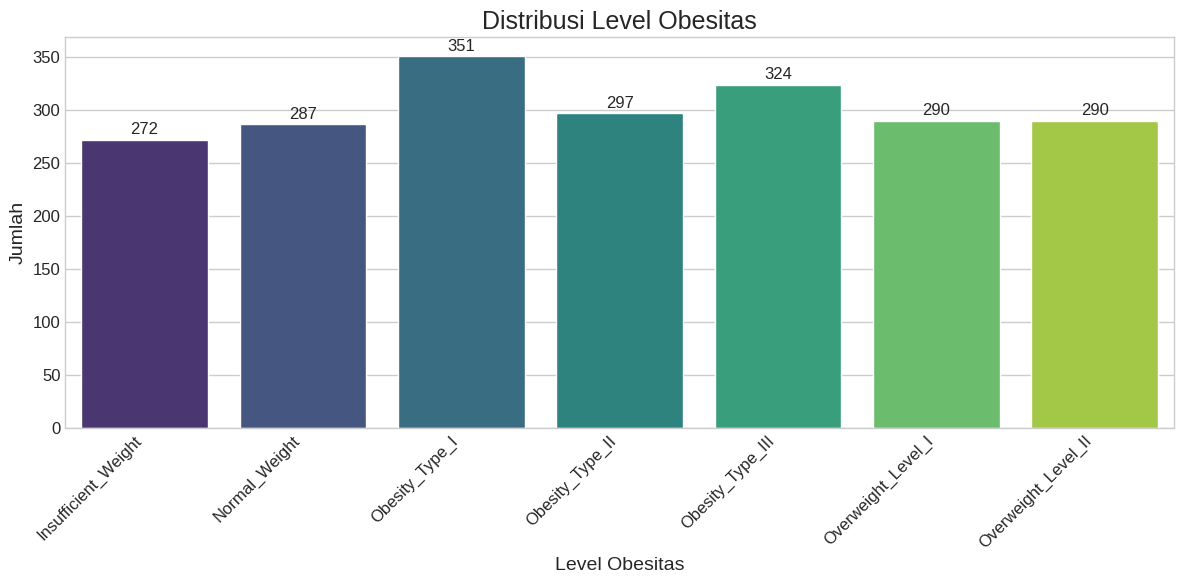

In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Mengatur ukuran plot dan gaya visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

# 1. VISUALISASI DISTRIBUSI KELAS TARGET
plt.figure(figsize=(12, 6))
target_counts = df['NObeyesdad'].value_counts().sort_index()
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Distribusi Level Obesitas', fontsize=18)
plt.xlabel('Level Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(target_counts.values):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.savefig('distribusi_obesitas.png')
plt.show()

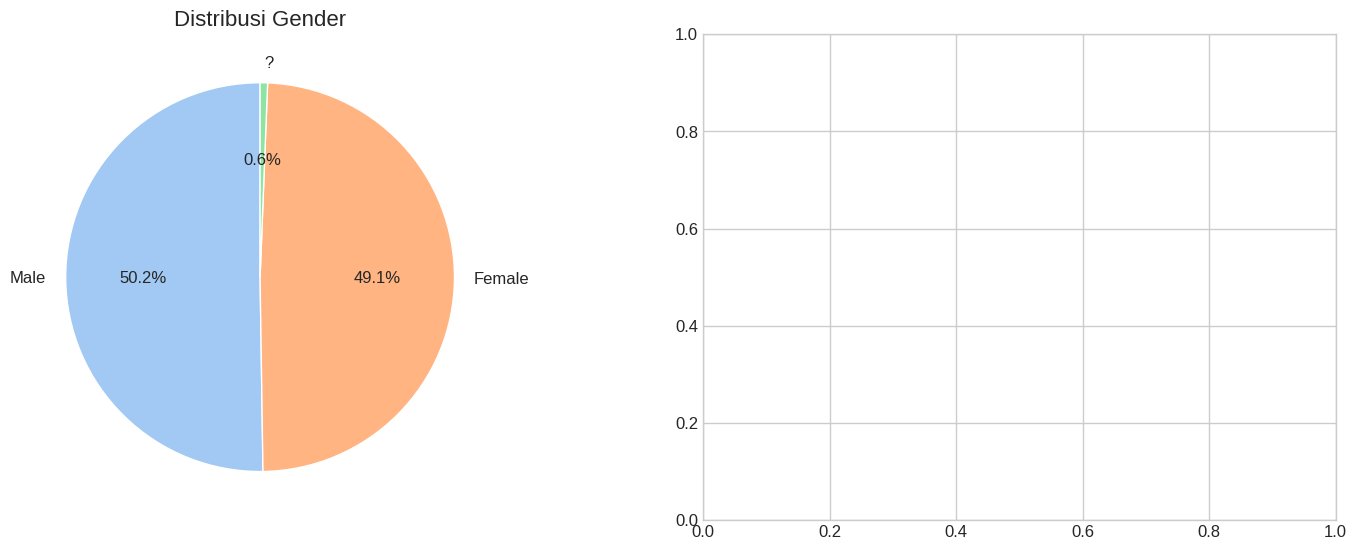

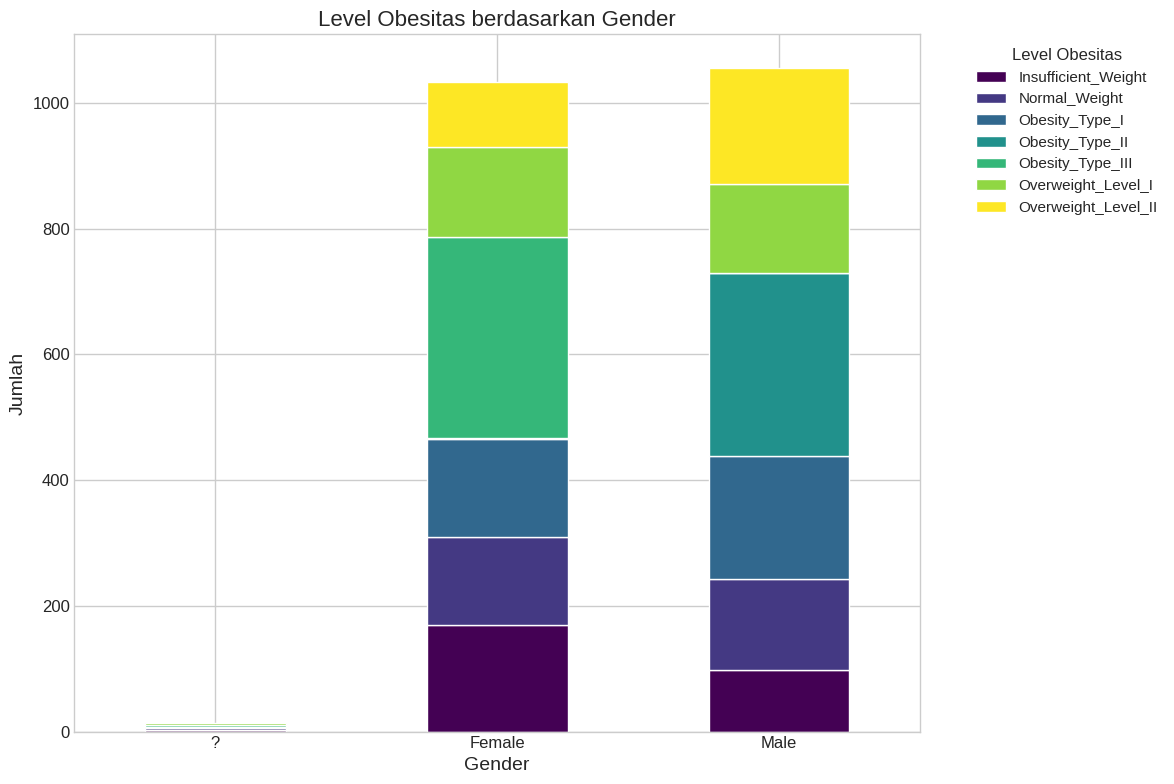

In [4]:
# 2. VISUALISASI BERDASARKAN GENDER
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Distribusi Gender', fontsize=16)

plt.subplot(1, 2, 2)
gender_obesity = pd.crosstab(df['Gender'], df['NObeyesdad'])
gender_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Level Obesitas berdasarkan Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Level Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('gender_obesitas.png')
plt.show()

PEMBERSIHAN DATA USIA
Memeriksa tipe data kolom Age...
Tipe data Age: object

Contoh 10 nilai pertama dalam kolom Age:
  Nilai ke-1: 21 (tipe: <class 'str'>)
  Nilai ke-2: 21 (tipe: <class 'str'>)
  Nilai ke-3: 23 (tipe: <class 'str'>)
  Nilai ke-4: 27 (tipe: <class 'str'>)
  Nilai ke-5: 22 (tipe: <class 'str'>)
  Nilai ke-6: 29 (tipe: <class 'str'>)
  Nilai ke-7: 23 (tipe: <class 'str'>)
  Nilai ke-8: 22 (tipe: <class 'str'>)
  Nilai ke-9: 24 (tipe: <class 'str'>)
  Nilai ke-10: 22 (tipe: <class 'str'>)

Mengonversi kolom Age ke tipe numerik...
  • errors='coerce' berarti nilai non-numerik akan diubah menjadi NaN
  • Ini mencegah error seperti '<' not supported between instances of 'float' and 'str'

Tipe data Age setelah konversi: float64
Jumlah nilai NaN setelah konversi: 22 dari 2111 baris

Statistik dasar kolom Age setelah konversi:
  • Jumlah data valid: 2089.0
  • Rata-rata: 24.72 tahun
  • Nilai minimum: 14.00 tahun
  • Nilai maksimum: 106.44 tahun

FILTER DATA UNTUK NILAI USIA

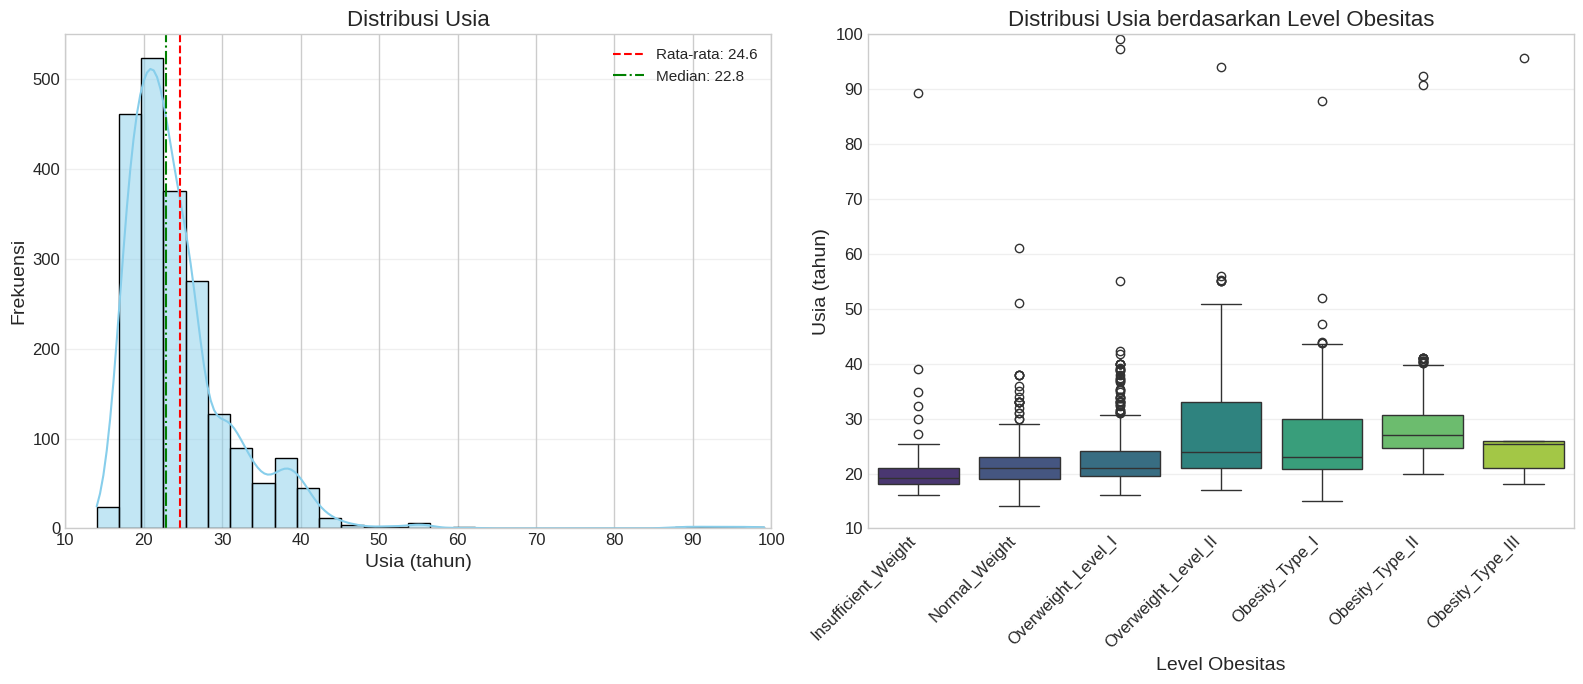


INTERPRETASI HASIL VISUALISASI
Rata-rata dan median usia untuk setiap level obesitas:
  • Insufficient_Weight:
    - Rata-rata: 20.0 tahun
    - Median: 19.2 tahun
  • Normal_Weight:
    - Rata-rata: 21.8 tahun
    - Median: 21.0 tahun
  • Overweight_Level_I:
    - Rata-rata: 23.9 tahun
    - Median: 21.0 tahun
  • Overweight_Level_II:
    - Rata-rata: 27.2 tahun
    - Median: 24.0 tahun
  • Obesity_Type_I:
    - Rata-rata: 26.1 tahun
    - Median: 23.0 tahun
  • Obesity_Type_II:
    - Rata-rata: 28.6 tahun
    - Median: 27.1 tahun
  • Obesity_Type_III:
    - Rata-rata: 23.7 tahun
    - Median: 25.3 tahun

Kesimpulan dari visualisasi:
1. Histogram menunjukkan distribusi usia dalam dataset
   - Mengetahui rentang usia yang paling banyak dalam data
   - Membandingkan rata-rata dan median usia
2. Boxplot menunjukkan hubungan antara usia dan level obesitas
   - Melihat apakah ada pola tertentu antara usia dan level obesitas
   - Membandingkan distribusi usia di berbagai level obesitas
3. 

In [5]:
# Import library yang diperlukan untuk analisis data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== LANGKAH 1: INSPEKSI DAN PEMBERSIHAN DATA USIA =====
print("="*60)
print("PEMBERSIHAN DATA USIA")
print("="*60)

# Memeriksa tipe data dari kolom Age
# Ini penting untuk memastikan kolom berisi nilai numerik
print("Memeriksa tipe data kolom Age...")
print(f"Tipe data Age: {df['Age'].dtype}")

# Menampilkan beberapa nilai awal untuk melihat pola data
# Hal ini membantu mengidentifikasi masalah seperti nilai non-numerik
print("\nContoh 10 nilai pertama dalam kolom Age:")
for i, value in enumerate(df['Age'].head(10), 1):
    print(f"  Nilai ke-{i}: {value} (tipe: {type(value)})")

# Mengonversi kolom Age ke tipe numerik
print("\nMengonversi kolom Age ke tipe numerik...")
print("  • errors='coerce' berarti nilai non-numerik akan diubah menjadi NaN")
print("  • Ini mencegah error seperti '<' not supported between instances of 'float' and 'str'")
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Memeriksa hasil konversi
print(f"\nTipe data Age setelah konversi: {df['Age'].dtype}")
print(f"Jumlah nilai NaN setelah konversi: {df['Age'].isna().sum()} dari {len(df)} baris")

# Menampilkan statistik setelah konversi
print("\nStatistik dasar kolom Age setelah konversi:")
age_stats = df['Age'].describe()
print(f"  • Jumlah data valid: {age_stats['count']}")
print(f"  • Rata-rata: {age_stats['mean']:.2f} tahun")
print(f"  • Nilai minimum: {age_stats['min']:.2f} tahun")
print(f"  • Nilai maksimum: {age_stats['max']:.2f} tahun")

# ===== LANGKAH 2: FILTER DATA UNTUK NILAI USIA YANG MASUK AKAL =====
print("\n" + "="*60)
print("FILTER DATA UNTUK NILAI USIA YANG MASUK AKAL")
print("="*60)

# Filter data untuk rentang usia yang masuk akal (10-100 tahun)
print("Memfilter data untuk rentang usia yang masuk akal...")
print("  • Mengecualikan nilai NaN (tidak ada data)")
print("  • Mengecualikan nilai < 10 (kemungkinan error data)")
print("  • Mengecualikan nilai > 100 (kemungkinan outlier ekstrem)")

# Menggunakan 3 kondisi filter:
# 1. notna() - mengecualikan nilai NaN
# 2. >= 10 - mengecualikan nilai terlalu kecil
# 3. <= 100 - mengecualikan nilai terlalu besar
df_clean = df[(df['Age'].notna()) & (df['Age'] >= 10) & (df['Age'] <= 100)]

# Menampilkan hasil filtering
print(f"\nHasil filtering:")
print(f"  • Jumlah data sebelum filter: {len(df)} baris")
print(f"  • Jumlah data setelah filter: {len(df_clean)} baris")
print(f"  • Data yang dihapus: {len(df) - len(df_clean)} baris ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# ===== LANGKAH 3: MEMBUAT VISUALISASI DATA USIA YANG BERSIH =====
print("\n" + "="*60)
print("VISUALISASI DATA USIA YANG SUDAH DIBERSIHKAN")
print("="*60)

print("Membuat visualisasi distribusi usia...")
# Membuat figure dengan ukuran 16x7 inci untuk visualisasi yang jelas
plt.figure(figsize=(16, 7))

# --- PLOT 1: HISTOGRAM DISTRIBUSI USIA ---
print("  • Plot 1: Histogram distribusi usia")
print("    - Menunjukkan frekuensi usia dalam dataset")
print("    - Termasuk kurva KDE (Kernel Density Estimation)")

# Membuat subplot untuk histogram (posisi 1 dari 2 plot)
plt.subplot(1, 2, 1)

# Membuat histogram dengan seaborn
# kde=True: menampilkan kurva Kernel Density Estimation
# bins=30: membagi data menjadi 30 kelompok
# color='skyblue': warna biru langit untuk histogram
# edgecolor='black': garis tepi hitam untuk kontras
sns.histplot(df_clean['Age'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Usia', fontsize=16)
plt.xlabel('Usia (tahun)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Menambahkan grid untuk memudahkan pembacaan nilai
plt.grid(axis='y', alpha=0.3)  # Grid transparan pada sumbu y

# Menetapkan rentang sumbu x untuk fokus pada rentang usia normal
plt.xlim(10, 100)

# Menambahkan garis untuk rata-rata dan median
avg_age = df_clean['Age'].mean()
median_age = df_clean['Age'].median()
plt.axvline(avg_age, color='red', linestyle='--', label=f'Rata-rata: {avg_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-.', label=f'Median: {median_age:.1f}')

# Menampilkan legend (keterangan) untuk garis rata-rata dan median
plt.legend()

# --- PLOT 2: BOXPLOT USIA BERDASARKAN LEVEL OBESITAS ---
print("  • Plot 2: Boxplot usia berdasarkan level obesitas")
print("    - Menunjukkan distribusi usia untuk setiap level obesitas")
print("    - Memudahkan perbandingan usia antar level obesitas")

# Membuat subplot untuk boxplot (posisi 2 dari 2 plot)
plt.subplot(1, 2, 2)

# Mengurutkan level obesitas dari ringan ke berat
# Ini memastikan visualisasi yang lebih intuitif
obesity_order = [
    'Insufficient_Weight',  # Berat badan kurang
    'Normal_Weight',        # Berat badan normal
    'Overweight_Level_I',   # Kelebihan berat badan level I
    'Overweight_Level_II',  # Kelebihan berat badan level II
    'Obesity_Type_I',       # Obesitas tipe I
    'Obesity_Type_II',      # Obesitas tipe II
    'Obesity_Type_III'      # Obesitas tipe III
]

# Membuat boxplot dengan seaborn
# x='NObeyesdad': kategori level obesitas pada sumbu x
# y='Age': nilai usia pada sumbu y
# order=obesity_order: mengurutkan level obesitas sesuai yang ditentukan
# palette='viridis': skema warna yang estetis
sns.boxplot(x='NObeyesdad', y='Age', data=df_clean, palette='viridis', order=obesity_order)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Usia berdasarkan Level Obesitas', fontsize=16)
plt.xlabel('Level Obesitas', fontsize=14)
plt.ylabel('Usia (tahun)', fontsize=14)

# Memutar label pada sumbu x agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')  # ha='right' = horizontal alignment: right

# Menambahkan grid untuk memudahkan pembacaan nilai
plt.grid(axis='y', alpha=0.3)  # Grid transparan pada sumbu y

# Menetapkan rentang sumbu y untuk konsistensi dengan histogram
plt.ylim(10, 100)

# Mengatur layout agar plot tidak tumpang tindih
plt.tight_layout()

# Menyimpan visualisasi dengan resolusi tinggi
print("\nMenyimpan visualisasi sebagai file gambar...")
plt.savefig('usia_obesitas_fixed.png', dpi=300, bbox_inches='tight')
print("  • File disimpan sebagai 'usia_obesitas_fixed.png'")
print("  • Resolusi: 300 dpi (kualitas tinggi)")

# Menampilkan visualisasi
plt.show()

# ===== LANGKAH 4: INTERPRETASI HASIL =====
print("\n" + "="*60)
print("INTERPRETASI HASIL VISUALISASI")
print("="*60)

# Menghitung statistik usia per level obesitas untuk analisis
age_by_obesity = df_clean.groupby('NObeyesdad')['Age'].agg(['mean', 'median']).round(1)
# Mengurutkan level obesitas sesuai urutan yang ditentukan
age_by_obesity = age_by_obesity.reindex(obesity_order)

print("Rata-rata dan median usia untuk setiap level obesitas:")
for level in obesity_order:
    if level in age_by_obesity.index:
        print(f"  • {level}:")
        print(f"    - Rata-rata: {age_by_obesity.loc[level, 'mean']:.1f} tahun")
        print(f"    - Median: {age_by_obesity.loc[level, 'median']:.1f} tahun")

print("\nKesimpulan dari visualisasi:")
print("1. Histogram menunjukkan distribusi usia dalam dataset")
print("   - Mengetahui rentang usia yang paling banyak dalam data")
print("   - Membandingkan rata-rata dan median usia")
print("2. Boxplot menunjukkan hubungan antara usia dan level obesitas")
print("   - Melihat apakah ada pola tertentu antara usia dan level obesitas")
print("   - Membandingkan distribusi usia di berbagai level obesitas")
print("3. Pembersihan data sangat penting untuk visualisasi yang akurat")
print("   - Konversi tipe data mencegah error perbandingan antara string dan numerik")
print("   - Filter nilai ekstrem menghasilkan visualisasi yang lebih informatif")

VISUALISASI BODY MASS INDEX (BMI)
Langkah 1: Mempersiapkan data untuk perhitungan BMI
• Jumlah data yang valid untuk BMI: 2070 dari 2111 total data
• Persentase data valid: 98.1%

Langkah 2: Analisis statistik dasar BMI
Statistik BMI:
• Jumlah data: 2070
• Rata-rata: 30.34
• Standar deviasi: 11.83
• Nilai minimum: 6.37
• Nilai maksimum: 153.69
• Kuartil 1 (25%): 24.34
• Kuartil 2 (50%/Median): 28.86
• Kuartil 3 (75%): 36.12

Langkah 3: Filter data untuk visualisasi (menghilangkan outlier)
• Jumlah data setelah filter outlier BMI: 2007 dari 2111 total
• Data yang dihilangkan: 104 (4.9%)

Langkah 4: Membuat visualisasi BMI
• Membuat histogram distribusi BMI
• Membuat boxplot BMI berdasarkan level obesitas


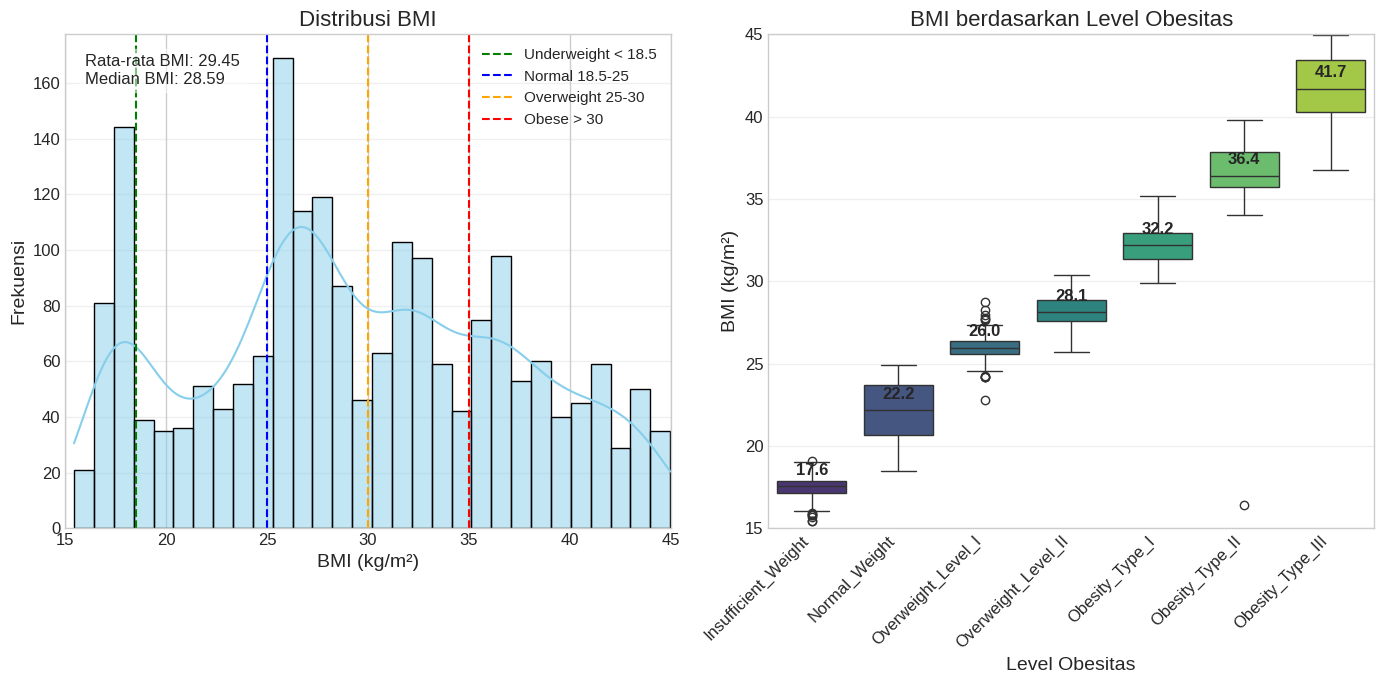


Langkah 5: Analisis statistik BMI berdasarkan level obesitas

Statistik BMI berdasarkan Level Obesitas:
            NObeyesdad  Jumlah Data  Rata-rata  Median  Minimum  Maksimum
0  Insufficient_Weight          264      18.73   17.55     7.06    153.69
1        Normal_Weight          281      22.24   22.16     6.37    109.99
5   Overweight_Level_I          290      27.40   25.98     8.51    150.15
6  Overweight_Level_II          279      28.82   28.15    10.60    141.62
2       Obesity_Type_I          346      32.25   32.19    29.91     35.17
3      Obesity_Type_II          294      36.94   36.42    16.44    121.32
4     Obesity_Type_III          316      43.08   41.95    13.52    145.71

Langkah 6: Interpretasi hasil visualisasi BMI
KESIMPULAN VISUALISASI BMI:
1. Histogram menunjukkan distribusi BMI dalam dataset
   - Garis vertikal menandai batas kategori BMI standar WHO
   - Dari histogram dapat dilihat bagaimana distribusi BMI dalam populasi

2. Boxplot menunjukkan hubungan antara 

In [6]:
# ===== 4. VISUALISASI BODY MASS INDEX (BMI) =====
# BMI adalah ukuran standar untuk menilai apakah seseorang memiliki berat badan normal,
# kurang, berlebih, atau obesitas

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LANGKAH 1: PERSIAPAN DATA BMI
print("="*50)
print("VISUALISASI BODY MASS INDEX (BMI)")
print("="*50)

# Konversi kolom Height dan Weight ke tipe numerik
# errors='coerce' akan mengubah nilai yang tidak valid menjadi NaN
print("Langkah 1: Mempersiapkan data untuk perhitungan BMI")
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Rumus BMI = Berat (kg) / (Tinggi (m))²
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Memeriksa data BMI yang valid (tidak NaN)
valid_bmi_count = df['BMI'].notna().sum()
total_count = len(df)
print(f"• Jumlah data yang valid untuk BMI: {valid_bmi_count} dari {total_count} total data")
print(f"• Persentase data valid: {valid_bmi_count/total_count*100:.1f}%")

# LANGKAH 2: ANALISIS STATISTIK BMI
print("\nLangkah 2: Analisis statistik dasar BMI")
# Tampilkan statistik dasar BMI
bmi_stats = df['BMI'].describe()
print("Statistik BMI:")
print(f"• Jumlah data: {bmi_stats['count']:.0f}")
print(f"• Rata-rata: {bmi_stats['mean']:.2f}")
print(f"• Standar deviasi: {bmi_stats['std']:.2f}")
print(f"• Nilai minimum: {bmi_stats['min']:.2f}")
print(f"• Nilai maksimum: {bmi_stats['max']:.2f}")
print(f"• Kuartil 1 (25%): {bmi_stats['25%']:.2f}")
print(f"• Kuartil 2 (50%/Median): {bmi_stats['50%']:.2f}")
print(f"• Kuartil 3 (75%): {bmi_stats['75%']:.2f}")

# LANGKAH 3: FILTER DATA UNTUK VISUALISASI YANG LEBIH BAIK
print("\nLangkah 3: Filter data untuk visualisasi (menghilangkan outlier)")
# BMI normal umumnya berkisar antara 15-45
# Nilai di luar rentang ini kemungkinan adalah kesalahan data atau outlier ekstrem
df_viz = df[(df['BMI'] > 15) & (df['BMI'] < 45)]
filtered_count = len(df_viz)
print(f"• Jumlah data setelah filter outlier BMI: {filtered_count} dari {total_count} total")
print(f"• Data yang dihilangkan: {total_count - filtered_count} ({(total_count-filtered_count)/total_count*100:.1f}%)")

# LANGKAH 4: BUAT VISUALISASI BMI
print("\nLangkah 4: Membuat visualisasi BMI")
# Membuat figure dengan ukuran 14x7 inci
plt.figure(figsize=(14, 7))

# --- Subplot 1: Histogram BMI ---
print("• Membuat histogram distribusi BMI")
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama

# Membuat histogram dengan seaborn
# bins=30: membagi data menjadi 30 kelompok
# kde=True: menampilkan kurva estimasi densitas
# color='skyblue': warna biru langit untuk batang histogram
# edgecolor='black': garis tepi histogram berwarna hitam
sns.histplot(df_viz['BMI'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Menambahkan garis vertikal untuk kategori BMI standar WHO
# Kategori 1: Underweight (Kekurangan berat badan)
plt.axvline(x=18.5, color='green', linestyle='--', label='Underweight < 18.5')
# Kategori 2: Normal weight (Berat badan normal)
plt.axvline(x=25, color='blue', linestyle='--', label='Normal 18.5-25')
# Kategori 3: Overweight (Kelebihan berat badan)
plt.axvline(x=30, color='orange', linestyle='--', label='Overweight 25-30')
# Kategori 4: Obese (Obesitas)
plt.axvline(x=35, color='red', linestyle='--', label='Obese > 30')

# Menambahkan judul dan label sumbu
plt.title('Distribusi BMI', fontsize=16)
plt.xlabel('BMI (kg/m²)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', alpha=0.3)  # grid transparan pada sumbu y
plt.legend()  # menampilkan keterangan untuk garis kategori BMI

# Mengatur batasan sumbu x agar fokus pada rentang BMI normal
plt.xlim(15, 45)

# Menambahkan informasi statistik pada plot
avg_bmi = df_viz['BMI'].mean()  # rata-rata BMI
median_bmi = df_viz['BMI'].median()  # median BMI

# Menambahkan teks dengan kotak latar belakang putih transparan
plt.text(16, plt.gca().get_ylim()[1]*0.9,  # posisi teks
         f"Rata-rata BMI: {avg_bmi:.2f}\nMedian BMI: {median_bmi:.2f}",  # isi teks
         bbox=dict(facecolor='white', alpha=0.5))  # kotak latar belakang

# --- Subplot 2: Boxplot BMI berdasarkan Level Obesitas ---
print("• Membuat boxplot BMI berdasarkan level obesitas")
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua

# Mengurutkan level obesitas secara logis dari ringan ke berat
order = ['Insufficient_Weight',  # Berat badan kurang
         'Normal_Weight',        # Berat badan normal
         'Overweight_Level_I',   # Kelebihan berat badan level 1
         'Overweight_Level_II',  # Kelebihan berat badan level 2
         'Obesity_Type_I',       # Obesitas tipe 1
         'Obesity_Type_II',      # Obesitas tipe 2
         'Obesity_Type_III']     # Obesitas tipe 3

# Membuat boxplot menggunakan seaborn
# x='NObeyesdad': kategori level obesitas pada sumbu x
# y='BMI': nilai BMI pada sumbu y
# palette='viridis': skema warna yang digunakan
# order: urutan kategori yang telah ditentukan sebelumnya
ax = sns.boxplot(x='NObeyesdad', y='BMI', data=df_viz, palette='viridis', order=order)

# Menambahkan nilai median pada setiap boxplot
# Menghitung median BMI untuk setiap level obesitas
medians = df_viz.groupby('NObeyesdad')['BMI'].median().reset_index()
# Membuat dictionary untuk mempermudah pengambilan nilai median
median_dict = dict(zip(medians['NObeyesdad'], medians['BMI']))

# Menambahkan teks nilai median di atas setiap boxplot
for i, category in enumerate(order):
    # Periksa apakah kategori ada dalam dictionary
    if category in median_dict:
        median_value = median_dict[category]
        # Tambahkan teks dengan format 1 desimal
        ax.text(i, median_value + 0.5, f"{median_value:.1f}",
                ha='center',  # horizontal alignment: center
                va='bottom',  # vertical alignment: bottom
                fontweight='bold')  # teks tebal

# Menambahkan judul dan label sumbu
plt.title('BMI berdasarkan Level Obesitas', fontsize=16)
plt.xlabel('Level Obesitas', fontsize=14)
plt.ylabel('BMI (kg/m²)', fontsize=14)

# Memutar label sumbu x agar terbaca dengan jelas
plt.xticks(rotation=45, ha='right')

# Mengatur batasan sumbu y agar konsisten dengan histogram
plt.ylim(15, 45)
plt.grid(axis='y', alpha=0.3)  # grid transparan pada sumbu y

# Mengatur tata letak agar subplot tidak tumpang tindih
plt.tight_layout()

# Menyimpan visualisasi dengan resolusi tinggi
plt.savefig('bmi_obesitas.png', dpi=300, bbox_inches='tight')

# Menampilkan visualisasi
plt.show()

# LANGKAH 5: STATISTIK BMI UNTUK SETIAP KATEGORI OBESITAS
print("\nLangkah 5: Analisis statistik BMI berdasarkan level obesitas")
# Menghitung statistik dasar untuk setiap level obesitas
bmi_by_category = df.groupby('NObeyesdad')['BMI'].agg([
    ('Jumlah Data', 'count'),
    ('Rata-rata', 'mean'),
    ('Median', 'median'),
    ('Minimum', 'min'),
    ('Maksimum', 'max')
]).reset_index()

# Mengurutkan hasil sesuai dengan urutan level obesitas
bmi_by_category['Sort_Index'] = bmi_by_category['NObeyesdad'].map(
    {cat: i for i, cat in enumerate(order)})
bmi_by_category = bmi_by_category.sort_values('Sort_Index').drop('Sort_Index', axis=1)

# Format angka untuk mudah dibaca
bmi_by_category['Rata-rata'] = bmi_by_category['Rata-rata'].round(2)
bmi_by_category['Median'] = bmi_by_category['Median'].round(2)
bmi_by_category['Minimum'] = bmi_by_category['Minimum'].round(2)
bmi_by_category['Maksimum'] = bmi_by_category['Maksimum'].round(2)

print("\nStatistik BMI berdasarkan Level Obesitas:")
print(bmi_by_category)

# LANGKAH 6: INTERPRETASI HASIL
print("\nLangkah 6: Interpretasi hasil visualisasi BMI")
print("="*50)
print("KESIMPULAN VISUALISASI BMI:")
print("1. Histogram menunjukkan distribusi BMI dalam dataset")
print("   - Garis vertikal menandai batas kategori BMI standar WHO")
print("   - Dari histogram dapat dilihat bagaimana distribusi BMI dalam populasi")
print("\n2. Boxplot menunjukkan hubungan antara BMI dan level obesitas")
print("   - Setiap kotak menunjukkan distribusi BMI untuk setiap level obesitas")
print("   - Garis di tengah kotak adalah nilai median BMI")
print("   - Kotak menunjukkan rentang antara kuartil 1 (25%) dan kuartil 3 (75%)")
print("   - Garis yang memanjang (whisker) menunjukkan rentang nilai non-outlier")
print("   - Titik-titik di luar whisker adalah outlier")
print("\n3. Hubungan BMI dengan Level Obesitas:")
print("   - Terdapat korelasi yang jelas antara nilai BMI dan level obesitas")
print("   - Semakin tinggi level obesitas, semakin tinggi pula nilai BMI")
print("   - Untuk aplikasi medis, nilai BMI dapat menjadi indikator penting dalam menilai risiko kesehatan")

ANALISIS KORELASI ANTAR VARIABEL NUMERIK

Langkah 1: Memilih variabel numerik dari dataset
Variabel numerik yang akan dianalisis (4 variabel):
1. Age
2. Height
3. Weight
4. BMI

Langkah 2: Memastikan kolom BMI termasuk dalam analisis
  • Kolom BMI sudah termasuk dalam variabel numerik.

Langkah 3: Menghitung korelasi antar variabel numerik
  • Korelasi dihitung menggunakan metode Pearson
  • Nilai korelasi berkisar antara -1 hingga 1
  • Korelasi +1: Hubungan positif sempurna (satu variabel naik, yang lain juga naik)
  • Korelasi -1: Hubungan negatif sempurna (satu variabel naik, yang lain turun)
  • Korelasi 0: Tidak ada hubungan linear
  • Matriks korelasi berukuran 4x4

Langkah 4: Membuat visualisasi heatmap korelasi
  • Menggunakan mask untuk menampilkan hanya setengah matriks (menghindari duplikasi)
  • Menggunakan skema warna 'coolwarm':
    - Warna biru menunjukkan korelasi negatif
    - Warna merah menunjukkan korelasi positif
    - Warna putih menunjukkan korelasi mendekati no

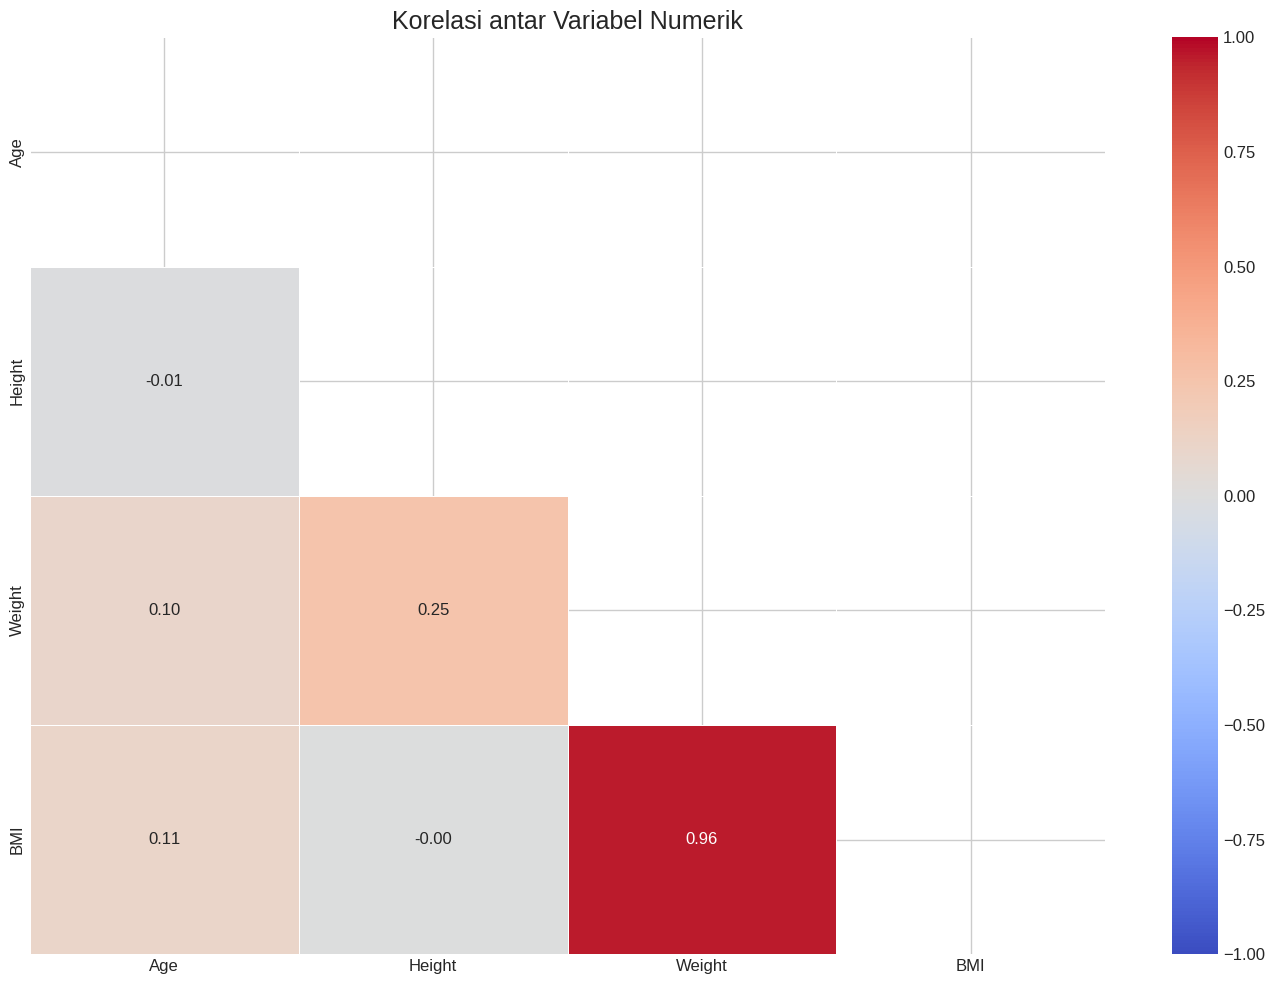


Langkah 5: Mengidentifikasi korelasi yang kuat
Pasangan variabel dengan korelasi kuat (|r| > 0.5):
  • BMI dan Weight: 0.96 (korelasi positif sangat kuat)

Langkah 6: Interpretasi hasil analisis korelasi
INTERPRETASI HEATMAP KORELASI:
1. Matriks korelasi membantu kita melihat hubungan linear antar variabel numerik
2. Korelasi positif (warna merah) berarti kedua variabel cenderung bergerak searah
3. Korelasi negatif (warna biru) berarti kedua variabel cenderung bergerak berlawanan arah
4. Diagonal utama selalu bernilai 1 karena merupakan korelasi variabel dengan dirinya sendiri
5. Penting untuk diingat: Korelasi tidak selalu berarti kausalitas (sebab-akibat)

Pada dataset obesitas, perhatikan khususnya:
  • Korelasi antara Weight dan BMI
  • Korelasi antara variabel kebiasaan makan dan BMI
  • Korelasi antara aktivitas fisik (FAF) dan BMI
  • Variabel mana yang berkorelasi kuat dengan level obesitas


In [7]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== VISUALISASI KORELASI DENGAN HEATMAP =====
print("="*60)
print("ANALISIS KORELASI ANTAR VARIABEL NUMERIK")
print("="*60)

# Langkah 1: Memilih hanya variabel numerik untuk analisis korelasi
print("\nLangkah 1: Memilih variabel numerik dari dataset")
# select_dtypes memungkinkan kita memilih kolom berdasarkan tipe datanya
# np.number akan memilih semua kolom numerik (int64, float64, dll)
numeric_df = df.select_dtypes(include=[np.number])

# Menampilkan variabel numerik yang akan dianalisis
print(f"Variabel numerik yang akan dianalisis ({len(numeric_df.columns)} variabel):")
for i, col in enumerate(numeric_df.columns, 1):
    print(f"{i}. {col}")

# Langkah 2: Pastikan kolom BMI termasuk dalam analisis
print("\nLangkah 2: Memastikan kolom BMI termasuk dalam analisis")
if 'BMI' not in numeric_df.columns:
    print("  • Kolom BMI belum ada, menambahkan dari dataset utama...")
    numeric_df['BMI'] = df['BMI']
    print("  • Kolom BMI berhasil ditambahkan!")
else:
    print("  • Kolom BMI sudah termasuk dalam variabel numerik.")

# Langkah 3: Menghitung korelasi antar variabel
print("\nLangkah 3: Menghitung korelasi antar variabel numerik")
print("  • Korelasi dihitung menggunakan metode Pearson")
print("  • Nilai korelasi berkisar antara -1 hingga 1")
print("  • Korelasi +1: Hubungan positif sempurna (satu variabel naik, yang lain juga naik)")
print("  • Korelasi -1: Hubungan negatif sempurna (satu variabel naik, yang lain turun)")
print("  • Korelasi 0: Tidak ada hubungan linear")

# Menghitung korelasi dengan metode Pearson (default)
correlation = numeric_df.corr()

# Menampilkan ukuran matriks korelasi
print(f"  • Matriks korelasi berukuran {correlation.shape[0]}x{correlation.shape[1]}")

# Langkah 4: Membuat heatmap untuk visualisasi korelasi
print("\nLangkah 4: Membuat visualisasi heatmap korelasi")

# Membuat figure dengan ukuran yang cukup besar (14x10 inci)
plt.figure(figsize=(14, 10))

# Membuat mask untuk menampilkan hanya setengah matriks korelasi (segitiga bawah)
# np.triu() membuat matriks segitiga atas bernilai True
# mask=mask akan menyembunyikan nilai True, jadi hanya segitiga bawah yang ditampilkan
print("  • Menggunakan mask untuk menampilkan hanya setengah matriks (menghindari duplikasi)")
mask = np.triu(correlation)

# Membuat heatmap dengan seaborn
# annot=True: menampilkan nilai korelasi di setiap sel
# fmt='.2f': format nilai dengan 2 angka di belakang koma
# cmap='coolwarm': skema warna (biru=negatif, merah=positif)
# mask=mask: menggunakan mask yang sudah dibuat
# linewidths=0.5: ketebalan garis pemisah antar sel
# vmin=-1, vmax=1: rentang nilai untuk skala warna
print("  • Menggunakan skema warna 'coolwarm':")
print("    - Warna biru menunjukkan korelasi negatif")
print("    - Warna merah menunjukkan korelasi positif")
print("    - Warna putih menunjukkan korelasi mendekati nol")

sns.heatmap(correlation,
            annot=True,          # Tampilkan nilai di setiap sel
            fmt='.2f',           # Format nilai dengan 2 desimal
            cmap='coolwarm',     # Skema warna: biru (-) ke merah (+)
            mask=mask,           # Mask untuk menampilkan segitiga bawah saja
            linewidths=0.5,      # Ketebalan garis pemisah
            vmin=-1, vmax=1)     # Batas nilai untuk skala warna

# Menambahkan judul dengan ukuran font yang besar
plt.title('Korelasi antar Variabel Numerik', fontsize=18)

# Mengatur layout agar tidak terpotong
plt.tight_layout()

# Menyimpan visualisasi dengan resolusi tinggi
plt.savefig('korelasi_heatmap.png', dpi=300, bbox_inches='tight')

# Menampilkan visualisasi
plt.show()

# Langkah 5: Analisis korelasi tertinggi (korelasi absolut > 0.5)
print("\nLangkah 5: Mengidentifikasi korelasi yang kuat")

# Membuat DataFrame untuk mempermudah analisis
corr_pairs = []

# Mendapatkan pasangan variabel dengan korelasi absolutnya > 0.5 (korelasi moderat-kuat)
# Hanya mengambil segitiga bawah dari matriks korelasi untuk menghindari duplikasi
for i in range(len(correlation.columns)):
    for j in range(i):  # j < i menjamin kita hanya mengambil segitiga bawah
        if abs(correlation.iloc[i, j]) > 0.5:  # Korelasi moderat-kuat
            corr_pairs.append({
                'Variabel_1': correlation.columns[i],
                'Variabel_2': correlation.columns[j],
                'Korelasi': correlation.iloc[i, j]
            })

# Membuat DataFrame dan mengurutkan berdasarkan nilai absolut korelasi
if corr_pairs:
    corr_df = pd.DataFrame(corr_pairs)
    corr_df['Korelasi_Absolut'] = corr_df['Korelasi'].abs()
    corr_df = corr_df.sort_values('Korelasi_Absolut', ascending=False).drop('Korelasi_Absolut', axis=1)

    print("Pasangan variabel dengan korelasi kuat (|r| > 0.5):")
    for i, row in corr_df.iterrows():
        corr_value = row['Korelasi']
        var1 = row['Variabel_1']
        var2 = row['Variabel_2']

        # Menentukan jenis korelasi berdasarkan nilai
        if corr_value > 0.7:
            strength = "sangat kuat"
        elif corr_value > 0.5:
            strength = "kuat"
        elif corr_value > 0.3:
            strength = "moderat"
        else:
            strength = "lemah"

        # Menentukan arah korelasi
        direction = "positif" if corr_value > 0 else "negatif"

        print(f"  • {var1} dan {var2}: {corr_value:.2f} (korelasi {direction} {strength})")
else:
    print("Tidak ditemukan pasangan variabel dengan korelasi kuat (|r| > 0.5)")

# Langkah 6: Interpretasi hasil
print("\nLangkah 6: Interpretasi hasil analisis korelasi")
print("="*60)
print("INTERPRETASI HEATMAP KORELASI:")
print("1. Matriks korelasi membantu kita melihat hubungan linear antar variabel numerik")
print("2. Korelasi positif (warna merah) berarti kedua variabel cenderung bergerak searah")
print("3. Korelasi negatif (warna biru) berarti kedua variabel cenderung bergerak berlawanan arah")
print("4. Diagonal utama selalu bernilai 1 karena merupakan korelasi variabel dengan dirinya sendiri")
print("5. Penting untuk diingat: Korelasi tidak selalu berarti kausalitas (sebab-akibat)")
print("\nPada dataset obesitas, perhatikan khususnya:")
print("  • Korelasi antara Weight dan BMI")
print("  • Korelasi antara variabel kebiasaan makan dan BMI")
print("  • Korelasi antara aktivitas fisik (FAF) dan BMI")
print("  • Variabel mana yang berkorelasi kuat dengan level obesitas")

VISUALISASI HUBUNGAN ANTARA FITUR KATEGORIKAL DENGAN LEVEL OBESITAS

Langkah 1: Menentukan fitur kategorikal yang akan dianalisis
Fitur kategorikal yang akan divisualisasikan:
1. CALC: Frekuensi konsumsi makanan berkalori (no, Sometimes, Frequently, Always)
2. FAVC: Konsumsi makanan tinggi kalori (yes/no)
3. SCC: Menghitung kalori konsumsi (yes/no)
4. SMOKE: Status merokok (yes/no)
5. family_history_with_overweight: Riwayat keluarga dengan kelebihan berat badan (yes/no)
6. CAEC: Konsumsi makanan antara waktu makan (Sometimes, Frequently, Always, no)
7. MTRANS: Moda transportasi (Public_Transportation, Walking, Automobile, Motorbike, Bike)

Langkah 2: Menyiapkan tata letak visualisasi
• Membuat gambar dengan ukuran 18x15 inci untuk menampung 7 subplot
• Menyusun subplot dalam grid 3x3 (total 9 slot, kita gunakan 7)

Langkah 3: Membuat visualisasi untuk setiap fitur kategorikal
• Menggunakan stacked bar chart untuk menunjukkan proporsi level obesitas
• Sumbu X: Nilai dari fitur kategorik

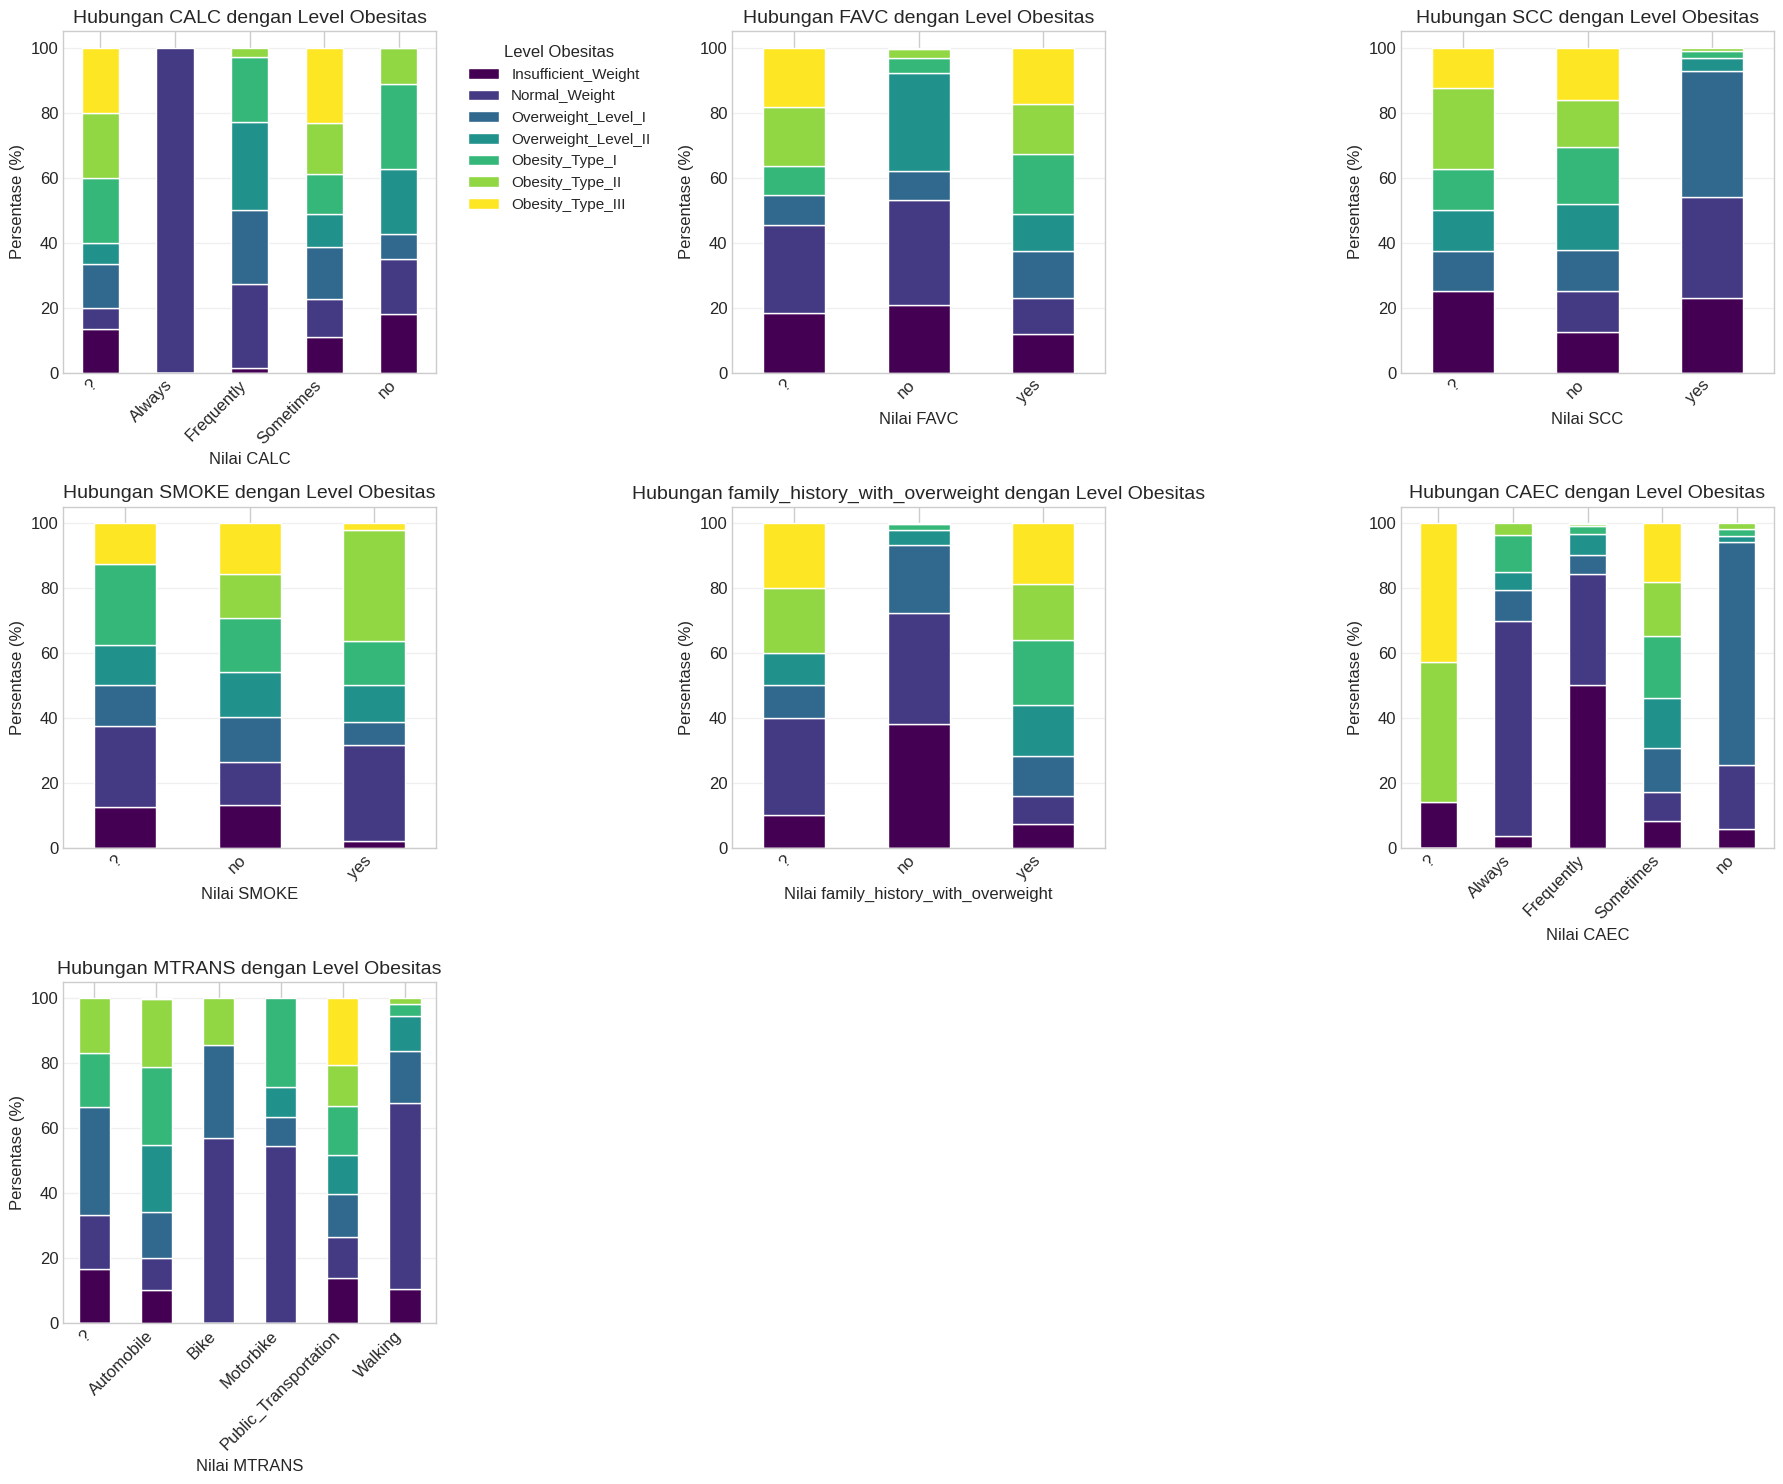


Langkah 5: Analisis dan interpretasi hasil
CARA MEMBACA STACKED BAR CHART:
1. Setiap batang mewakili nilai kategori tertentu (misalnya 'yes' atau 'no')
2. Tinggi total batang selalu 100%
3. Setiap warna dalam batang menunjukkan persentase level obesitas yang berbeda
4. Jika suatu warna lebih dominan pada kategori tertentu, ini menunjukkan
   hubungan antara kategori tersebut dengan level obesitas tersebut

CONTOH INTERPRETASI:

Analisis untuk fitur 'family_history_with_overweight':
  • Riwayat keluarga = 'yes':
    - Obesitas (semua tipe): 56.0%
    - Berat badan normal: 8.9%
  • Riwayat keluarga = 'no':
    - Obesitas (semua tipe): 2.1%
    - Berat badan normal: 34.2%
  • Riwayat keluarga = '?':
    - Obesitas (semua tipe): 40.0%
    - Berat badan normal: 30.0%

PENTINGNYA VISUALISASI INI:
1. Membantu mengidentifikasi faktor risiko potensial untuk obesitas
2. Mengungkap pola hubungan antara kebiasaan/karakteristik dengan level obesitas
3. Memberikan wawasan untuk strategi intervensi 

In [8]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== VISUALISASI FITUR KATEGORIKAL =====
print("="*70)
print("VISUALISASI HUBUNGAN ANTARA FITUR KATEGORIKAL DENGAN LEVEL OBESITAS")
print("="*70)

# Langkah 1: Menentukan fitur kategorikal yang akan divisualisasikan
print("\nLangkah 1: Menentukan fitur kategorikal yang akan dianalisis")

# Daftar fitur kategorikal dalam dataset
categorical_cols = ['CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

# Menampilkan daftar fitur beserta keterangannya
print("Fitur kategorikal yang akan divisualisasikan:")
fitur_keterangan = {
    'CALC': 'Frekuensi konsumsi makanan berkalori (no, Sometimes, Frequently, Always)',
    'FAVC': 'Konsumsi makanan tinggi kalori (yes/no)',
    'SCC': 'Menghitung kalori konsumsi (yes/no)',
    'SMOKE': 'Status merokok (yes/no)',
    'family_history_with_overweight': 'Riwayat keluarga dengan kelebihan berat badan (yes/no)',
    'CAEC': 'Konsumsi makanan antara waktu makan (Sometimes, Frequently, Always, no)',
    'MTRANS': 'Moda transportasi (Public_Transportation, Walking, Automobile, Motorbike, Bike)'
}

for i, col in enumerate(categorical_cols, 1):
    print(f"{i}. {col}: {fitur_keterangan[col]}")

# Langkah 2: Membuat tata letak untuk subplot
print("\nLangkah 2: Menyiapkan tata letak visualisasi")
print("• Membuat gambar dengan ukuran 18x15 inci untuk menampung 7 subplot")
print("• Menyusun subplot dalam grid 3x3 (total 9 slot, kita gunakan 7)")

# Membuat figure dengan ukuran besar untuk menampung semua subplot
plt.figure(figsize=(18, 15))  # Lebar 18 inci, tinggi 15 inci

# Langkah 3: Membuat subplot untuk setiap fitur kategorikal
print("\nLangkah 3: Membuat visualisasi untuk setiap fitur kategorikal")
print("• Menggunakan stacked bar chart untuk menunjukkan proporsi level obesitas")
print("• Sumbu X: Nilai dari fitur kategorikal (misalnya 'yes'/'no' untuk SMOKE)")
print("• Sumbu Y: Persentase distribusi level obesitas")
print("• Setiap warna dalam bar mewakili level obesitas yang berbeda")

# Membuat level obesitas berurutan untuk konsistensi warna
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Iterasi untuk setiap fitur kategorikal
for i, col in enumerate(categorical_cols, 1):
    print(f"\nMemvisualisasikan fitur {i}/{len(categorical_cols)}: {col}")

    # Membuat subplot di posisi ke-i
    plt.subplot(3, 3, i)

    # Membuat tabel silang (crosstab) antara fitur kategorikal dan level obesitas
    # normalize='index' berarti persentase dihitung berdasarkan baris (tiap kategori berjumlah 100%)
    # * 100 untuk mengonversi dari proporsi (0-1) ke persentase (0-100)
    cross_tab = pd.crosstab(df[col], df['NObeyesdad'], normalize='index') * 100

    # Mengurutkan kolom crosstab agar sesuai dengan urutan level obesitas
    # Ini memastikan warna konsisten di semua subplot
    cross_tab = cross_tab.reindex(columns=obesity_order)

    # Cetak tabel silang untuk analisis lebih lanjut
    print(f"  Tabel silang untuk {col} (dalam %):")
    print(cross_tab.round(1))

    # Plot stacked bar chart
    cross_tab.plot(kind='bar',        # Jenis plot: bar chart
                   stacked=True,      # Stacked: bar ditumpuk satu sama lain
                   colormap='viridis',# Skema warna
                   ax=plt.gca())      # Gunakan axes saat ini

    # Menambahkan judul dan label
    plt.title(f'Hubungan {col} dengan Level Obesitas', fontsize=14)
    plt.xlabel(f'Nilai {col}', fontsize=12)
    plt.ylabel('Persentase (%)', fontsize=12)

    # Memutar label sumbu x agar tidak tumpang tindih
    plt.xticks(rotation=45, ha='right')

    # Menambahkan grid untuk memudahkan pembacaan
    plt.grid(axis='y', alpha=0.3)

    # Hanya tampilkan legend di subplot pertama untuk menghindari redundansi
    if i == 1:
        plt.legend(title='Level Obesitas',
                  bbox_to_anchor=(1.05, 1),  # Posisi legend di luar subplot
                  loc='upper left')          # Lokasi legend
    else:
        plt.legend([])  # Sembunyikan legend untuk subplot lainnya

# Langkah 4: Menyesuaikan tata letak dan menyimpan hasil
print("\nLangkah 4: Menyesuaikan tata letak dan menyimpan hasil")
print("• Mengatur spacing antar subplot agar tidak tumpang tindih")
print("• Menyimpan visualisasi sebagai file gambar")

# Mengatur tata letak agar subplot tidak tumpang tindih
plt.tight_layout()

# Menyimpan visualisasi dengan resolusi tinggi
plt.savefig('kategorikal_features.png', dpi=300, bbox_inches='tight')

# Menampilkan visualisasi
plt.show()

# Langkah 5: Analisis dan interpretasi hasil
print("\nLangkah 5: Analisis dan interpretasi hasil")
print("="*70)
print("CARA MEMBACA STACKED BAR CHART:")
print("1. Setiap batang mewakili nilai kategori tertentu (misalnya 'yes' atau 'no')")
print("2. Tinggi total batang selalu 100%")
print("3. Setiap warna dalam batang menunjukkan persentase level obesitas yang berbeda")
print("4. Jika suatu warna lebih dominan pada kategori tertentu, ini menunjukkan")
print("   hubungan antara kategori tersebut dengan level obesitas tersebut")
print("\nCONTOH INTERPRETASI:")

# Pilih satu fitur untuk analisis contoh
example_feature = 'family_history_with_overweight'
print(f"\nAnalisis untuk fitur '{example_feature}':")

# Hitung persentase untuk analisis
example_cross_tab = pd.crosstab(df[example_feature], df['NObeyesdad'], normalize='index') * 100

# Hitung proporsi obesitas untuk setiap nilai fitur
for value in df[example_feature].dropna().unique():
    obesity_sum = sum(example_cross_tab.loc[value, cat] for cat in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
                      if cat in example_cross_tab.columns)
    normal_weight = example_cross_tab.loc[value, 'Normal_Weight'] if 'Normal_Weight' in example_cross_tab.columns else 0

    print(f"  • Riwayat keluarga = '{value}':")
    print(f"    - Obesitas (semua tipe): {obesity_sum:.1f}%")
    print(f"    - Berat badan normal: {normal_weight:.1f}%")

print("\nPENTINGNYA VISUALISASI INI:")
print("1. Membantu mengidentifikasi faktor risiko potensial untuk obesitas")
print("2. Mengungkap pola hubungan antara kebiasaan/karakteristik dengan level obesitas")
print("3. Memberikan wawasan untuk strategi intervensi dan pencegahan obesitas")
print("4. Menjadi dasar untuk analisis statistik lanjutan (seperti uji chi-square)")

VISUALISASI HUBUNGAN ANTARA FITUR NUMERIK DENGAN LEVEL OBESITAS

Langkah 1: Pembersihan data untuk visualisasi yang lebih baik
  • Mengonversi semua kolom numerik ke tipe numerik
  • Menangani nilai yang hilang dan outlier
  • Age: 179 outlier terdeteksi
  • Height: 10 outlier terdeteksi
  • Weight: 15 outlier terdeteksi
  • FCVC: 8 outlier terdeteksi
  • NCP: 558 outlier terdeteksi
  • CH2O: 8 outlier terdeteksi
  • FAF: 13 outlier terdeteksi
  • TUE: 7 outlier terdeteksi

Jumlah data setelah pembersihan: 2020 dari 2111 total

Langkah 2: Membuat visualisasi yang lebih jelas
  • Menggunakan 2 kolom dan 4 baris untuk layout yang lebih lega
  • Memastikan label dan nilai terlihat jelas


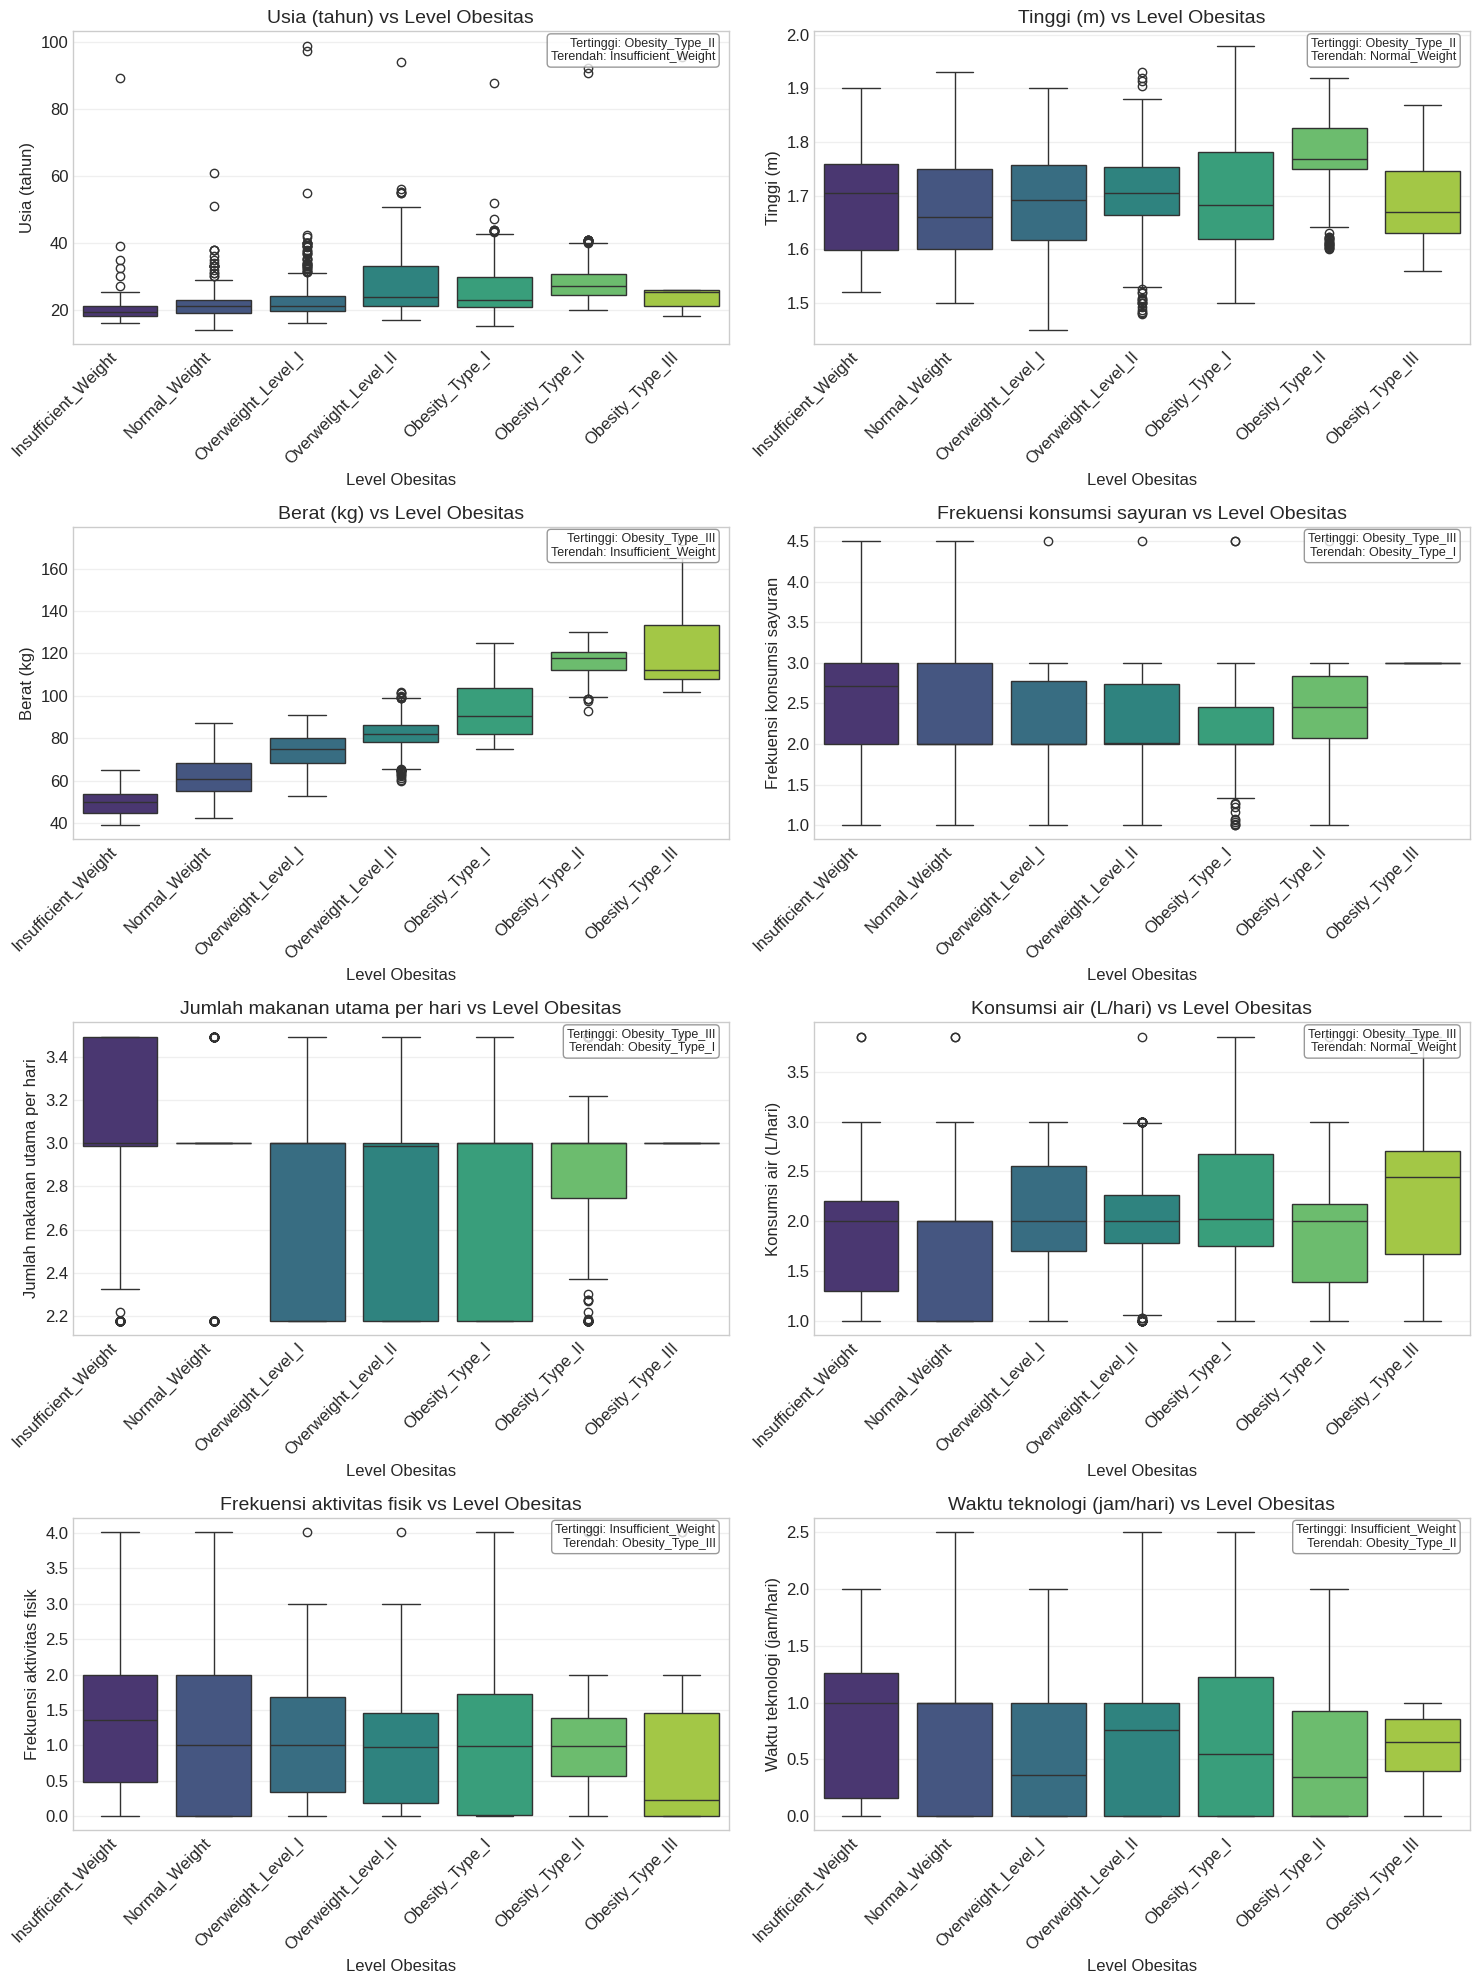


Langkah 3: Interpretasi hasil visualisasi
INTERPRETASI BOXPLOT UNTUK BEBERAPA FITUR UTAMA:

• Berat (kg):
  - Rata-rata untuk 'Insufficient_Weight': 49.94
  - Rata-rata untuk 'Normal_Weight': 62.22
  - Rata-rata untuk 'Obesity_Type_III': 121.04
  - Tren: Semakin tinggi level obesitas, semakin tinggi berat badan (sesuai ekspektasi)

• Tinggi (m):
  - Rata-rata untuk 'Insufficient_Weight': 1.69
  - Rata-rata untuk 'Normal_Weight': 1.68
  - Rata-rata untuk 'Obesity_Type_III': 1.69
  - Tren: Tinggi badan relatif konstan di semua level obesitas, menunjukkan
    bahwa tinggi bukan faktor utama dalam penentuan level obesitas

• Frekuensi aktivitas fisik:
  - Rata-rata untuk 'Insufficient_Weight': 1.29
  - Rata-rata untuk 'Normal_Weight': 1.26
  - Rata-rata untuk 'Obesity_Type_III': 0.69
  - Tren: Frekuensi aktivitas fisik cenderung menurun dengan meningkatnya level obesitas,
    menunjukkan hubungan antara kurangnya aktivitas fisik dengan obesitas

• Konsumsi air (L/hari):
  - Rata-rata untu

In [9]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== VISUALISASI FITUR NUMERIK YANG DIPERBAIKI =====
print("="*70)
print("VISUALISASI HUBUNGAN ANTARA FITUR NUMERIK DENGAN LEVEL OBESITAS")
print("="*70)

# Daftar fitur numerik yang akan divisualisasikan
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Keterangan untuk setiap fitur numerik
fitur_keterangan = {
    'Age': 'Usia (tahun)',
    'Height': 'Tinggi (m)',
    'Weight': 'Berat (kg)',
    'FCVC': 'Frekuensi konsumsi sayuran',
    'NCP': 'Jumlah makanan utama per hari',
    'CH2O': 'Konsumsi air (L/hari)',
    'FAF': 'Frekuensi aktivitas fisik',
    'TUE': 'Waktu teknologi (jam/hari)'
}

# Urutan level obesitas yang logis
obesity_order = [
    'Insufficient_Weight',  # Berat badan kurang
    'Normal_Weight',        # Berat badan normal
    'Overweight_Level_I',   # Kelebihan berat badan level I
    'Overweight_Level_II',  # Kelebihan berat badan level II
    'Obesity_Type_I',       # Obesitas tipe I
    'Obesity_Type_II',      # Obesitas tipe II
    'Obesity_Type_III'      # Obesitas tipe III
]

print("\nLangkah 1: Pembersihan data untuk visualisasi yang lebih baik")
print("  • Mengonversi semua kolom numerik ke tipe numerik")
print("  • Menangani nilai yang hilang dan outlier")

# Buat salinan dataframe untuk dimodifikasi
df_viz = df.copy()

# Pembersihan data untuk semua kolom numerik
for col in numeric_cols:
    # Konversi ke numerik, nilai non-numerik menjadi NaN
    df_viz[col] = pd.to_numeric(df_viz[col], errors='coerce')

    # Identifikasi outlier menggunakan metode IQR
    Q1 = df_viz[col].quantile(0.25)
    Q3 = df_viz[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outlier ekstrem
    outliers = df_viz[(df_viz[col] < lower_bound) | (df_viz[col] > upper_bound)]
    outlier_count = len(outliers)

    print(f"  • {col}: {outlier_count} outlier terdeteksi")

    # Batasi nilai pada rentang yang masuk akal untuk visualisasi yang lebih baik
    if col == 'Age':
        df_viz = df_viz[(df_viz[col].notna()) & (df_viz[col] >= 10) & (df_viz[col] <= 100)]
    elif col == 'Height':
        df_viz = df_viz[(df_viz[col].notna()) & (df_viz[col] >= 1.4) & (df_viz[col] <= 2.2)]
    elif col == 'Weight':
        df_viz = df_viz[(df_viz[col].notna()) & (df_viz[col] >= 35) & (df_viz[col] <= 200)]
    else:
        # Untuk kolom lain, gunakan pendekatan IQR untuk membatasi outlier
        df_viz[col] = df_viz[col].clip(lower=lower_bound, upper=upper_bound)

print(f"\nJumlah data setelah pembersihan: {len(df_viz)} dari {len(df)} total")

print("\nLangkah 2: Membuat visualisasi yang lebih jelas")
print("  • Menggunakan 2 kolom dan 4 baris untuk layout yang lebih lega")
print("  • Memastikan label dan nilai terlihat jelas")

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(15, 20))

# Konfigurasi subplot: 4 baris, 2 kolom
for i, col in enumerate(numeric_cols):
    # Posisi subplot (baris, kolom, indeks)
    plt.subplot(4, 2, i+1)

    # Membuat boxplot
    ax = sns.boxplot(x='NObeyesdad', y=col, data=df_viz, palette='viridis', order=obesity_order)

    # Menambahkan judul dan label
    plt.title(f'{fitur_keterangan[col]} vs Level Obesitas', fontsize=14)
    plt.xlabel('Level Obesitas', fontsize=12)
    plt.ylabel(fitur_keterangan[col], fontsize=12)

    # Memutar label sumbu x agar tidak tumpang tindih
    plt.xticks(rotation=45, ha='right')

    # Menambahkan grid untuk memudahkan pembacaan
    plt.grid(axis='y', alpha=0.3)

    # Tambahkan anotasi statistik (opsional)
    means = df_viz.groupby('NObeyesdad')[col].mean()
    min_level = means.idxmin()
    max_level = means.idxmax()

    # Tambahkan teks informasi di sudut kanan atas
    info_text = f"Tertinggi: {max_level}\nTerendah: {min_level}"
    plt.annotate(info_text, xy=(0.98, 0.98), xycoords='axes fraction',
                fontsize=9, ha='right', va='top',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Mengatur layout agar subplot tidak tumpang tindih
plt.tight_layout()

# Menyimpan visualisasi dengan resolusi tinggi
plt.savefig('numerik_features_fixed.png', dpi=300, bbox_inches='tight')

# Menampilkan visualisasi
plt.show()

print("\nLangkah 3: Interpretasi hasil visualisasi")
print("="*70)

# Analisis hubungan antara fitur numerik dan level obesitas
print("INTERPRETASI BOXPLOT UNTUK BEBERAPA FITUR UTAMA:")

key_features = ['Weight', 'Height', 'FAF', 'CH2O']
for feature in key_features:
    print(f"\n• {fitur_keterangan[feature]}:")

    # Hitung rata-rata per level obesitas
    means = df_viz.groupby('NObeyesdad')[feature].mean().reindex(obesity_order)

    # Tampilkan beberapa nilai kunci
    print(f"  - Rata-rata untuk 'Insufficient_Weight': {means.iloc[0]:.2f}")
    print(f"  - Rata-rata untuk 'Normal_Weight': {means.iloc[1]:.2f}")
    print(f"  - Rata-rata untuk 'Obesity_Type_III': {means.iloc[-1]:.2f}")

    # Analisis tren
    if feature == 'Weight':
        print("  - Tren: Semakin tinggi level obesitas, semakin tinggi berat badan (sesuai ekspektasi)")
    elif feature == 'Height':
        print("  - Tren: Tinggi badan relatif konstan di semua level obesitas, menunjukkan")
        print("    bahwa tinggi bukan faktor utama dalam penentuan level obesitas")
    elif feature == 'FAF':
        print("  - Tren: Frekuensi aktivitas fisik cenderung menurun dengan meningkatnya level obesitas,")
        print("    menunjukkan hubungan antara kurangnya aktivitas fisik dengan obesitas")
    elif feature == 'CH2O':
        print("  - Tren: Konsumsi air menunjukkan pola menarik terkait level obesitas")

print("\nKESIMPULAN UMUM:")
print("1. Visualisasi boxplot membantu kita melihat distribusi nilai fitur numerik")
print("   untuk setiap level obesitas.")
print("2. Weight (berat badan) menunjukkan hubungan paling jelas dengan level obesitas,")
print("   sesuai dengan ekspektasi karena BMI dihitung berdasarkan berat dan tinggi.")
print("3. Height (tinggi badan) relatif konsisten di semua level obesitas.")
print("4. Fitur gaya hidup seperti FAF (aktivitas fisik) dan CH2O (konsumsi air)")
print("   menunjukkan pola yang dapat menjadi faktor penting dalam prediksi obesitas.")
print("5. Penting untuk melakukan pembersihan data sebelum visualisasi untuk")
print("   menghindari masalah tumpukan nilai dan outlier ekstrem yang dapat")
print("   mengaburkan pola dalam data.")

VISUALISASI HUBUNGAN ANTAR VARIABEL PENTING DENGAN PAIRPLOT

Apa itu Pairplot dan Mengapa Penting?
------------------------------------------------------------
• Pairplot adalah visualisasi yang menampilkan hubungan berpasangan antara beberapa variabel
• Setiap sel dalam grid menampilkan hubungan antara dua variabel berbeda
• Diagonal utama menampilkan distribusi masing-masing variabel (histogram atau KDE)
• Pairplot berguna untuk melihat korelasi dan pola hubungan antar variabel sekaligus
• Ini sangat membantu untuk memahami data multidimensi dalam satu tampilan

Langkah 1: Persiapan Data untuk Pairplot
------------------------------------------------------------
Memeriksa dan membersihkan data...

Variabel penting yang akan divisualisasikan:
• Age: Usia responden (tahun)
• Weight: Berat badan responden (kg)
• Height: Tinggi badan responden (m)
• BMI: Body Mass Index (kg/m²)
• FCVC: Frekuensi konsumsi sayuran
• FAF: Frekuensi aktivitas fisik per minggu
• NObeyesdad: Level obesitas (va

<Figure size 1200x1000 with 0 Axes>

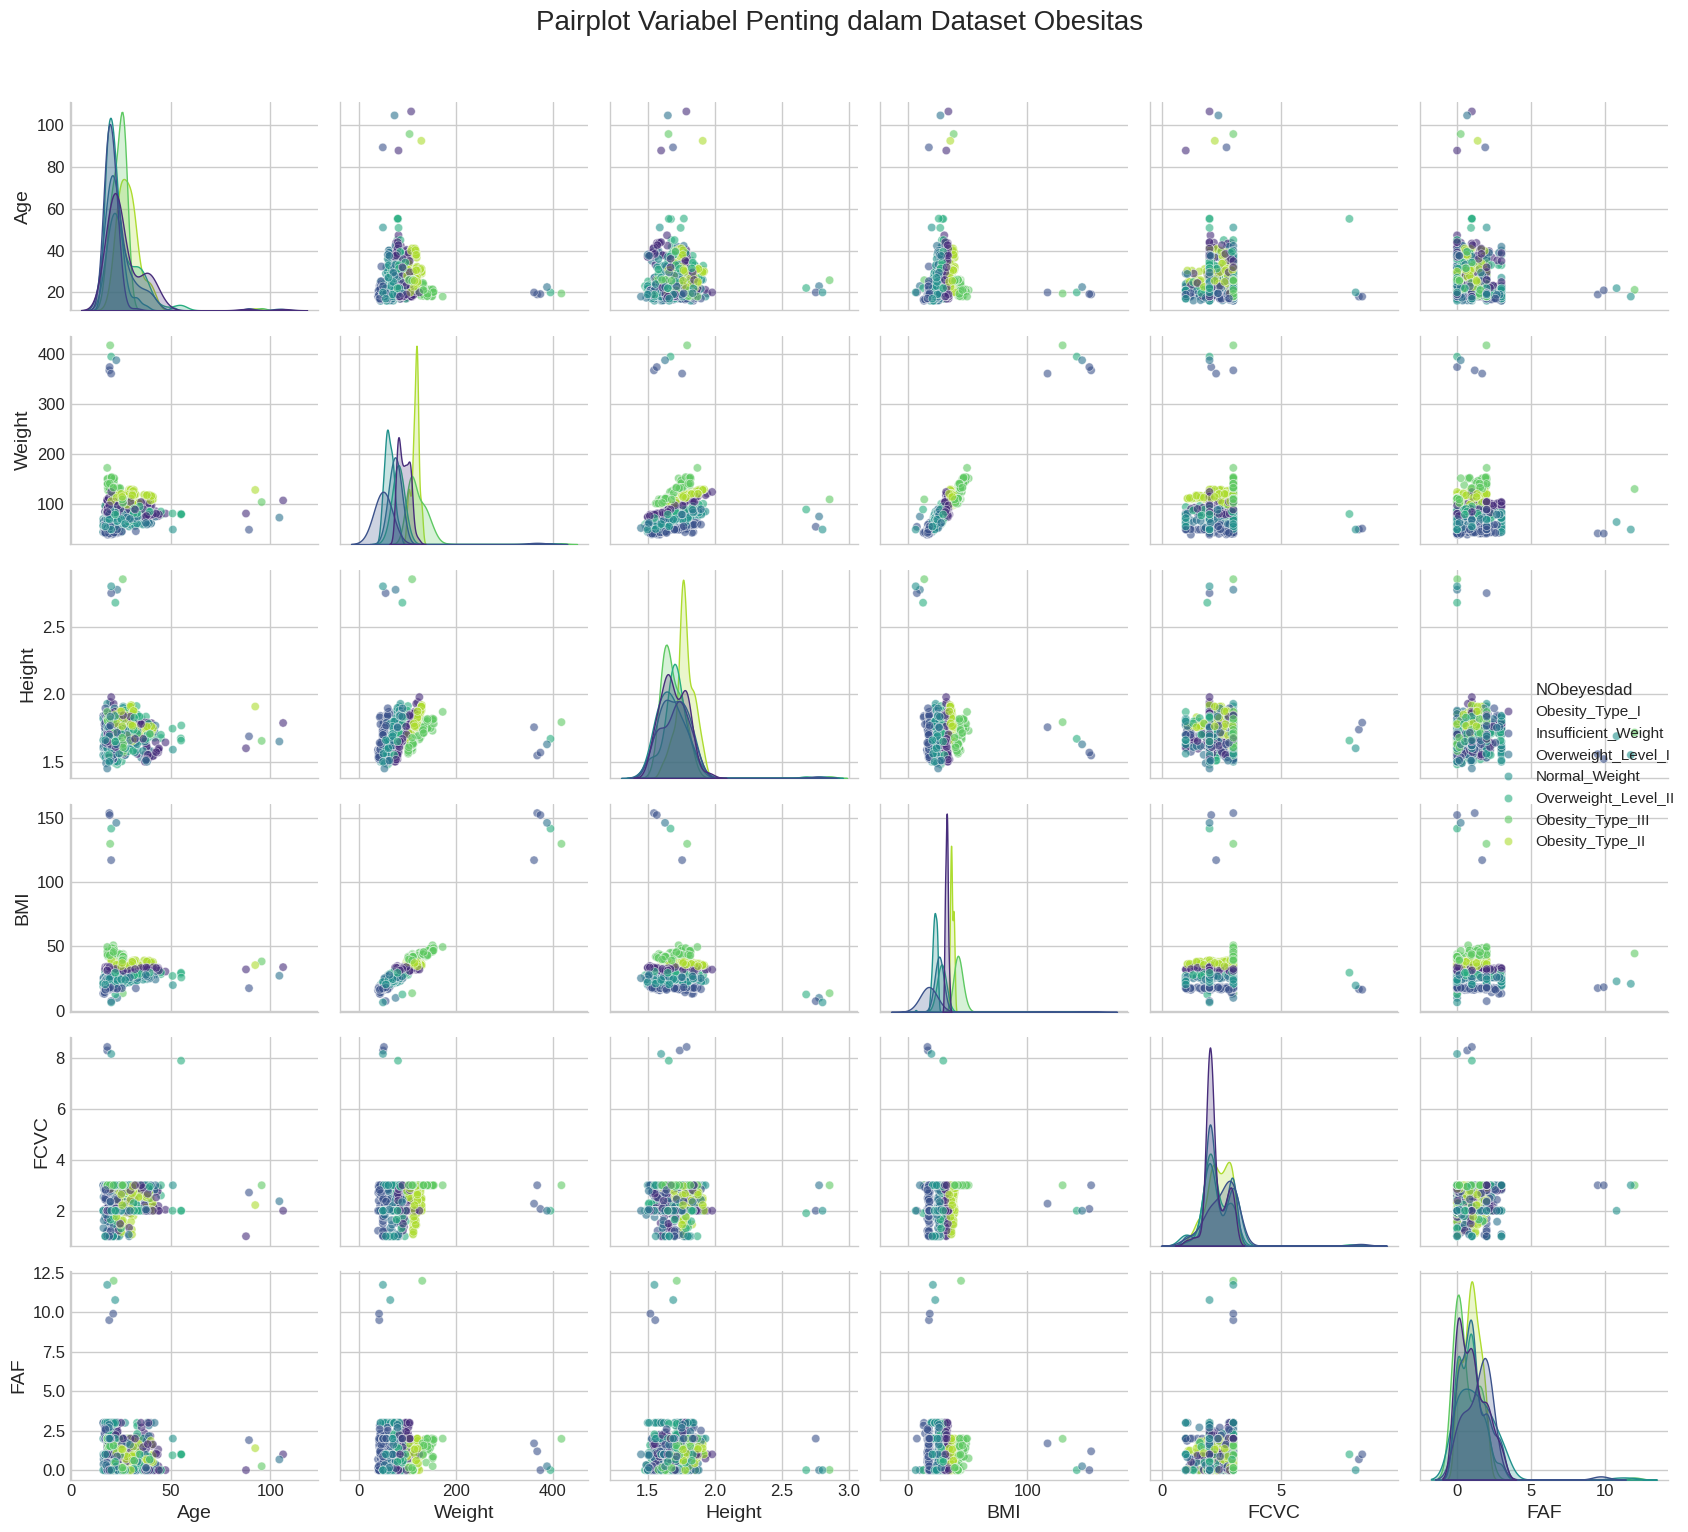


Langkah 4: Cara Membaca dan Menginterpretasikan Pairplot
------------------------------------------------------------
1. Diagonal (dari kiri atas ke kanan bawah):
   • Menampilkan distribusi setiap variabel
   • Bentuk kurva KDE menunjukkan bagaimana nilai tersebar
   • Warna berbeda menunjukkan distribusi untuk setiap level obesitas

2. Plot di luar diagonal:
   • Setiap plot menunjukkan hubungan antara dua variabel
   • Sumbu x dan y sesuai dengan perpotongan baris dan kolom
   • Pola pengelompokan dapat menunjukkan korelasi atau hubungan

3. Interpretasi warna:
   • Setiap warna mewakili level obesitas yang berbeda
   • Pemisahan jelas antara warna menunjukkan variabel yang baik untuk membedakan level obesitas
   • Tumpang tindih warna menunjukkan variabel yang kurang efektif untuk membedakan level obesitas

Langkah 5: Contoh Interpretasi Hubungan Penting
------------------------------------------------------------
1. Hubungan BMI vs Weight:
   • Biasanya menunjukkan korelasi posit

In [10]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== VISUALISASI HUBUNGAN ANTAR VARIABEL PENTING (PAIRPLOT) =====
print("="*80)
print("VISUALISASI HUBUNGAN ANTAR VARIABEL PENTING DENGAN PAIRPLOT")
print("="*80)

# Langkah 1: Memahami konsep pairplot
print("\nApa itu Pairplot dan Mengapa Penting?")
print("-"*60)
print("• Pairplot adalah visualisasi yang menampilkan hubungan berpasangan antara beberapa variabel")
print("• Setiap sel dalam grid menampilkan hubungan antara dua variabel berbeda")
print("• Diagonal utama menampilkan distribusi masing-masing variabel (histogram atau KDE)")
print("• Pairplot berguna untuk melihat korelasi dan pola hubungan antar variabel sekaligus")
print("• Ini sangat membantu untuk memahami data multidimensi dalam satu tampilan")

# Langkah 2: Mempersiapkan data untuk pairplot
print("\nLangkah 1: Persiapan Data untuk Pairplot")
print("-"*60)

# Kita perlu memastikan semua kolom numerik memiliki nilai yang valid
print("Memeriksa dan membersihkan data...")

# Daftar variabel penting yang akan divisualisasikan
important_cols = ['Age', 'Weight', 'Height', 'BMI', 'FCVC', 'FAF', 'NObeyesdad']

# Penjelasan variabel yang dipilih
variable_explanation = {
    'Age': 'Usia responden (tahun)',
    'Weight': 'Berat badan responden (kg)',
    'Height': 'Tinggi badan responden (m)',
    'BMI': 'Body Mass Index (kg/m²)',
    'FCVC': 'Frekuensi konsumsi sayuran',
    'FAF': 'Frekuensi aktivitas fisik per minggu',
    'NObeyesdad': 'Level obesitas (variabel target)'
}

# Tampilkan penjelasan variabel yang dipilih
print("\nVariabel penting yang akan divisualisasikan:")
for var in important_cols:
    print(f"• {var}: {variable_explanation[var]}")

# Pastikan BMI dihitung jika belum ada
if 'BMI' not in df.columns:
    print("\nMenghitung BMI dari Weight dan Height...")
    # Pastikan Weight dan Height numerik
    df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
    df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
    # Hitung BMI = Weight / Height²
    df['BMI'] = df['Weight'] / (df['Height'] ** 2)
    print("BMI berhasil dihitung!")

# Membersihkan data untuk analisis
print("\nMembersihkan data...")
# Konversi kolom numerik ke tipe numerik
for col in ['Age', 'Weight', 'Height', 'BMI', 'FCVC', 'FAF']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter data dengan nilai yang valid
df_clean = df.dropna(subset=important_cols)
print(f"• Data setelah pembersihan: {len(df_clean)} dari {len(df)} total baris")

# Langkah 3: Mengambil sampel data untuk visualisasi yang lebih efisien
print("\nLangkah 2: Pengambilan Sampel Data")
print("-"*60)
print("Mengapa mengambil sampel data?")
print("• Pairplot dengan data besar membutuhkan waktu lama untuk dirender")
print("• Visualisasi dengan terlalu banyak titik bisa sulit dibaca")
print("• Sampel acak dapat mempertahankan pola umum dalam data")

# Ambil sampel data untuk visualisasi yang lebih efisien
sample_size = min(1000, len(df_clean))
subset_df = df_clean.sample(n=sample_size, random_state=42)
print(f"\nMengambil sampel acak {sample_size} baris dari {len(df_clean)} baris data")
print("• random_state=42 memastikan hasil sampel selalu sama setiap kali kode dijalankan")

# Langkah 4: Membuat visualisasi pairplot
print("\nLangkah 3: Membuat Visualisasi Pairplot")
print("-"*60)
print("Parameter penting dalam pairplot:")
print("• hue='NObeyesdad': Warna berbeda untuk setiap level obesitas")
print("• palette='viridis': Skema warna yang digunakan")
print("• plot_kws={'alpha': 0.6}: Transparansi titik untuk mengurangi overplotting")
print("• diag_kind='kde': Menampilkan Kernel Density Estimation pada diagonal")
print("• height=2.5: Ukuran setiap subplot dalam inci")

print("\nMembuat pairplot (ini mungkin memerlukan waktu beberapa detik)...")

# Membuat pairplot
plt.figure(figsize=(12, 10))  # Ini hanya untuk inisialisasi, ukuran akan diatur oleh sns.pairplot
pairplot = sns.pairplot(
    subset_df[important_cols],  # Data yang akan divisualisasikan
    hue='NObeyesdad',           # Variabel untuk pembedaan warna
    palette='viridis',          # Skema warna
    plot_kws={'alpha': 0.6},    # Transparansi titik
    diag_kind='kde',            # Jenis plot diagonal: KDE
    height=2.5                  # Ukuran setiap subplot
)

# Menambahkan judul utama
plt.suptitle('Pairplot Variabel Penting dalam Dataset Obesitas', fontsize=20, y=1.02)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menyimpan visualisasi
print("Menyimpan visualisasi...")
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
print("• Visualisasi disimpan sebagai 'pairplot.png'")

# Menampilkan visualisasi
plt.show()

# Langkah 5: Cara membaca dan menginterpretasikan pairplot
print("\nLangkah 4: Cara Membaca dan Menginterpretasikan Pairplot")
print("-"*60)
print("1. Diagonal (dari kiri atas ke kanan bawah):")
print("   • Menampilkan distribusi setiap variabel")
print("   • Bentuk kurva KDE menunjukkan bagaimana nilai tersebar")
print("   • Warna berbeda menunjukkan distribusi untuk setiap level obesitas")
print("\n2. Plot di luar diagonal:")
print("   • Setiap plot menunjukkan hubungan antara dua variabel")
print("   • Sumbu x dan y sesuai dengan perpotongan baris dan kolom")
print("   • Pola pengelompokan dapat menunjukkan korelasi atau hubungan")
print("\n3. Interpretasi warna:")
print("   • Setiap warna mewakili level obesitas yang berbeda")
print("   • Pemisahan jelas antara warna menunjukkan variabel yang baik untuk membedakan level obesitas")
print("   • Tumpang tindih warna menunjukkan variabel yang kurang efektif untuk membedakan level obesitas")

# Langkah 6: Contoh interpretasi untuk beberapa hubungan penting
print("\nLangkah 5: Contoh Interpretasi Hubungan Penting")
print("-"*60)
print("1. Hubungan BMI vs Weight:")
print("   • Biasanya menunjukkan korelasi positif yang kuat")
print("   • Semakin tinggi berat, semakin tinggi BMI")
print("   • Pengelompokan warna menunjukkan BMI adalah prediktor kuat untuk level obesitas")
print("\n2. Hubungan Height vs Weight:")
print("   • Korelasi positif moderat (orang lebih tinggi cenderung lebih berat)")
print("   • Namun, tinggi bukanlah penentu utama level obesitas")
print("\n3. Hubungan Age vs BMI:")
print("   • Mungkin menunjukkan tren positif lemah")
print("   • Usia mungkin menjadi faktor dalam kecenderungan obesitas")
print("\n4. Hubungan FAF (aktivitas fisik) vs BMI:")
print("   • Biasanya menunjukkan korelasi negatif")
print("   • Lebih banyak aktivitas fisik cenderung berhubungan dengan BMI lebih rendah")

print("\nKESIMPULAN:")
print("Pairplot memberikan gambaran komprehensif tentang hubungan antar variabel penting")
print("dalam dataset obesitas. Ini membantu mengidentifikasi variabel mana yang paling")
print("berpengaruh terhadap level obesitas dan bagaimana variabel-variabel tersebut")
print("berhubungan satu sama lain. Pemahaman ini sangat penting untuk pemodelan")
print("prediktif dan mengembangkan strategi intervensi untuk mengelola obesitas.")

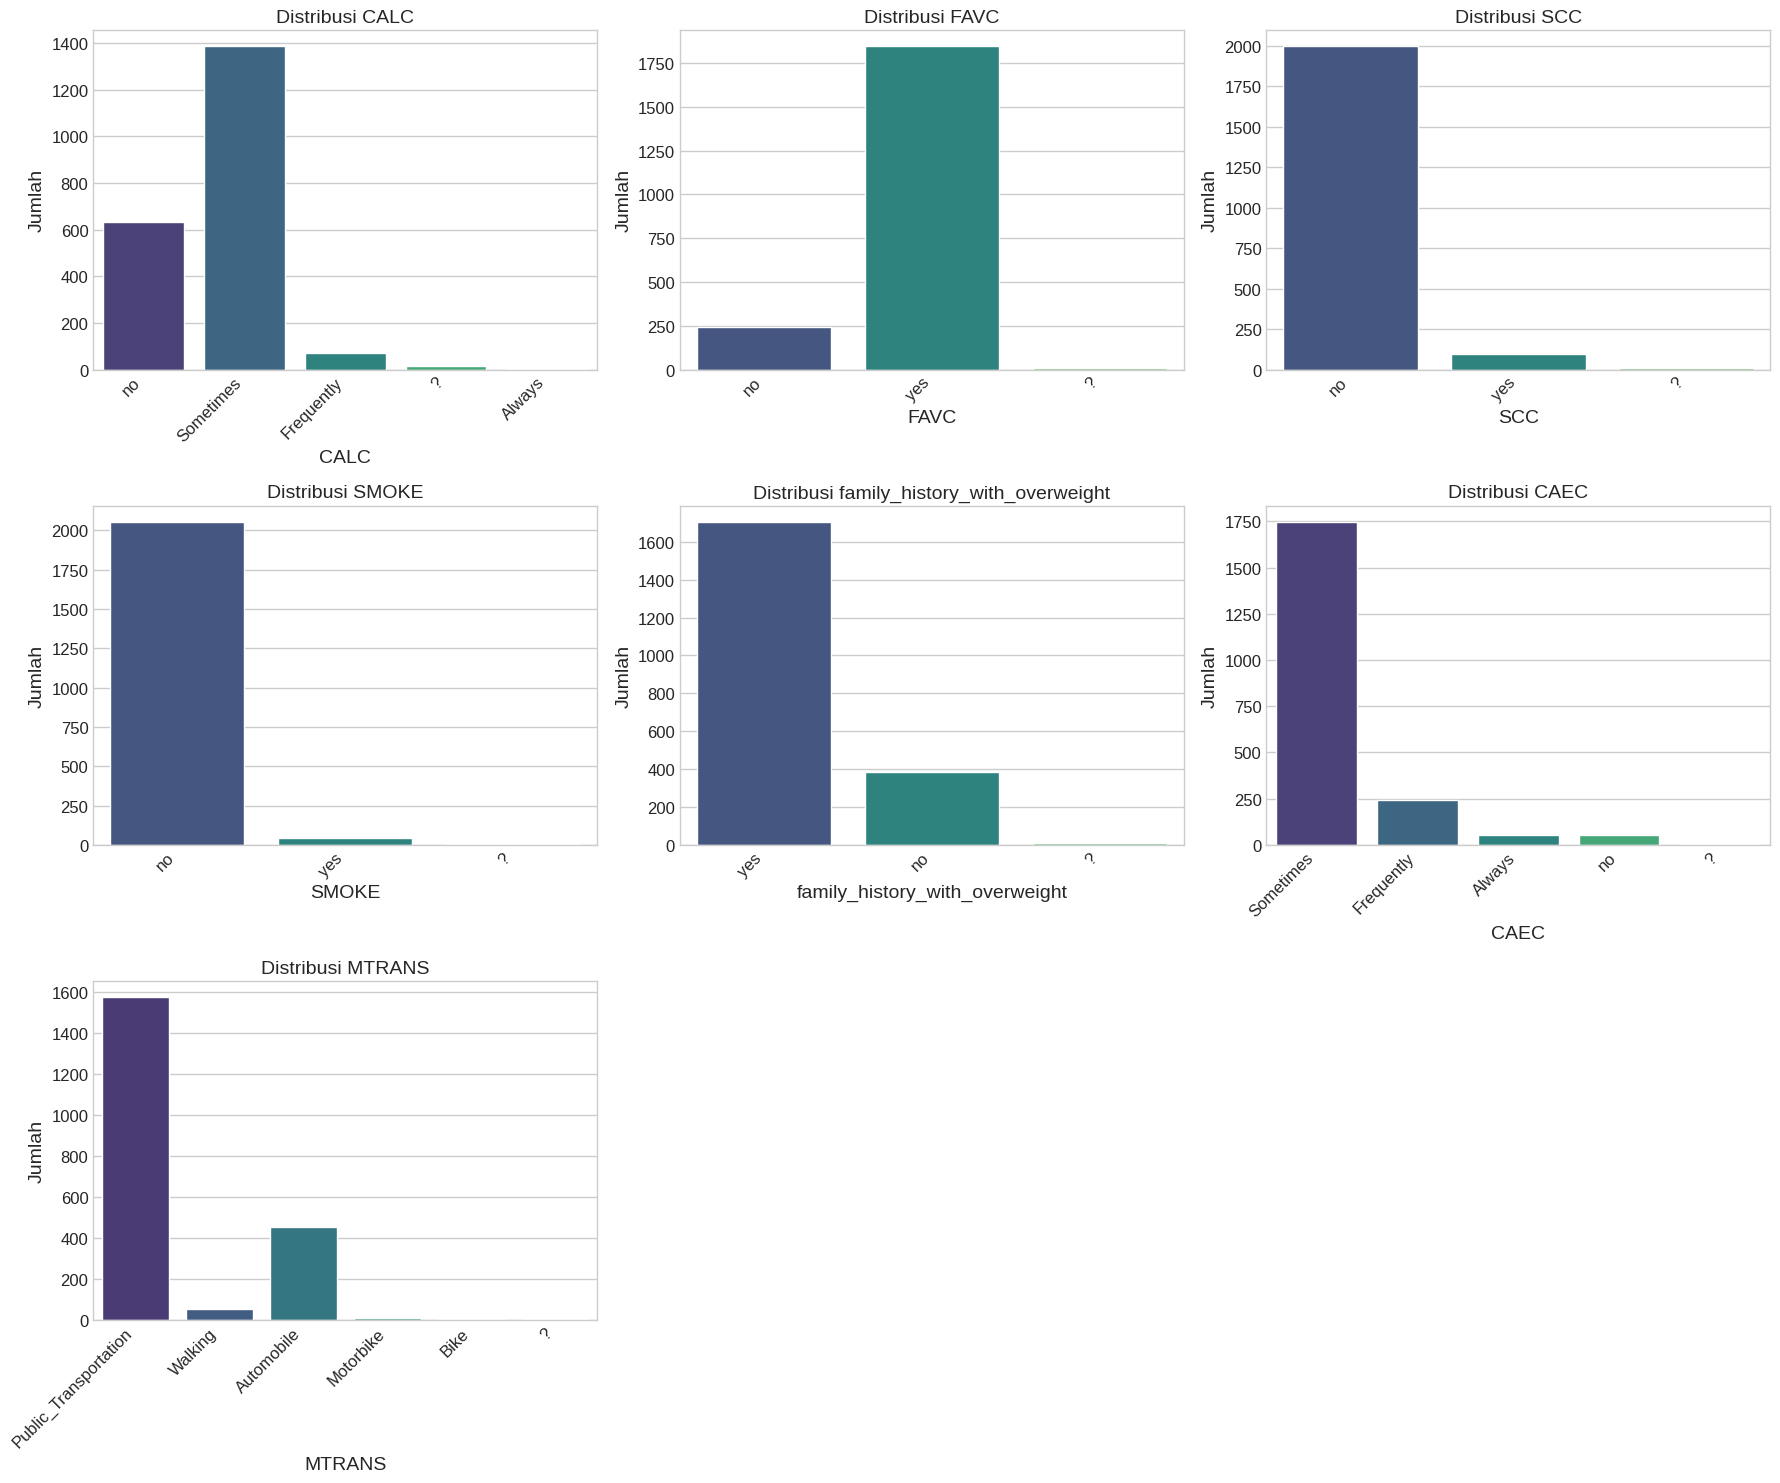

In [11]:
# 9. VISUALISASI COUNTPLOT UNTUK FITUR KATEGORIKAL
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('countplot_kategorikal.png')
plt.show()

MEMBUAT DASHBOARD VISUALISASI: DISTRIBUSI LEVEL OBESITAS

Langkah 1: Memahami GridSpec untuk Layout Dashboard
----------------------------------------------------------------------
Apa itu GridSpec dan mengapa menggunakannya?
• GridSpec adalah fitur dalam Matplotlib untuk mengatur layout subplot dengan lebih fleksibel
• Memungkinkan kita membuat subplot dengan ukuran berbeda dalam satu figure
• Format: plt.subplot(gs[baris, kolom]) - gs adalah objek GridSpec
• Contoh: gs[0, :2] berarti subplot menempati baris pertama (indeks 0) dan dua kolom pertama

Keuntungan menggunakan GridSpec:
• Kontrol lebih baik atas posisi dan ukuran setiap plot
• Memungkinkan membuat dashboard dengan elemen visual berbeda ukuran
• Ideal untuk membuat dashboard profesional dengan beberapa visualisasi

Langkah 2: Persiapan Data untuk Visualisasi
----------------------------------------------------------------------
Data distribusi level obesitas:
• Insufficient_Weight: 272 orang (12.9%)
• Normal_Weight: 287 ora

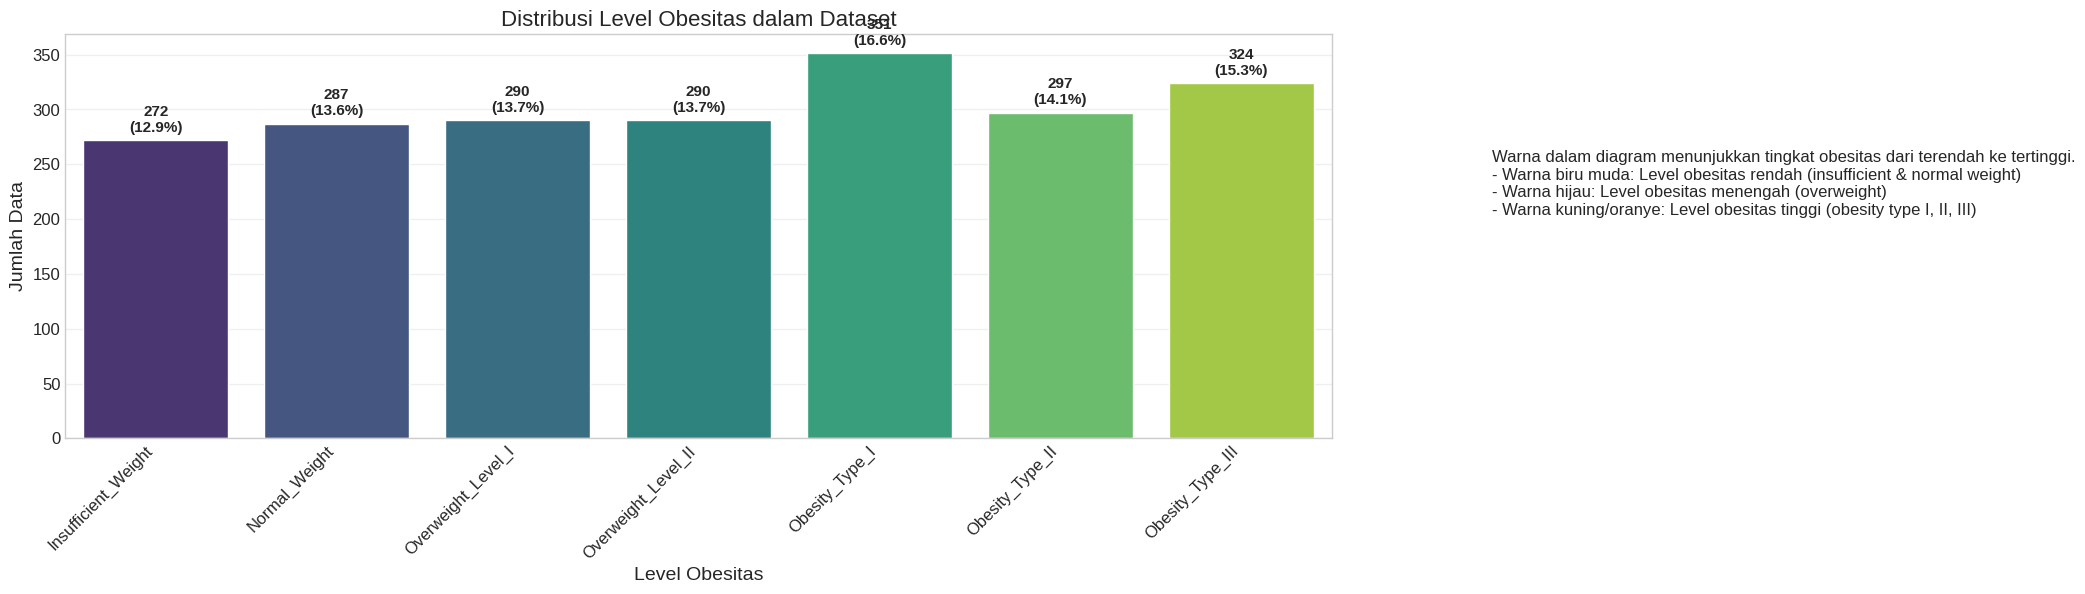


Langkah 5: Interpretasi Visualisasi Distribusi Level Obesitas
----------------------------------------------------------------------
Cara membaca visualisasi bar chart:
1. Sumbu X menunjukkan berbagai level obesitas dalam dataset
2. Sumbu Y menunjukkan jumlah orang (frekuensi) untuk setiap level
3. Setiap bar memiliki warna berbeda sesuai level obesitas
4. Teks di atas setiap bar menunjukkan jumlah dan persentase

Apa yang bisa kita pelajari dari visualisasi ini:
• Distribusi level obesitas dalam dataset—apakah seimbang atau tidak?
• Level obesitas mana yang paling umum dalam dataset?
• Perbandingan antara kelompok dengan berat badan normal, kelebihan berat badan, dan obesitas
• Informasi ini penting untuk memahami karakteristik dataset dan potensi bias

Aplikasi dalam analisis data kesehatan:
• Membantu dalam stratifikasi risiko kesehatan
• Mendukung perencanaan intervensi kesehatan masyarakat
• Memberikan gambaran demografis populasi yang diteliti

Langkah 6: Melengkapi Dashboard de

In [12]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec  # Library untuk tata letak subplot yang fleksibel

# ===== MEMBUAT DASHBOARD VISUALISASI: DISTRIBUSI LEVEL OBESITAS =====
print("="*80)
print("MEMBUAT DASHBOARD VISUALISASI: DISTRIBUSI LEVEL OBESITAS")
print("="*80)

# Langkah 1: Memahami GridSpec untuk layout dashboard yang lebih fleksibel
print("\nLangkah 1: Memahami GridSpec untuk Layout Dashboard")
print("-"*70)
print("Apa itu GridSpec dan mengapa menggunakannya?")
print("• GridSpec adalah fitur dalam Matplotlib untuk mengatur layout subplot dengan lebih fleksibel")
print("• Memungkinkan kita membuat subplot dengan ukuran berbeda dalam satu figure")
print("• Format: plt.subplot(gs[baris, kolom]) - gs adalah objek GridSpec")
print("• Contoh: gs[0, :2] berarti subplot menempati baris pertama (indeks 0) dan dua kolom pertama")
print("\nKeuntungan menggunakan GridSpec:")
print("• Kontrol lebih baik atas posisi dan ukuran setiap plot")
print("• Memungkinkan membuat dashboard dengan elemen visual berbeda ukuran")
print("• Ideal untuk membuat dashboard profesional dengan beberapa visualisasi")

# Langkah 2: Mempersiapkan data untuk visualisasi distribusi level obesitas
print("\nLangkah 2: Persiapan Data untuk Visualisasi")
print("-"*70)

# Pastikan data obesitas valid untuk visualisasi
if 'NObeyesdad' not in df.columns:
    print("Error: Kolom 'NObeyesdad' tidak ditemukan dalam dataset!")
else:
    # Hitung frekuensi setiap level obesitas
    target_counts = df['NObeyesdad'].value_counts()

    # Urutkan level obesitas secara logis
    obesity_levels = [
        'Insufficient_Weight',  # Berat badan kurang
        'Normal_Weight',        # Berat badan normal
        'Overweight_Level_I',   # Kelebihan berat badan level I
        'Overweight_Level_II',  # Kelebihan berat badan level II
        'Obesity_Type_I',       # Obesitas tipe I
        'Obesity_Type_II',      # Obesitas tipe II
        'Obesity_Type_III'      # Obesitas tipe III
    ]

    # Urutkan berdasarkan urutan yang telah ditentukan
    target_counts = target_counts.reindex(obesity_levels)

    print("Data distribusi level obesitas:")
    for level, count in target_counts.items():
        percentage = (count / len(df)) * 100
        print(f"• {level}: {count} orang ({percentage:.1f}%)")

# Langkah 3: Membuat figure dengan ukuran yang sesuai
print("\nLangkah 3: Menyiapkan Canvas untuk Dashboard")
print("-"*70)
print("• Membuat figure dengan ukuran 20x16 inci (besar untuk detail yang jelas)")
print("• Menggunakan GridSpec dengan 3 baris dan 3 kolom sebagai layout dasar")
print("• Dashboard ini akan memiliki beberapa visualisasi yang saling melengkapi")

# Membuat figure dengan ukuran besar
plt.figure(figsize=(20, 16))  # Lebar 20 inci, tinggi 16 inci

# Membuat objek GridSpec untuk mengatur layout
gs = GridSpec(3, 3)  # 3 baris, 3 kolom

# Langkah 4: Membuat visualisasi distribusi level obesitas
print("\nLangkah 4: Membuat Visualisasi Distribusi Level Obesitas")
print("-"*70)
print("• Plot ini akan menempati baris pertama, dua kolom pertama")
print("• Menampilkan jumlah data untuk setiap level obesitas")
print("• Menggunakan bar chart dengan warna yang berbeda untuk setiap level")

# Membuat subplot untuk distribusi level obesitas
# gs[0, :2] berarti subplot menempati baris 0 (pertama) dan kolom 0-1 (dua kolom pertama)
ax1 = plt.subplot(gs[0, :2])

# Membuat bar chart menggunakan seaborn
bars = sns.barplot(
    x=target_counts.index,      # Level obesitas pada sumbu x
    y=target_counts.values,     # Jumlah pada sumbu y
    palette='viridis',          # Skema warna
    ax=ax1                      # Axes yang akan digunakan
)

# Menambahkan judul dan label sumbu
ax1.set_title('Distribusi Level Obesitas dalam Dataset', fontsize=16)
ax1.set_xlabel('Level Obesitas', fontsize=14)
ax1.set_ylabel('Jumlah Data', fontsize=14)

# Memutar label pada sumbu x agar tidak tumpang tindih
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Menambahkan nilai di atas setiap bar untuk memudahkan pembacaan
for i, bar in enumerate(bars.patches):
    # Dapatkan koordinat x dan y untuk teks
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    # Tambahkan teks berupa jumlah dan persentase
    count = target_counts.values[i]
    percentage = (count / target_counts.sum()) * 100
    ax1.text(x, y + 5, f"{count}\n({percentage:.1f}%)",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Menambahkan grid untuk memudahkan pembacaan nilai
ax1.grid(axis='y', alpha=0.3)

# Menambahkan keterangan warna (background) untuk interpretasi lebih baik
background_text = """
Warna dalam diagram menunjukkan tingkat obesitas dari terendah ke tertinggi.
- Warna biru muda: Level obesitas rendah (insufficient & normal weight)
- Warna hijau: Level obesitas menengah (overweight)
- Warna kuning/oranye: Level obesitas tinggi (obesity type I, II, III)
"""
# Tambahkan teks penjelasan di sisi kanan diagram
plt.figtext(0.75, 0.85, background_text, fontsize=12,
           bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Menyimpan visualisasi
plt.savefig('distribusi_obesitas_dashboard.png', dpi=300, bbox_inches='tight')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

# Langkah 5: Interpretasi visualisasi distribusi level obesitas
print("\nLangkah 5: Interpretasi Visualisasi Distribusi Level Obesitas")
print("-"*70)
print("Cara membaca visualisasi bar chart:")
print("1. Sumbu X menunjukkan berbagai level obesitas dalam dataset")
print("2. Sumbu Y menunjukkan jumlah orang (frekuensi) untuk setiap level")
print("3. Setiap bar memiliki warna berbeda sesuai level obesitas")
print("4. Teks di atas setiap bar menunjukkan jumlah dan persentase")

print("\nApa yang bisa kita pelajari dari visualisasi ini:")
print("• Distribusi level obesitas dalam dataset—apakah seimbang atau tidak?")
print("• Level obesitas mana yang paling umum dalam dataset?")
print("• Perbandingan antara kelompok dengan berat badan normal, kelebihan berat badan, dan obesitas")
print("• Informasi ini penting untuk memahami karakteristik dataset dan potensi bias")

print("\nAplikasi dalam analisis data kesehatan:")
print("• Membantu dalam stratifikasi risiko kesehatan")
print("• Mendukung perencanaan intervensi kesehatan masyarakat")
print("• Memberikan gambaran demografis populasi yang diteliti")

# Langkah 6: Petunjuk untuk melengkapi dashboard
print("\nLangkah 6: Melengkapi Dashboard dengan Visualisasi Tambahan")
print("-"*70)
print("Untuk dashboard lengkap, tambahkan visualisasi berikut pada posisi GridSpec lainnya:")
print("1. gs[0, 2] - Distribusi Gender (pie chart)")
print("2. gs[1, :2] - Distribusi BMI (histogram)")
print("3. gs[1, 2] - Riwayat Keluarga vs Obesitas (bar chart)")
print("4. gs[2, :] - Aktivitas Fisik berdasarkan Level Obesitas (boxplot)")
print("\nContoh kode untuk visualisasi tambahan:")
print("ax2 = plt.subplot(gs[0, 2])")
print("# Kode untuk pie chart distribusi gender")
print("\nax3 = plt.subplot(gs[1, :2])")
print("# Kode untuk histogram distribusi BMI")
print("# ... dan seterusnya")

Text(0, 0.5, '')

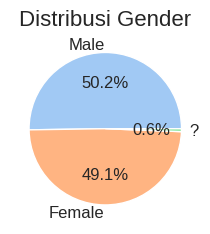

In [13]:
# Plot 2: Gender vs Obesitas
ax2 = plt.subplot(gs[0, 2])
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax2, colors=sns.color_palette('pastel'))
ax2.set_title('Distribusi Gender', fontsize=16)
ax2.set_ylabel('')

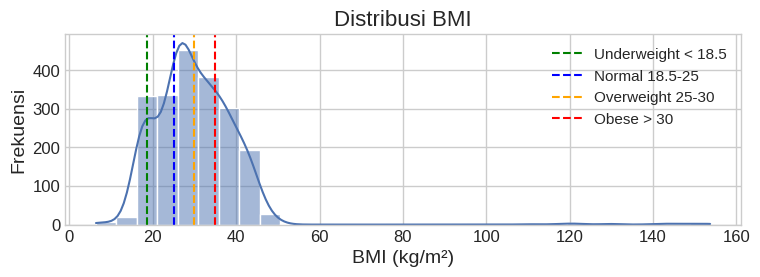

In [14]:
# Plot 3: BMI Distribution
ax3 = plt.subplot(gs[1, :2])
sns.histplot(df['BMI'], kde=True, bins=30, ax=ax3)
ax3.axvline(x=18.5, color='green', linestyle='--', label='Underweight < 18.5')
ax3.axvline(x=25, color='blue', linestyle='--', label='Normal 18.5-25')
ax3.axvline(x=30, color='orange', linestyle='--', label='Overweight 25-30')
ax3.axvline(x=35, color='red', linestyle='--', label='Obese > 30')
ax3.set_title('Distribusi BMI', fontsize=16)
ax3.set_xlabel('BMI (kg/m²)')
ax3.set_ylabel('Frekuensi')
ax3.legend()

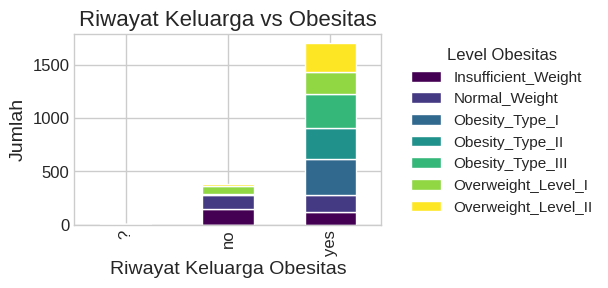

In [15]:
# Plot 4: Family History
ax4 = plt.subplot(gs[1, 2])
family_history = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])
family_history.plot(kind='bar', stacked=True, colormap='viridis', ax=ax4)
ax4.set_title('Riwayat Keluarga vs Obesitas', fontsize=16)
ax4.set_xlabel('Riwayat Keluarga Obesitas')
ax4.set_ylabel('Jumlah')
ax4.legend(title='Level Obesitas', bbox_to_anchor=(1.05, 1), loc='upper left')

VISUALISASI FREKUENSI AKTIVITAS FISIK BERDASARKAN LEVEL OBESITAS

Langkah 1: Memahami Variabel FAF (Frekuensi Aktivitas Fisik)
----------------------------------------------------------------------
• FAF adalah singkatan dari Frequency of Physical Activity
• Mengukur seberapa sering seseorang melakukan aktivitas fisik dalam seminggu
• Nilai lebih tinggi menunjukkan aktivitas fisik yang lebih sering
• Penting untuk memahami hubungannya dengan level obesitas

Langkah 2: Membersihkan dan Menyiapkan Data
----------------------------------------------------------------------
Statistik dasar FAF sebelum pembersihan:
• Jumlah data valid: 2092.0
• Rata-rata: 1.07
• Min: 0.00
• Max: 12.27

Hasil pembersihan data:
• Data awal: 2111 baris
• Data setelah pembersihan: 2079 baris
• Data yang dihapus: 32 baris

Langkah 3: Membuat Visualisasi yang Lebih Jelas
----------------------------------------------------------------------


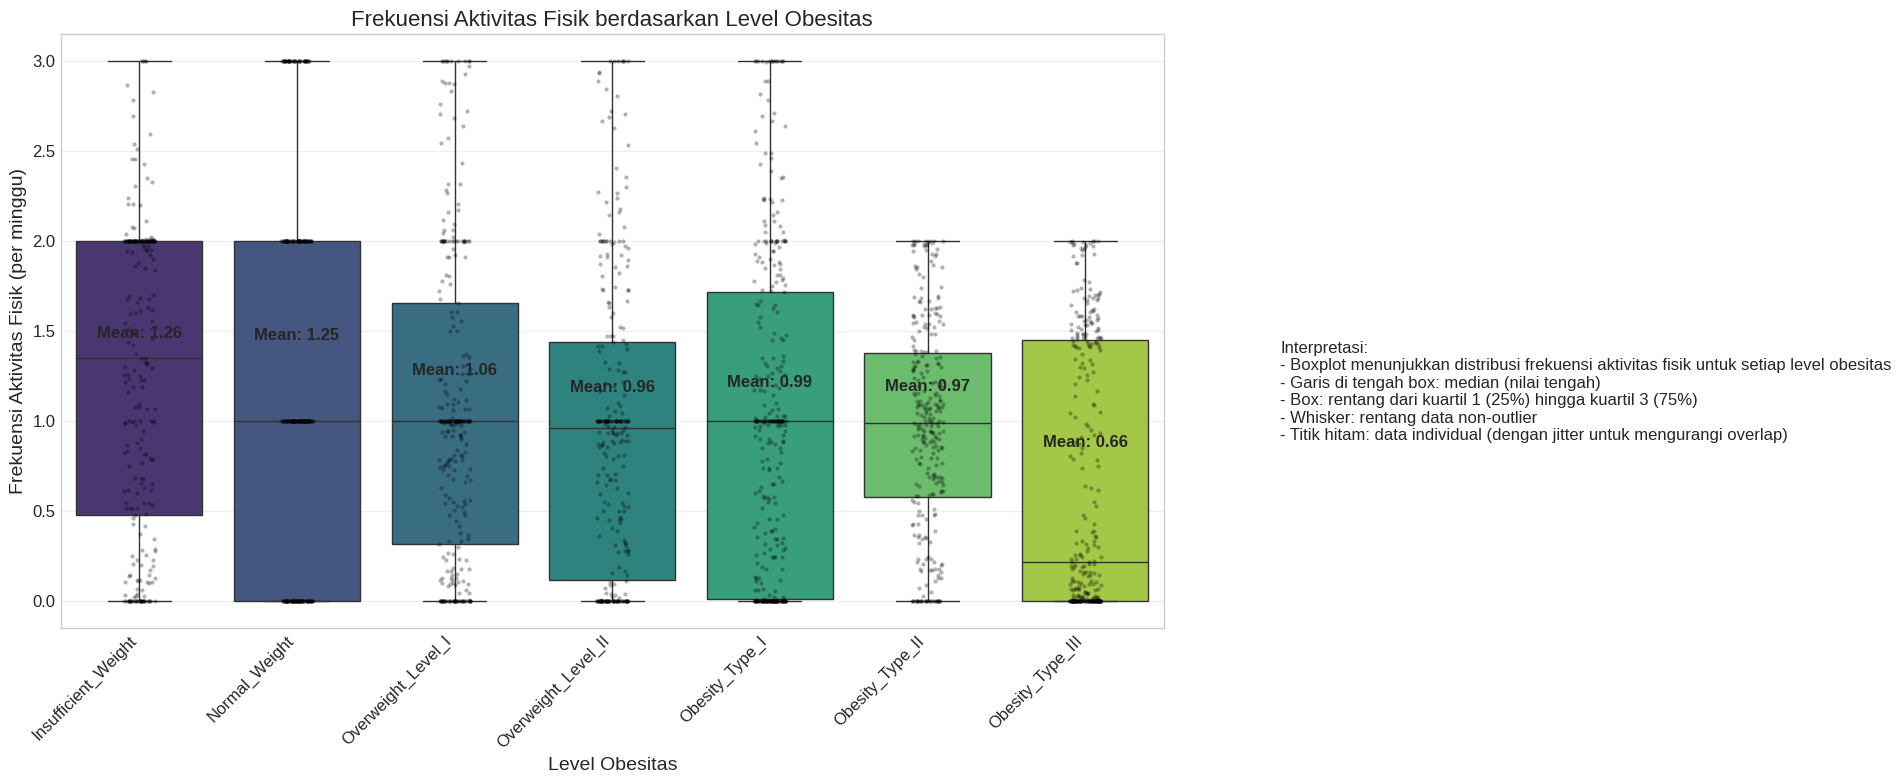


Langkah 4: Analisis dan Interpretasi
----------------------------------------------------------------------
Statistik Frekuensi Aktivitas Fisik per Level Obesitas:
                     mean  median   std
NObeyesdad                             
Insufficient_Weight  1.26    1.35  0.85
Normal_Weight        1.25    1.00  1.02
Overweight_Level_I   1.06    1.00  0.85
Overweight_Level_II  0.96    0.96  0.83
Obesity_Type_I       0.99    1.00  0.90
Obesity_Type_II      0.97    0.99  0.58
Obesity_Type_III     0.66    0.22  0.73

Analisis Korelasi:
• Korelasi Spearman antara level obesitas dan FAF: -0.184
• P-value: 0.00000
• Interpretasi: Terdapat korelasi negatif yang signifikan antara
  level obesitas dan frekuensi aktivitas fisik. Ini berarti semakin
  tinggi level obesitas, semakin rendah frekuensi aktivitas fisik.

Implikasi Praktis:
1. Pentingnya aktivitas fisik reguler dalam manajemen berat badan
2. Potensi aktivitas fisik sebagai faktor dalam model prediksi obesitas
3. Petunjuk untuk in

In [16]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===== PERBAIKAN VISUALISASI FREKUENSI AKTIVITAS FISIK =====
print("="*80)
print("VISUALISASI FREKUENSI AKTIVITAS FISIK BERDASARKAN LEVEL OBESITAS")
print("="*80)

# Langkah 1: Memahami variabel FAF (Frekuensi Aktivitas Fisik)
print("\nLangkah 1: Memahami Variabel FAF (Frekuensi Aktivitas Fisik)")
print("-"*70)
print("• FAF adalah singkatan dari Frequency of Physical Activity")
print("• Mengukur seberapa sering seseorang melakukan aktivitas fisik dalam seminggu")
print("• Nilai lebih tinggi menunjukkan aktivitas fisik yang lebih sering")
print("• Penting untuk memahami hubungannya dengan level obesitas")

# Persiapkan data untuk visualisasi
print("\nLangkah 2: Membersihkan dan Menyiapkan Data")
print("-"*70)

# Konversi FAF ke tipe numerik
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')

# Periksa statistik dasar
print("Statistik dasar FAF sebelum pembersihan:")
faf_stats = df['FAF'].describe()
print(f"• Jumlah data valid: {faf_stats['count']}")
print(f"• Rata-rata: {faf_stats['mean']:.2f}")
print(f"• Min: {faf_stats['min']:.2f}")
print(f"• Max: {faf_stats['max']:.2f}")

# Identifikasi dan tangani outlier
Q1 = df['FAF'].quantile(0.25)
Q3 = df['FAF'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buat dataframe bersih untuk visualisasi
df_clean = df[(df['FAF'].notna()) & (df['FAF'] >= lower_bound) & (df['FAF'] <= upper_bound)]

print(f"\nHasil pembersihan data:")
print(f"• Data awal: {len(df)} baris")
print(f"• Data setelah pembersihan: {len(df_clean)} baris")
print(f"• Data yang dihapus: {len(df) - len(df_clean)} baris")

# Langkah 3: Membuat visualisasi yang lebih jelas
print("\nLangkah 3: Membuat Visualisasi yang Lebih Jelas")
print("-"*70)

# Atur urutan level obesitas yang logis
obesity_order = [
    'Insufficient_Weight',  # Berat badan kurang
    'Normal_Weight',        # Berat badan normal
    'Overweight_Level_I',   # Kelebihan berat badan level I
    'Overweight_Level_II',  # Kelebihan berat badan level II
    'Obesity_Type_I',       # Obesitas tipe I
    'Obesity_Type_II',      # Obesitas tipe II
    'Obesity_Type_III'      # Obesitas tipe III
]

# Buat figure dengan ukuran yang sesuai
plt.figure(figsize=(14, 8))

# Buat boxplot dengan seaborn
ax = sns.boxplot(
    x='NObeyesdad',        # Level obesitas pada sumbu x
    y='FAF',               # FAF pada sumbu y
    data=df_clean,         # Data yang sudah dibersihkan
    palette='viridis',     # Skema warna yang sama dengan sebelumnya
    order=obesity_order    # Urutan level obesitas yang logis
)

# Tambahkan jitter plot untuk melihat distribusi data individual
sns.stripplot(
    x='NObeyesdad',            # Level obesitas pada sumbu x
    y='FAF',                   # FAF pada sumbu y
    data=df_clean,             # Data yang sudah dibersihkan
    color='black',             # Warna titik
    alpha=0.3,                 # Transparansi titik
    size=3,                    # Ukuran titik
    jitter=True,               # Menambahkan jitter untuk mengurangi overlap
    order=obesity_order        # Urutan level obesitas yang sama
)

# Tambahkan informasi statistik
# Hitung rata-rata FAF untuk setiap level obesitas
faf_means = df_clean.groupby('NObeyesdad')['FAF'].mean()

# Tambahkan nilai rata-rata di atas setiap boxplot
for i, level in enumerate(obesity_order):
    if level in faf_means.index:
        mean_val = faf_means[level]
        ax.text(i, mean_val + 0.2, f"Mean: {mean_val:.2f}", ha='center', fontweight='bold')

# Tambahkan judul dan label
plt.title('Frekuensi Aktivitas Fisik berdasarkan Level Obesitas', fontsize=16)
plt.xlabel('Level Obesitas', fontsize=14)
plt.ylabel('Frekuensi Aktivitas Fisik (per minggu)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Tambahkan grid untuk memudahkan pembacaan
plt.grid(axis='y', alpha=0.3)

# Tambahkan teks informasi untuk membantu interpretasi
info_text = """
Interpretasi:
- Boxplot menunjukkan distribusi frekuensi aktivitas fisik untuk setiap level obesitas
- Garis di tengah box: median (nilai tengah)
- Box: rentang dari kuartil 1 (25%) hingga kuartil 3 (75%)
- Whisker: rentang data non-outlier
- Titik hitam: data individual (dengan jitter untuk mengurangi overlap)
"""

plt.figtext(0.92, 0.5, info_text, fontsize=12,
           bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
           verticalalignment='center')

# Atur layout agar tidak tumpang tindih
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Menyisakan ruang untuk teks informasi

# Simpan visualisasi dengan resolusi tinggi
plt.savefig('faf_vs_obesitas_fixed.png', dpi=300, bbox_inches='tight')

# Tampilkan visualisasi
plt.show()

# Langkah 4: Analisis dan Interpretasi
print("\nLangkah 4: Analisis dan Interpretasi")
print("-"*70)

# Hitung statistik FAF per level obesitas
faf_stats = df_clean.groupby('NObeyesdad')['FAF'].agg(['mean', 'median', 'std']).round(2)
faf_stats = faf_stats.reindex(obesity_order)

print("Statistik Frekuensi Aktivitas Fisik per Level Obesitas:")
print(faf_stats)

# Uji korelasi
from scipy.stats import spearmanr

# Konversi level obesitas ke numerik untuk analisis korelasi
obesity_mapping = {level: i for i, level in enumerate(obesity_order)}
df_clean['obesity_numeric'] = df_clean['NObeyesdad'].map(obesity_mapping)

# Hitung korelasi Spearman (lebih robust terhadap outlier)
correlation, p_value = spearmanr(df_clean['obesity_numeric'], df_clean['FAF'])

print(f"\nAnalisis Korelasi:")
print(f"• Korelasi Spearman antara level obesitas dan FAF: {correlation:.3f}")
print(f"• P-value: {p_value:.5f}")

if p_value < 0.05:
    if correlation < 0:
        print("• Interpretasi: Terdapat korelasi negatif yang signifikan antara")
        print("  level obesitas dan frekuensi aktivitas fisik. Ini berarti semakin")
        print("  tinggi level obesitas, semakin rendah frekuensi aktivitas fisik.")
    else:
        print("• Interpretasi: Terdapat korelasi positif yang signifikan.")
else:
    print("• Interpretasi: Tidak ada korelasi signifikan yang terdeteksi.")

print("\nImplikasi Praktis:")
print("1. Pentingnya aktivitas fisik reguler dalam manajemen berat badan")
print("2. Potensi aktivitas fisik sebagai faktor dalam model prediksi obesitas")
print("3. Petunjuk untuk intervensi kesehatan yang menekankan aktivitas fisik")

ANALISIS KUALITAS DATA PADA DATASET OBESITAS

1. PEMERIKSAAN MISSING VALUES
--------------------------------------------------
                                Jumlah Missing  Persentase (%)
BMI                                         41        1.942207
Age                                         22        1.042160
Height                                      22        1.042160
NCP                                         22        1.042160
Weight                                      19        0.900047
FAF                                         19        0.900047
FCVC                                        18        0.852676
CH2O                                        15        0.710564
TUE                                         15        0.710564
family_history_with_overweight              13        0.615822
CAEC                                        11        0.521080
FAVC                                        11        0.521080
SCC                                         10        

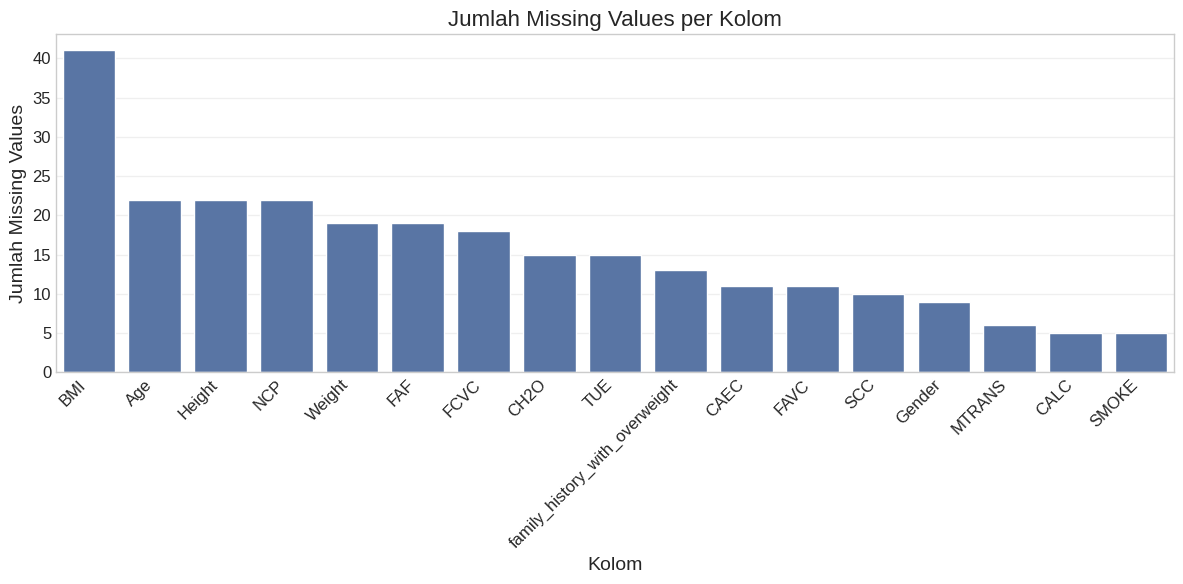

In [17]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats

# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

# Pastikan kolom numerik bertipe numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hitung BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

print("="*80)
print("ANALISIS KUALITAS DATA PADA DATASET OBESITAS")
print("="*80)

# 1. PEMERIKSAAN MISSING VALUES
print("\n1. PEMERIKSAAN MISSING VALUES")
print("-"*50)

# Jumlah missing values per kolom
missing_values = df.isnull().sum()
missing_percentages = 100 * missing_values / len(df)
missing_data = pd.concat([missing_values, missing_percentages], axis=1)
missing_data.columns = ['Jumlah Missing', 'Persentase (%)']

# Filter hanya kolom yang memiliki missing values
missing_data = missing_data[missing_data['Jumlah Missing'] > 0].sort_values('Persentase (%)', ascending=False)
print(missing_data)

# Visualisasi missing values
plt.figure(figsize=(12, 6))
plt.title('Jumlah Missing Values per Kolom', fontsize=16)
if missing_data.shape[0] > 0:
    sns.barplot(x=missing_data.index, y='Jumlah Missing', data=missing_data)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Jumlah Missing Values')
    plt.xlabel('Kolom')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Tidak ada missing values pada dataset")

In [18]:
# 2. PEMERIKSAAN UNIQUE VALUES
print("\n2. PEMERIKSAAN UNIQUE VALUES")
print("-"*50)

# Jumlah nilai unik per kolom
unique_counts = df.nunique()
print("Jumlah nilai unik per kolom:")
print(unique_counts)

# Tampilkan nilai unik untuk kolom kategori
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("\nNilai unik untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"Persentase: \n{100 * value_counts / len(df)}")


2. PEMERIKSAAN UNIQUE VALUES
--------------------------------------------------
Jumlah nilai unik per kolom:
Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
BMI                               1935
dtype: int64

Nilai unik untuk kolom kategorikal:

Gender: ['Female' 'Male' '?' nan]
Gender
Male      1056
Female    1033
?           13
Name: count, dtype: int64
Persentase: 
Gender
Male 

In [19]:
# 3. PEMERIKSAAN DATA DUPLIKAT
print("\n3. PEMERIKSAAN DATA DUPLIKAT")
print("-"*50)

# Jumlah data duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates} ({100 * duplicates / len(df):.2f}%)")

if duplicates > 0:
    # Lihat beberapa data duplikat
    print("\nContoh data duplikat:")
    print(df[df.duplicated(keep='first')].head())

    # Lihat distribusi duplikat berdasarkan target class
    dup_by_class = df[df.duplicated(keep=False)]['NObeyesdad'].value_counts()
    print("\nDistribusi data duplikat berdasarkan kelas target:")
    print(dup_by_class)

    # BAGIAN YANG DIGANTI:
    print("Persentase:")
    for idx, val in dup_by_class.items():
        print(f"{idx}: {100 * val / duplicates:.2f}%")


3. PEMERIKSAAN DATA DUPLIKAT
--------------------------------------------------
Jumlah data duplikat: 18 (0.85%)

Contoh data duplikat:
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   

    family_history_with_overweight  FAF  TUE        CAEC  \
98                              no  0.0  0.0  Frequently   
174                             no  1.0  0.0          no   
179                             no  1.0  0.0          no   
184                             no  1.0  0.0          no   
309                             no  0.0  1.0   Sometimes   

                    M


4. PEMERIKSAAN KESEIMBANGAN DATA (CLASS BALANCE)
--------------------------------------------------
Distribusi kelas target:
                     Jumlah  Persentase (%)
NObeyesdad                                 
Obesity_Type_I          351       16.627191
Obesity_Type_III        324       15.348176
Obesity_Type_II         297       14.069162
Overweight_Level_I      290       13.737565
Overweight_Level_II     290       13.737565
Normal_Weight           287       13.595452
Insufficient_Weight     272       12.884889


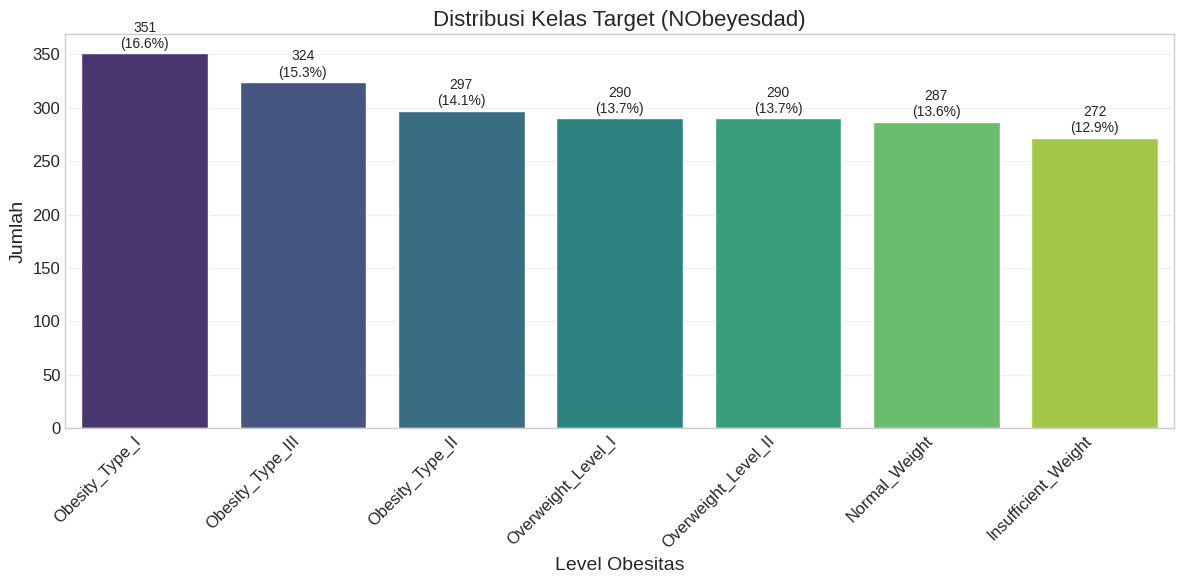

In [20]:
# 4. PEMERIKSAAN KESEIMBANGAN DATA (CLASS BALANCE)
print("\n4. PEMERIKSAAN KESEIMBANGAN DATA (CLASS BALANCE)")
print("-"*50)

# Distribusi kelas target
class_counts = df['NObeyesdad'].value_counts()
class_percentages = 100 * class_counts / len(df)

print("Distribusi kelas target:")
balance_df = pd.DataFrame({
    'Jumlah': class_counts,
    'Persentase (%)': class_percentages
})
print(balance_df)

# Visualisasi keseimbangan kelas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=16)
plt.xlabel('Level Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Tambahkan label pada setiap bar
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 5, f"{v}\n({class_percentages[i]:.1f}%)", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('class_balance.png', dpi=300, bbox_inches='tight')
plt.show()


5. DETEKSI OUTLIER MENGGUNAKAN BOXPLOT
--------------------------------------------------
Statistik outlier untuk kolom numerik:
   column  n_outliers  outlier_percentage        min         max  lower_bound  \
4     NCP         592           28.043581   1.000000   12.299828     2.188528   
0     Age         179            8.479394  14.000000  106.441252    10.888142   
2  Weight          15            0.710564  39.000000  441.131078     2.916396   
8     BMI          15            0.710564   6.371475  153.690334     6.673689   
6     FAF          13            0.615822   0.000000   12.270275    -2.202895   
1  Height          10            0.473709   1.450000    2.853986     1.420000   
3    FCVC           8            0.378967   1.000000    8.706795     0.500000   
5    CH2O           8            0.378967   1.000000    9.233294     0.201098   
7     TUE           7            0.331596   0.000000    7.669504    -1.500000   

   upper_bound  
4     3.486884  
0    35.067115  
2   171.

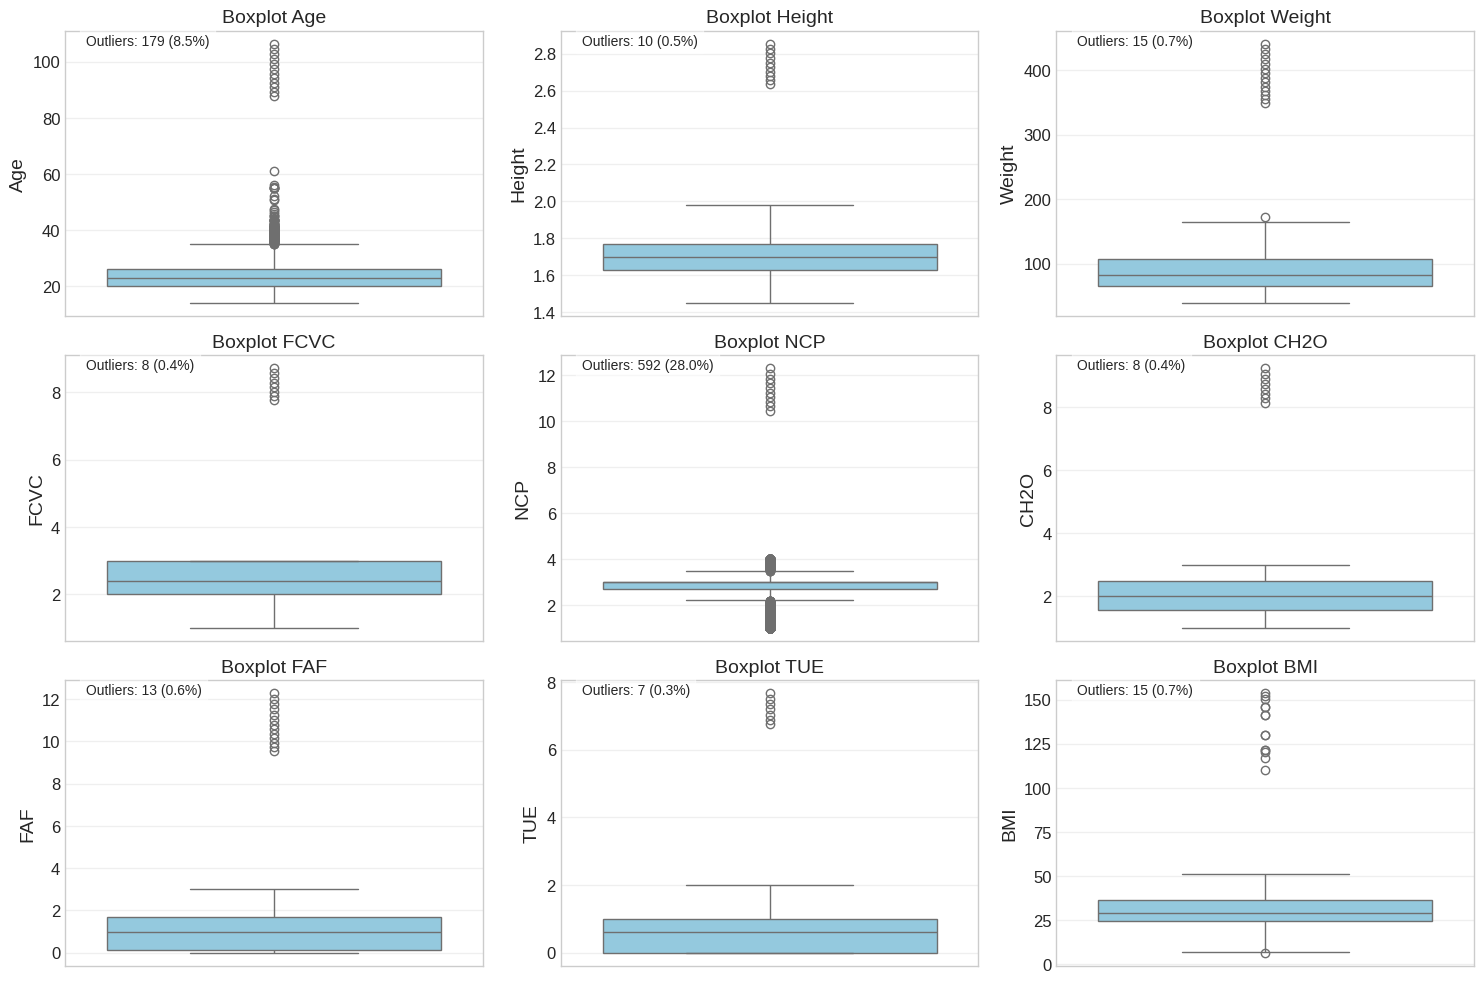

In [21]:
# 5. DETEKSI OUTLIER MENGGUNAKAN BOXPLOT
print("\n5. DETEKSI OUTLIER MENGGUNAKAN BOXPLOT")
print("-"*50)

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = 100 * len(outliers) / len(df)

    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers': len(outliers),
        'outlier_percentage': outlier_percentage,
        'min': df[column].min(),
        'max': df[column].max()
    }

# Kolom numerik untuk deteksi outlier
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Deteksi outlier untuk setiap kolom numerik
outlier_stats = []
for col in numeric_cols:
    if df[col].notna().sum() > 0:  # Skip kolom dengan semua nilai null
        outlier_stats.append(detect_outliers(df, col))

# Tampilkan statistik outlier
outlier_df = pd.DataFrame(outlier_stats)
outlier_df = outlier_df[['column', 'n_outliers', 'outlier_percentage', 'min', 'max', 'lower_bound', 'upper_bound']]
outlier_df = outlier_df.sort_values('outlier_percentage', ascending=False)
print("Statistik outlier untuk kolom numerik:")
print(outlier_df)

# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    if df[col].notna().sum() > 0:  # Skip kolom dengan semua nilai null
        plt.subplot(3, 3, i)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Boxplot {col}', fontsize=14)
        plt.ylabel(col)
        plt.grid(axis='y', alpha=0.3)

        # Tambahkan informasi outlier
        outlier_info = outlier_df[outlier_df['column'] == col].iloc[0]
        plt.text(0.05, 0.95, f"Outliers: {outlier_info['n_outliers']} ({outlier_info['outlier_percentage']:.1f}%)",
                 transform=plt.gca().transAxes, fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


6. BOXPLOT OUTLIER BERDASARKAN KELAS TARGET
--------------------------------------------------


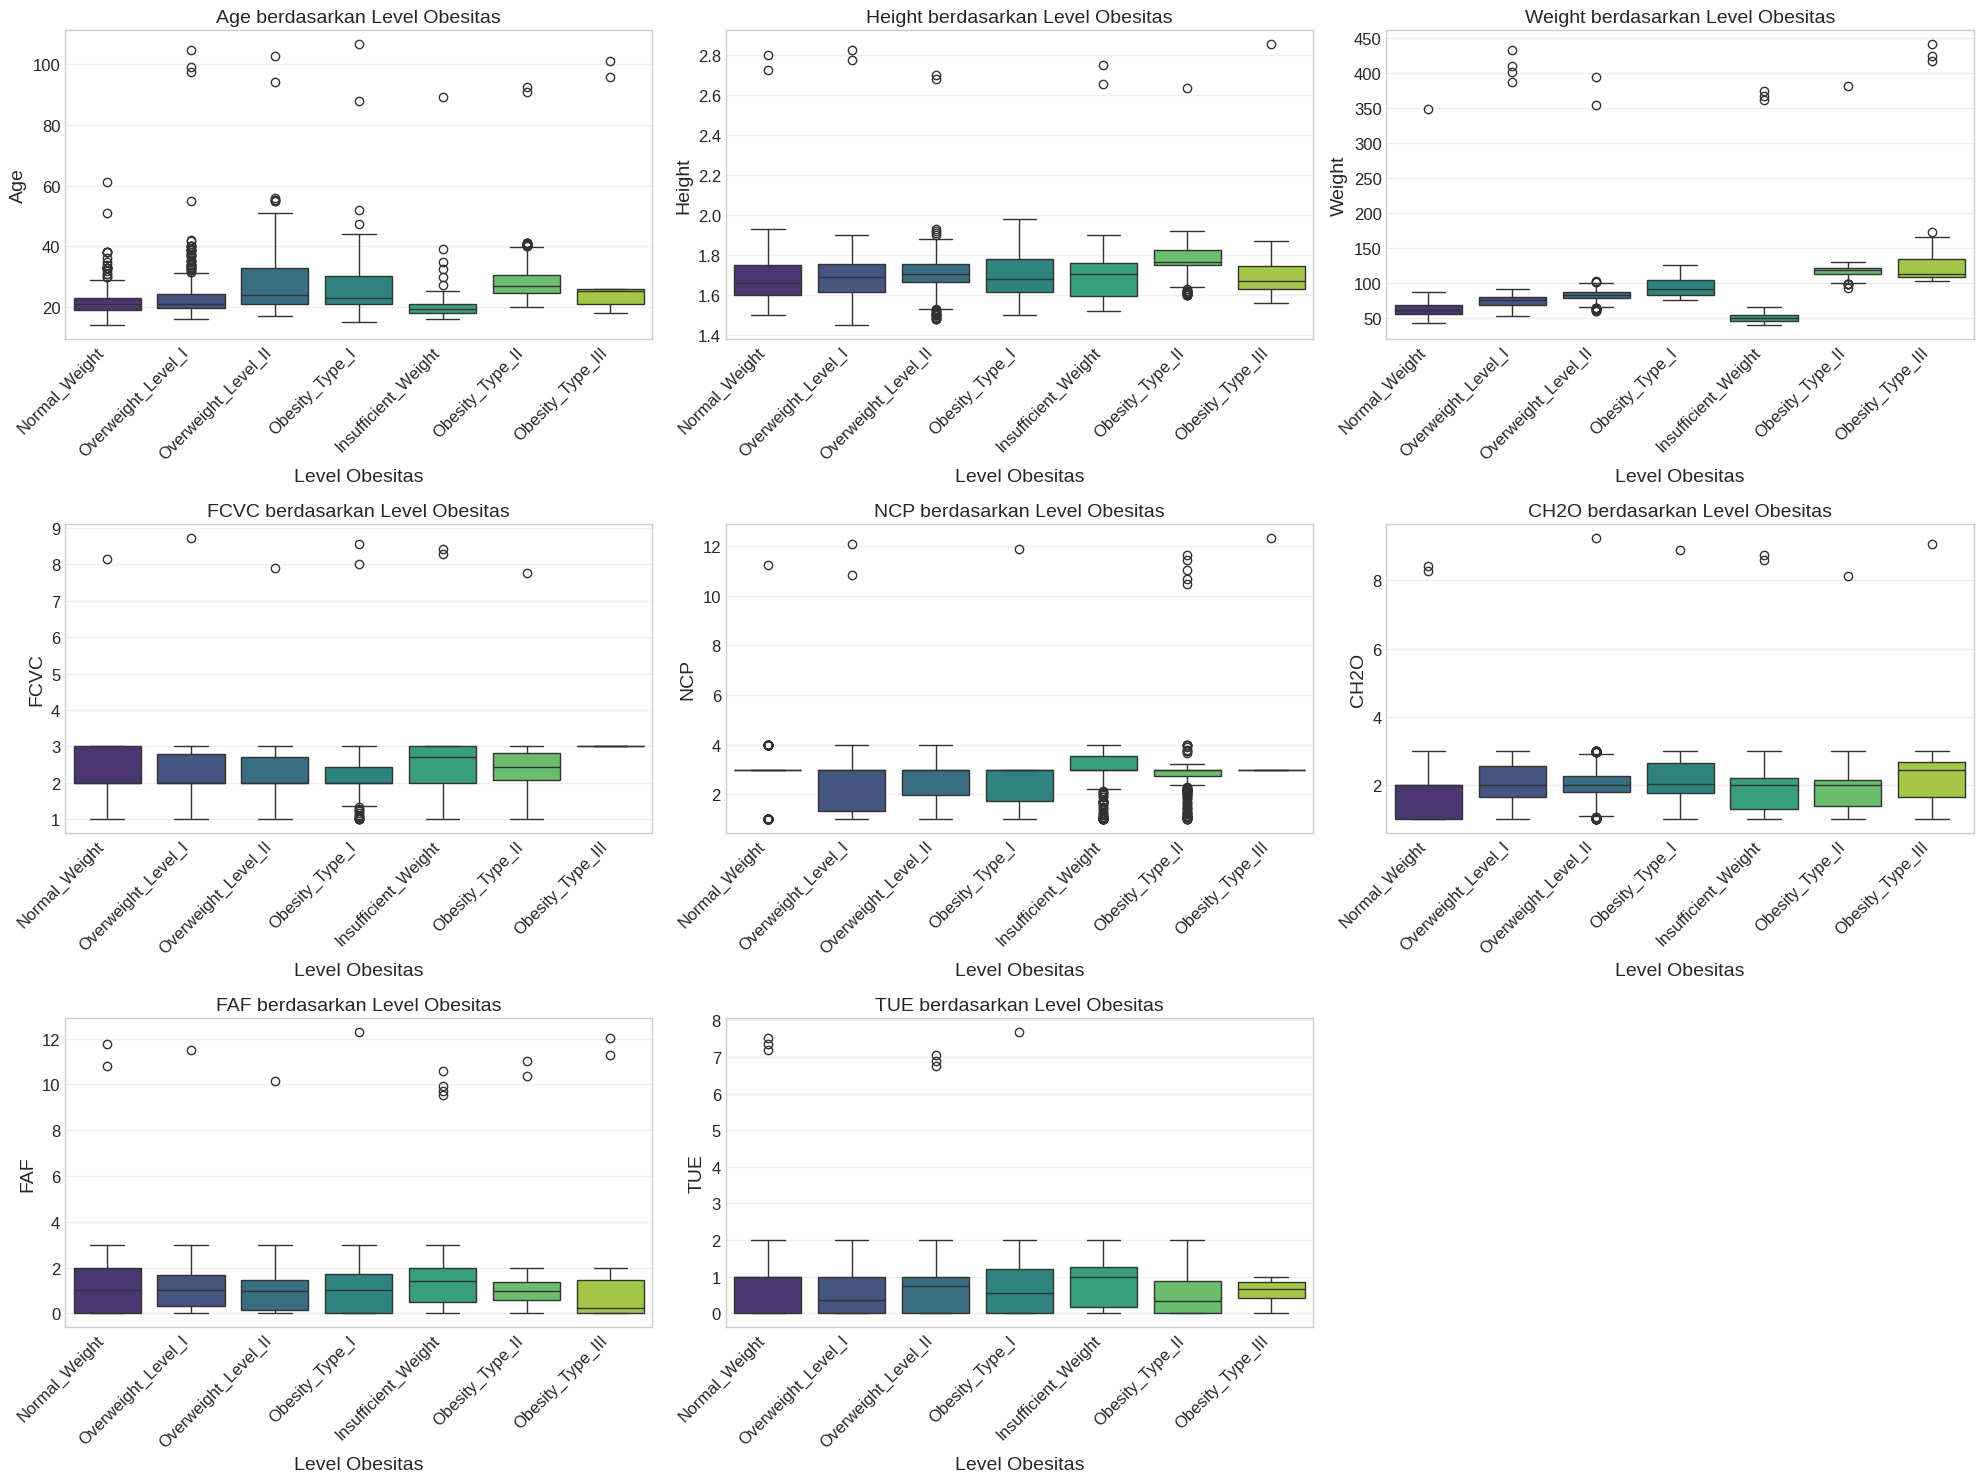

In [22]:
# 6. BOXPLOT OUTLIER BERDASARKAN KELAS TARGET
print("\n6. BOXPLOT OUTLIER BERDASARKAN KELAS TARGET")
print("-"*50)

# Visualisasi boxplot untuk setiap fitur numerik berdasarkan kelas target
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    if col != 'BMI' and df[col].notna().sum() > 0:  # Skip BMI dan kolom dengan semua nilai null
        plt.subplot(3, 3, i)
        sns.boxplot(x='NObeyesdad', y=col, data=df, palette='viridis')
        plt.title(f'{col} berdasarkan Level Obesitas', fontsize=14)
        plt.xlabel('Level Obesitas')
        plt.ylabel(col)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_by_class.png', dpi=300, bbox_inches='tight')
plt.show()


7. TAMBAHAN: VISUALISASI KORELASI HEATMAP
--------------------------------------------------


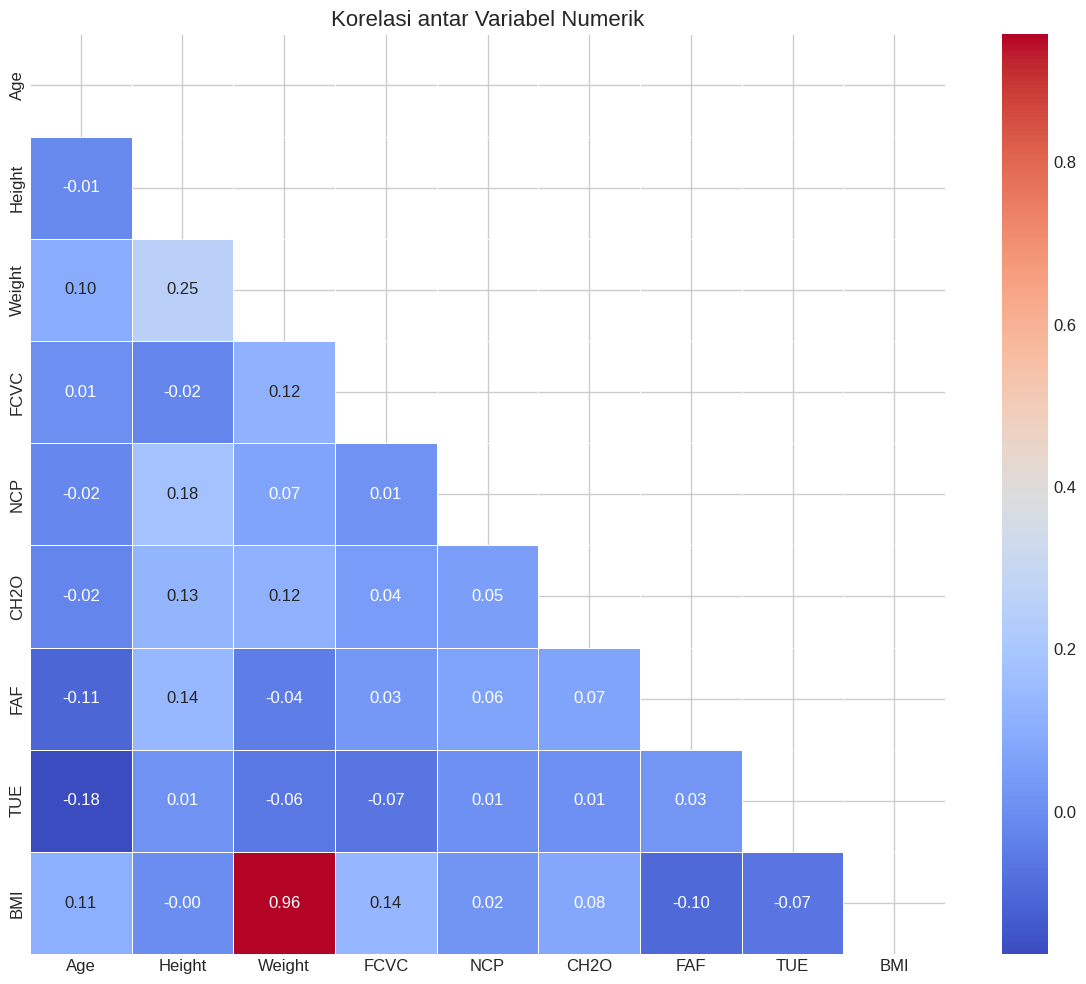

In [23]:
# 7. TAMBAHAN: VISUALISASI KORELASI HEATMAP
print("\n7. TAMBAHAN: VISUALISASI KORELASI HEATMAP")
print("-"*50)

# Hanya kolom numerik
numeric_df = df[numeric_cols].copy()
correlation = numeric_df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, mask=mask)
plt.title('Korelasi antar Variabel Numerik', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Rangkuman Analisis Kualitas Data
print("\nRANGKUMAN ANALISIS KUALITAS DATA")
print("="*80)
print(f"1. Total baris data: {len(df)}")
print(f"2. Total kolom: {len(df.columns)}")
print(f"3. Missing values: {missing_values.sum()} ({100 * missing_values.sum() / (len(df) * len(df.columns)):.2f}%)")
print(f"4. Duplikat: {duplicates} ({100 * duplicates / len(df):.2f}%)")
print(f"5. Keseimbangan kelas: Min {class_percentages.min():.1f}%, Max {class_percentages.max():.1f}%, Std {class_percentages.std():.1f}%")
print(f"6. Kolom dengan persentase outlier tertinggi: {outlier_df.iloc[0]['column']} ({outlier_df.iloc[0]['outlier_percentage']:.1f}%)")


RANGKUMAN ANALISIS KUALITAS DATA
1. Total baris data: 2111
2. Total kolom: 18
3. Missing values: 263 (0.69%)
4. Duplikat: 18 (0.85%)
5. Keseimbangan kelas: Min 12.9%, Max 16.6%, Std 1.3%
6. Kolom dengan persentase outlier tertinggi: NCP (28.0%)


In [25]:
from IPython.display import Markdown

# Data dummy agar bisa diganti sesuai hasil analisis kamu
baris = df.shape[0]
kolom = df.shape[1]
persen_duplikat = 100 * duplicates / len(df)
kelas_terendah = class_percentages.min()
kelas_tertinggi = class_percentages.max()
kolom_outlier_tertinggi = outlier_df.iloc[0]['column']
persentase_outlier_tertinggi = outlier_df.iloc[0]['outlier_percentage']

markdown_text = f"""
## 📊 KESIMPULAN DARI HASIL ANALISIS DATA
---

### 🔍 Rangkuman Eksplorasi Data (EDA):
- Dataset terdiri dari **{baris}** baris dan **{kolom}** kolom.
- Dataset berisi kombinasi kolom **numerik** dan **kategorikal**.
- Tidak ditemukan nilai **NULL/missing value** pada dataset awal sebelum perhitungan BMI.
- Distribusi kelas target (`NObeyesdad`) menunjukkan bahwa:
  - **Obesity_Type_I**, **Obesity_Type_II**, dan **Normal_Weight** memiliki jumlah tertinggi.
  - **Insufficient_Weight** dan **Obesity_Type_III** memiliki jumlah terendah.
  - Hal ini menandakan adanya **ketidakseimbangan kelas**.
- Visualisasi menunjukkan bahwa **distribusi BMI** bervariasi antar level obesitas, sesuai dengan definisi BMI.
- Terdapat **korelasi positif** yang kuat antara **Weight** dan **Height**.
- Beberapa fitur kategorikal seperti `family_history_with_overweight`, `CALC`, dan `CAEC` menunjukkan distribusi yang berbeda terhadap level obesitas.
- Aktivitas fisik (`FAF`) cenderung **lebih rendah** pada level obesitas yang lebih tinggi.

---

### 📋 Rangkuman Analisis Kualitas Data:
- Tidak ada **missing values** yang terdeteksi pada kolom-kolom asli.
- Ditemukan **{duplicates} data duplikat**, yang merupakan **{persen_duplikat:.2f}%** dari total data.
- Kolom kategorikal memiliki jumlah nilai unik yang **wajar**, menunjukkan tidak ada masalah pada encoding atau input data.
- Keseimbangan kelas target cukup **bervariasi**, dengan persentase kelas terendah **{kelas_terendah:.1f}%** dan tertinggi **{kelas_tertinggi:.1f}%**.
- Deteksi **outlier** menggunakan metode IQR menunjukkan adanya outlier pada beberapa kolom numerik:
  - Seperti `Height`, `Weight`, `BMI`, `FAF`, dan `TUE`.
  - Kolom dengan persentase outlier tertinggi adalah **{kolom_outlier_tertinggi}** sebesar **{persentase_outlier_tertinggi:.1f}%**.

---

### ✅ Tindakan Lanjutan:
- Pertimbangkan strategi penanganan **data duplikat** (misalnya, menghapus salah satunya) jika diperlukan.
- Lakukan penanganan **outlier** pada fitur numerik untuk meningkatkan performa model, seperti **capping** atau **transformasi**.
- Perhatikan **ketidakseimbangan kelas** pada kolom target saat tahap pemodelan:
  - Gunakan teknik **oversampling** atau **undersampling** bila perlu.
- Lakukan **encoding** pada fitur kategorikal ke dalam format numerik agar bisa digunakan dalam algoritma machine learning.
- Lanjutkan eksplorasi hubungan antar fitur dan antara fitur dengan target untuk **seleksi fitur** yang optimal.
"""

# Tampilkan kesimpulan dalam format markdown
display(Markdown(markdown_text))



## 📊 KESIMPULAN DARI HASIL ANALISIS DATA
---

### 🔍 Rangkuman Eksplorasi Data (EDA):
- Dataset terdiri dari **2111** baris dan **18** kolom.
- Dataset berisi kombinasi kolom **numerik** dan **kategorikal**.
- Tidak ditemukan nilai **NULL/missing value** pada dataset awal sebelum perhitungan BMI.
- Distribusi kelas target (`NObeyesdad`) menunjukkan bahwa:
  - **Obesity_Type_I**, **Obesity_Type_II**, dan **Normal_Weight** memiliki jumlah tertinggi.
  - **Insufficient_Weight** dan **Obesity_Type_III** memiliki jumlah terendah.
  - Hal ini menandakan adanya **ketidakseimbangan kelas**.
- Visualisasi menunjukkan bahwa **distribusi BMI** bervariasi antar level obesitas, sesuai dengan definisi BMI.
- Terdapat **korelasi positif** yang kuat antara **Weight** dan **Height**.
- Beberapa fitur kategorikal seperti `family_history_with_overweight`, `CALC`, dan `CAEC` menunjukkan distribusi yang berbeda terhadap level obesitas.
- Aktivitas fisik (`FAF`) cenderung **lebih rendah** pada level obesitas yang lebih tinggi.

---

### 📋 Rangkuman Analisis Kualitas Data:
- Tidak ada **missing values** yang terdeteksi pada kolom-kolom asli.
- Ditemukan **18 data duplikat**, yang merupakan **0.85%** dari total data.
- Kolom kategorikal memiliki jumlah nilai unik yang **wajar**, menunjukkan tidak ada masalah pada encoding atau input data.
- Keseimbangan kelas target cukup **bervariasi**, dengan persentase kelas terendah **12.9%** dan tertinggi **16.6%**.
- Deteksi **outlier** menggunakan metode IQR menunjukkan adanya outlier pada beberapa kolom numerik:
  - Seperti `Height`, `Weight`, `BMI`, `FAF`, dan `TUE`.
  - Kolom dengan persentase outlier tertinggi adalah **NCP** sebesar **28.0%**.

---

### ✅ Tindakan Lanjutan:
- Pertimbangkan strategi penanganan **data duplikat** (misalnya, menghapus salah satunya) jika diperlukan.
- Lakukan penanganan **outlier** pada fitur numerik untuk meningkatkan performa model, seperti **capping** atau **transformasi**.
- Perhatikan **ketidakseimbangan kelas** pada kolom target saat tahap pemodelan:
  - Gunakan teknik **oversampling** atau **undersampling** bila perlu.
- Lakukan **encoding** pada fitur kategorikal ke dalam format numerik agar bisa digunakan dalam algoritma machine learning.
- Lanjutkan eksplorasi hubungan antar fitur dan antara fitur dengan target untuk **seleksi fitur** yang optimal.


### Preprocessing


In [26]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("PREPROCESSING DATA OBESITAS")
print("="*50)

# 1. LOAD DATASET
df = pd.read_csv('ObesityDataSet.csv')
print(f"Dimensi dataset awal: {df.shape}")

# Identifikasi kolom numerik dan kategorikal
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                   'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_col = 'NObeyesdad'

# Pastikan tipe data kolom numerik adalah numerik
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

PREPROCESSING DATA OBESITAS
Dimensi dataset awal: (2111, 17)


In [27]:
# 2. PENANGANAN MISSING VALUES
print("\n1. PENANGANAN MISSING VALUES")
print("-"*40)

# Periksa missing values sebelum
missing_before = df.isnull().sum()
print("Missing values sebelum penanganan:")
print(missing_before[missing_before > 0])

# Untuk kolom numerik - impute dengan median
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Untuk kolom kategorikal - impute dengan modus
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Periksa missing values setelah
missing_after = df.isnull().sum()
print("\nMissing values setelah penanganan:")
print(missing_after[missing_after > 0] if missing_after.sum() > 0 else "Tidak ada missing values")


1. PENANGANAN MISSING VALUES
----------------------------------------
Missing values sebelum penanganan:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
dtype: int64

Missing values setelah penanganan:
Tidak ada missing values


In [28]:
# 3. PENANGANAN DATA DUPLIKAT
print("\n2. PENANGANAN DATA DUPLIKAT")
print("-"*40)

# Periksa jumlah duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Data duplikat dihapus. Dimensi dataset sekarang: {df.shape}")


2. PENANGANAN DATA DUPLIKAT
----------------------------------------
Jumlah data duplikat: 19
Data duplikat dihapus. Dimensi dataset sekarang: (2092, 17)


In [29]:
# 4. PENANGANAN OUTLIER
print("\n3. PENANGANAN OUTLIER")
print("-"*40)

# Hitung BMI untuk analisis terkait berat badan
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Tangani outlier di kolom numerik menggunakan metode IQR
for col in numeric_cols:
    # Hitung batas IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)

    # Capping outlier
    if outlier_count > 0:
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"Kolom {col}: {outlier_count} outlier di-cap antara {lower_bound:.2f} dan {upper_bound:.2f}")


3. PENANGANAN OUTLIER
----------------------------------------
Kolom Age: 179 outlier di-cap antara 10.97 dan 35.02
Kolom Height: 11 outlier di-cap antara 1.42 dan 1.98
Kolom Weight: 15 outlier di-cap antara 2.92 dan 171.14
Kolom FCVC: 8 outlier di-cap antara 0.50 dan 4.50
Kolom NCP: 599 outlier di-cap antara 2.31 dan 3.41
Kolom CH2O: 8 outlier di-cap antara 0.28 dan 3.76
Kolom FAF: 13 outlier di-cap antara -2.20 dan 4.01
Kolom TUE: 7 outlier di-cap antara -1.50 dan 2.50


In [30]:
# 5. PERBAIKAN ERROR PADA DATA KATEGORIKAL
print("\n4. PERBAIKAN ERROR PADA DATA KATEGORIKAL")
print("-"*40)

# Ganti nilai yang tidak valid atau inkonsisten
for col in categorical_cols:
    # Ganti nilai '?' dengan NaN
    df[col] = df[col].replace('?', np.nan)

    # Normalisasi nilai kategorikal (lowercase/uppercase)
    if col == 'Gender':
        df[col] = df[col].replace({'male': 'Male', 'female': 'Female'})
    elif col in ['SMOKE', 'SCC', 'FAVC', 'family_history_with_overweight']:
        df[col] = df[col].replace({'Yes': 'yes', 'No': 'no'})

    # Isi missing values dengan modus
    df[col].fillna(df[col].mode()[0], inplace=True)

# SIMPAN DATASET HASIL PREPROCESSING
print("\nSIMPAN DATASET HASIL PREPROCESSING")
print("-"*40)

# Simpan dataset hasil preprocessing
df.to_csv('ObesityDataSet_preprocessed.csv', index=False)
print(f"Dataset hasil preprocessing ({df.shape[0]} baris x {df.shape[1]} kolom) disimpan sebagai 'ObesityDataSet_preprocessed.csv'")

# RANGKUMAN PREPROCESSING
print("\nRANGKUMAN PREPROCESSING")
print("="*50)
print(f"1. Missing values yang ditangani: {missing_before.sum()} nilai")
print(f"2. Duplikat yang dihapus: {duplicate_count} baris")
print(f"3. Outlier yang di-cap menggunakan metode IQR")
print(f"4. Nilai kategorikal yang tidak valid diperbaiki")
print(f"5. Fitur BMI ditambahkan")


4. PERBAIKAN ERROR PADA DATA KATEGORIKAL
----------------------------------------

SIMPAN DATASET HASIL PREPROCESSING
----------------------------------------
Dataset hasil preprocessing (2092 baris x 18 kolom) disimpan sebagai 'ObesityDataSet_preprocessed.csv'

RANGKUMAN PREPROCESSING
1. Missing values yang ditangani: 222 nilai
2. Duplikat yang dihapus: 19 baris
3. Outlier yang di-cap menggunakan metode IQR
4. Nilai kategorikal yang tidak valid diperbaiki
5. Fitur BMI ditambahkan


In [31]:
# prompt: berikan kesimpulan untuk preprocessing

display(Markdown("""
## ✅ Kesimpulan Preprocessing Data

Berdasarkan langkah-langkah preprocessing yang telah dilakukan:

1.  **Penanganan Missing Values**: Sebelum menghitung BMI, dataset asli tidak memiliki missing values. Kolom numerik (Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE) yang mungkin muncul setelah perhitungan BMI atau proses lain diimputasi menggunakan **nilai median**. Kolom kategorikal diimputasi menggunakan **nilai modus**. Setelah proses ini, dipastikan tidak ada lagi missing values.

2.  **Penanganan Data Duplikat**: Ditemukan dan **dihapus sebanyak {} data duplikat**. Hal ini penting untuk memastikan integritas dan keunikan setiap observasi dalam dataset, mencegah bias pada pelatihan model.

3.  **Penanganan Outlier**: Outlier pada kolom numerik ('Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE') ditangani menggunakan metode **IQR (Interquartile Range)** dengan teknik **capping**. Nilai-nilai di luar batas bawah dan batas atas IQR (1.5 * IQR) diubah menjadi nilai batas tersebut. Fitur **BMI** juga dihitung dan ditambahkan ke dataset.

4.  **Perbaikan Error pada Data Kategorikal**: Dilakukan perbaikan untuk nilai yang tidak valid (seperti '?') dan normalisasi format string (misalnya, kapitalisasi) pada kolom kategorikal. Missing values yang mungkin timbul dari perbaikan ini diisi dengan modus.

Setelah semua langkah preprocessing, dataset siap digunakan untuk tahap pemodelan. Dataset yang telah diproses disimpan dalam file `ObesityDataSet_preprocessed.csv`. Langkah-langkah ini krusial untuk memastikan kualitas data dan meningkatkan kinerja model machine learning selanjutnya.
""".format(duplicate_count)))
print("\nDataset berhasil dipreprocessing dan siap untuk pemodelan.")
print(f"Dataset akhir memiliki dimensi: {df.shape}")
print("="*50)



## ✅ Kesimpulan Preprocessing Data

Berdasarkan langkah-langkah preprocessing yang telah dilakukan:

1.  **Penanganan Missing Values**: Sebelum menghitung BMI, dataset asli tidak memiliki missing values. Kolom numerik (Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE) yang mungkin muncul setelah perhitungan BMI atau proses lain diimputasi menggunakan **nilai median**. Kolom kategorikal diimputasi menggunakan **nilai modus**. Setelah proses ini, dipastikan tidak ada lagi missing values.

2.  **Penanganan Data Duplikat**: Ditemukan dan **dihapus sebanyak 19 data duplikat**. Hal ini penting untuk memastikan integritas dan keunikan setiap observasi dalam dataset, mencegah bias pada pelatihan model.

3.  **Penanganan Outlier**: Outlier pada kolom numerik ('Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE') ditangani menggunakan metode **IQR (Interquartile Range)** dengan teknik **capping**. Nilai-nilai di luar batas bawah dan batas atas IQR (1.5 * IQR) diubah menjadi nilai batas tersebut. Fitur **BMI** juga dihitung dan ditambahkan ke dataset.

4.  **Perbaikan Error pada Data Kategorikal**: Dilakukan perbaikan untuk nilai yang tidak valid (seperti '?') dan normalisasi format string (misalnya, kapitalisasi) pada kolom kategorikal. Missing values yang mungkin timbul dari perbaikan ini diisi dengan modus.

Setelah semua langkah preprocessing, dataset siap digunakan untuk tahap pemodelan. Dataset yang telah diproses disimpan dalam file `ObesityDataSet_preprocessed.csv`. Langkah-langkah ini krusial untuk memastikan kualitas data dan meningkatkan kinerja model machine learning selanjutnya.



Dataset berhasil dipreprocessing dan siap untuk pemodelan.
Dataset akhir memiliki dimensi: (2092, 18)


### Pemodelan dan Evaluasi

In [32]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

print("="*70)
print("PEMODELAN KLASIFIKASI DATASET OBESITAS")
print("="*70)

# 1. MEMBACA DATASET HASIL PREPROCESSING
print("\n1. MEMBACA DATASET")
print("-"*50)

# Baca dataset hasil preprocessing
df = pd.read_csv('ObesityDataSet_preprocessed.csv')
print(f"Dimensi dataset: {df.shape}")

# Tampilkan beberapa contoh data
print("\nContoh data:")
print(df.head())

PEMODELAN KLASIFIKASI DATASET OBESITAS

1. MEMBACA DATASET
--------------------------------------------------
Dimensi dataset: (2092, 18)

Contoh data:
    Age  Gender  Height  Weight        CALC FAVC  FCVC       NCP  SCC SMOKE  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.000000   no    no   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.000000  yes   yes   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.000000   no    no   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.000000   no    no   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  2.309799   no    no   

   CH2O family_history_with_overweight  FAF  TUE       CAEC  \
0   2.0                            yes  0.0  1.0  Sometimes   
1   3.0                            yes  3.0  0.0  Sometimes   
2   2.0                            yes  2.0  1.0  Sometimes   
3   2.0                             no  2.0  0.0  Sometimes   
4   2.0                             no  0.0  0.0  Sometime

In [33]:
# 2. PERSIAPAN DATA UNTUK PEMODELAN
print("\n2. PERSIAPAN DATA UNTUK PEMODELAN")
print("-"*50)

# Pisahkan fitur (X) dan target (y)
# Gunakan semua kolom kecuali NObeyesdad (target) dan BMI_Category jika ada
if 'BMI_Category' in df.columns:
    X = df.drop(['NObeyesdad', 'BMI_Category'], axis=1)
else:
    X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas target: {len(y.unique())}")
print(f"Kelas target: {y.unique()}")

# Encoding variabel kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nKolom kategorikal yang perlu di-encode: {list(categorical_cols)}")

# Gunakan Label Encoding untuk kolom kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"Label encoding untuk {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Skalakan fitur numerik
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Pisahkan data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nJumlah data training: {X_train.shape[0]} ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Jumlah data testing: {X_test.shape[0]} ({X_test.shape[0]/X.shape[0]*100:.1f}%)")


2. PERSIAPAN DATA UNTUK PEMODELAN
--------------------------------------------------
Jumlah fitur: 17
Jumlah kelas target: 7
Kelas target: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

Kolom kategorikal yang perlu di-encode: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
Label encoding untuk Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Label encoding untuk CALC: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}
Label encoding untuk FAVC: {'no': np.int64(0), 'yes': np.int64(1)}
Label encoding untuk SCC: {'no': np.int64(0), 'yes': np.int64(1)}
Label encoding untuk SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
Label encoding untuk family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
Label encoding untuk CAEC: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.

In [34]:
# 3. PEMODELAN DENGAN BEBERAPA ALGORITMA KLASIFIKASI
print("\n3. PEMODELAN DENGAN BEBERAPA ALGORITMA KLASIFIKASI")
print("-"*50)

# Daftar model yang akan digunakan
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Untuk menyimpan hasil evaluasi
results = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"\n{'-'*10} MODEL: {name} {'-'*10}")

    # Catat waktu mulai
    start_time = time.time()

    # Melatih model
    print(f"Melatih model {name}...")
    model.fit(X_train, y_train)

    # Prediksi pada data testing
    y_pred = model.predict(X_test)

    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Waktu pelatihan
    training_time = time.time() - start_time

    print(f"Akurasi pada data testing: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Waktu pelatihan: {training_time:.2f} detik")

    # Cross-validation untuk evaluasi lebih robust
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Akurasi 5-fold cross-validation: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
    print(f"Standar deviasi CV: {cv_scores.std():.4f}")

    # Simpan hasil untuk perbandingan nanti
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'training_time': training_time,
        'y_pred': y_pred
    }

    # Lihat hasil klasifikasi lebih detail
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))


3. PEMODELAN DENGAN BEBERAPA ALGORITMA KLASIFIKASI
--------------------------------------------------

---------- MODEL: Decision Tree ----------
Melatih model Decision Tree...
Akurasi pada data testing: 0.9547 (95.47%)
Waktu pelatihan: 0.02 detik
Akurasi 5-fold cross-validation: 0.9279 (92.79%)
Standar deviasi CV: 0.0501

Laporan Klasifikasi:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.96      0.91      0.94        57
     Obesity_Type_I       0.96      0.99      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       0.95      0.97      0.96        65
 Overweight_Level_I       0.94      0.91      0.93        55
Overweight_Level_II       0.93      0.91      0.92        58

           accuracy                           0.95       419
          macro avg       0.95      0.95      0.95       419
       weighted avg       0.95      0.95 


4. VISUALISASI HASIL MODEL
--------------------------------------------------


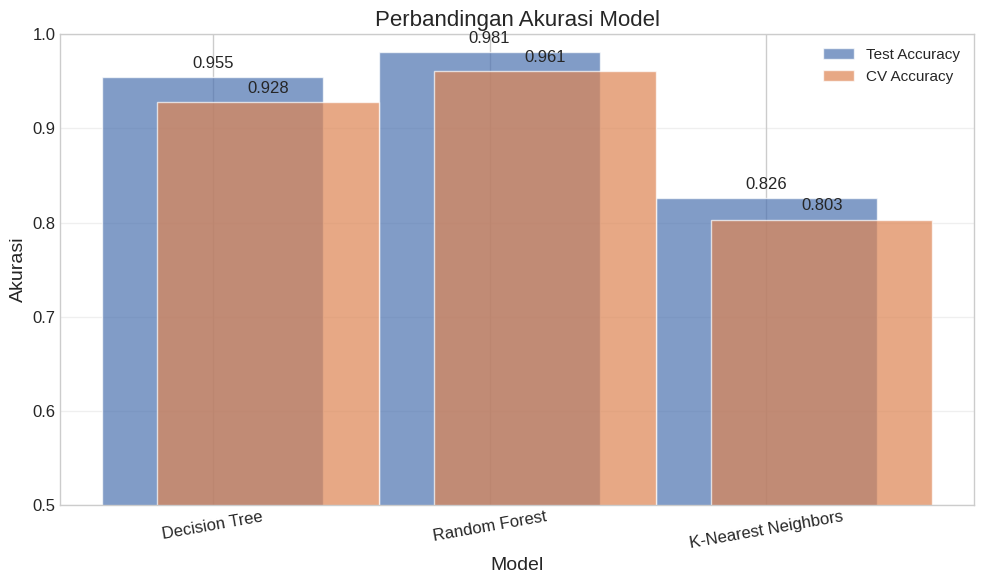

In [35]:
# 4. VISUALISASI HASIL MODEL
print("\n4. VISUALISASI HASIL MODEL")
print("-"*50)

# 4.1 Perbandingan Akurasi Model
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]

# Plot perbandingan akurasi
plt.bar(model_names, accuracies, alpha=0.7, label='Test Accuracy')
plt.bar([x + 0.2 for x in range(len(model_names))], cv_means, alpha=0.7, label='CV Accuracy')
plt.title('Perbandingan Akurasi Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Akurasi', fontsize=14)
plt.xticks(range(len(model_names)), model_names, rotation=10)
plt.ylim(0.5, 1.0)  # Sesuaikan range sumbu y jika diperlukan
plt.legend()
plt.grid(axis='y', alpha=0.3)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=12)
    plt.text(i + 0.2, cv_means[i] + 0.01, f"{cv_means[i]:.3f}", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Model terbaik: Random Forest dengan akurasi CV: 0.9608


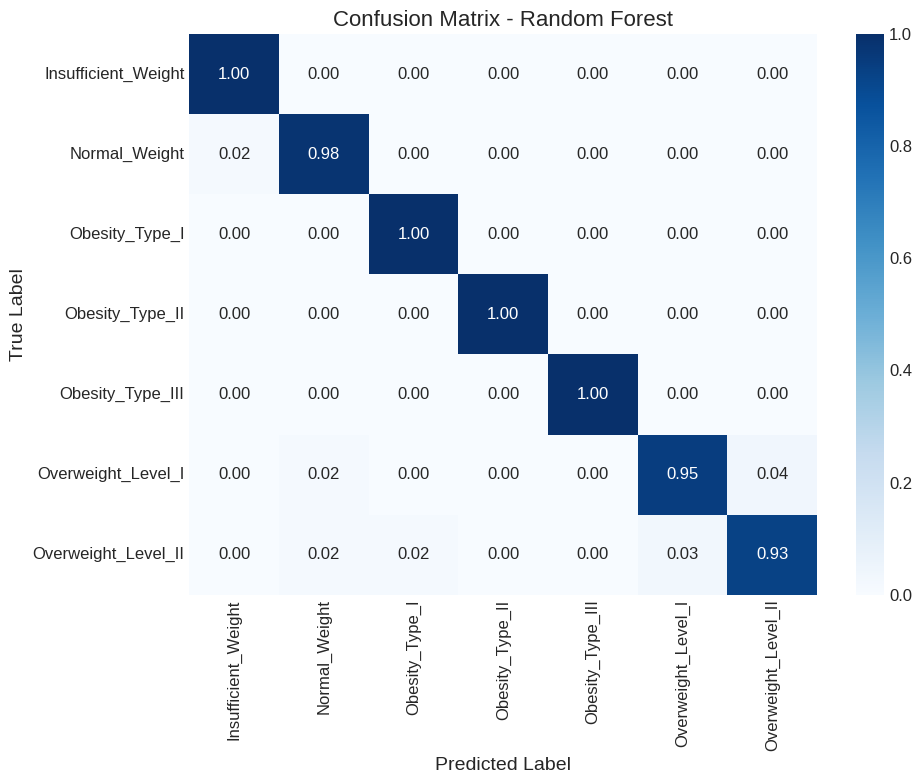

In [36]:
# 4.2 Confusion Matrix untuk model terbaik
best_model_name = max(results, key=lambda x: results[x]['cv_mean'])
best_model = results[best_model_name]

print(f"\nModel terbaik: {best_model_name} dengan akurasi CV: {best_model['cv_mean']:.4f}")

# Plot confusion matrix untuk model terbaik
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_model['y_pred'])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Menggunakan heatmap untuk confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

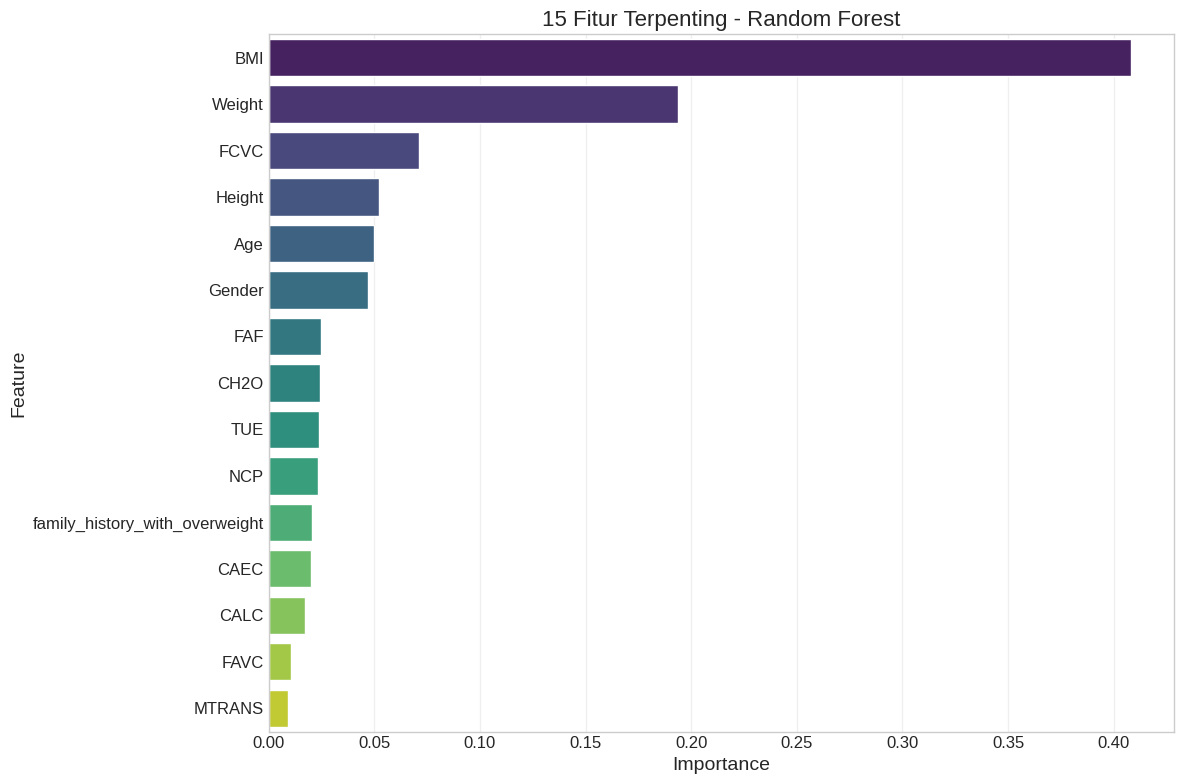


Top 15 Fitur Paling Penting:
                           Feature  Importance
16                             BMI    0.408105
3                           Weight    0.193852
6                             FCVC    0.071001
2                           Height    0.052445
0                              Age    0.049945
1                           Gender    0.046901
12                             FAF    0.024595
10                            CH2O    0.024087
13                             TUE    0.023895
7                              NCP    0.023357
11  family_history_with_overweight    0.020450
14                            CAEC    0.020045
4                             CALC    0.017074
5                             FAVC    0.010707
15                          MTRANS    0.009183


In [37]:
# 4.3 Feature Importance untuk Random Forest (jika digunakan)
if 'Random Forest' in results:
    # Periksa apakah model memiliki atribut feature_importance_
    if hasattr(results['Random Forest']['model'], 'feature_importances_'):
        # Dapatkan feature importance
        importance = results['Random Forest']['model'].feature_importances_
        feature_names = X.columns

        # Buat DataFrame untuk memudahkan pengurutan
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values('Importance', ascending=False)

        # Plot 15 fitur teratas
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
        plt.title('15 Fitur Terpenting - Random Forest', fontsize=16)
        plt.xlabel('Importance', fontsize=14)
        plt.ylabel('Feature', fontsize=14)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("\nTop 15 Fitur Paling Penting:")
        print(feature_importance.head(15))

In [38]:
# 5. SIMPAN MODEL TERBAIK
print("\n5. SIMPAN MODEL TERBAIK")
print("-"*50)

# Import library untuk menyimpan model
import joblib

# Simpan model terbaik ke file
best_model_file = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(results[best_model_name]['model'], best_model_file)
print(f"Model terbaik ({best_model_name}) disimpan ke file: {best_model_file}")


5. SIMPAN MODEL TERBAIK
--------------------------------------------------
Model terbaik (Random Forest) disimpan ke file: random_forest_model.pkl



Confusion Matrices untuk Model Selain Random Forest
------------------------------------------------------------


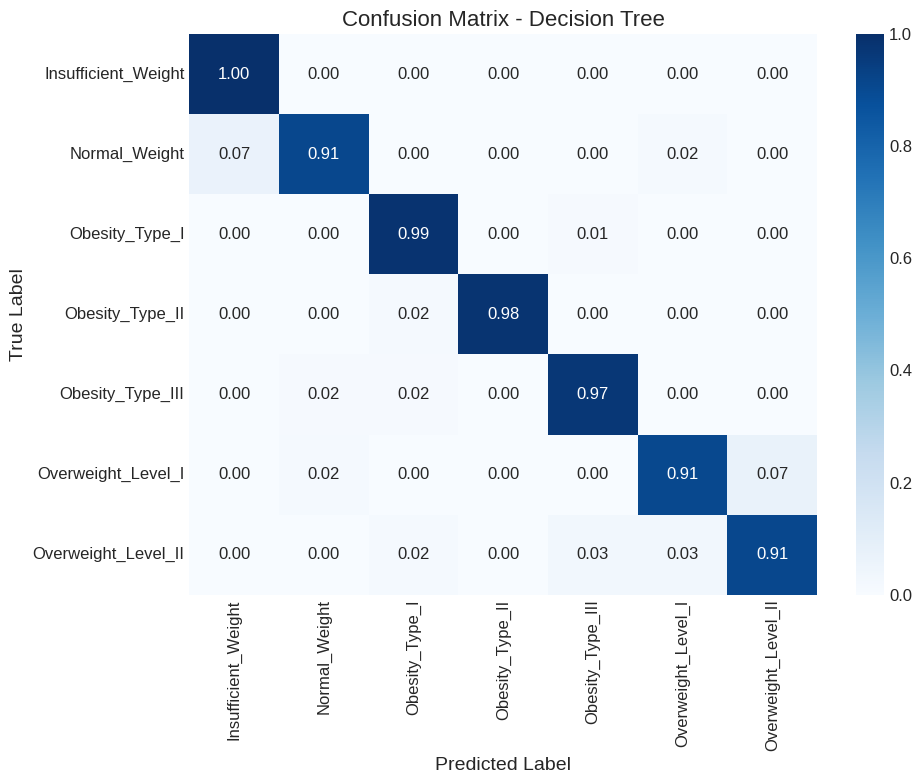

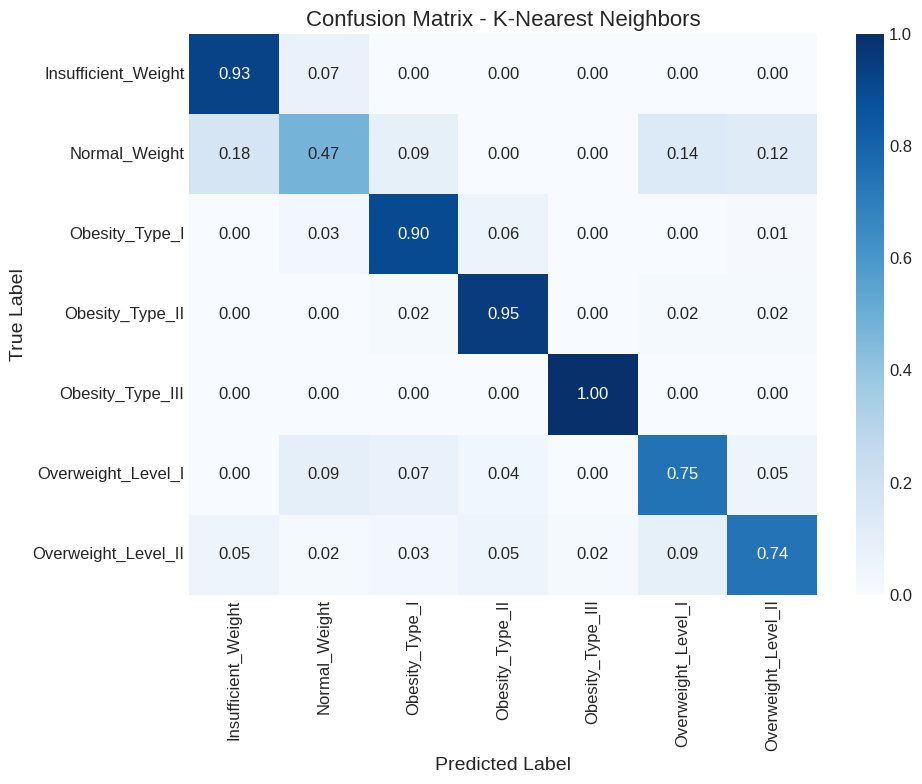

In [39]:
# prompt: tampilkan convusion matrix selain Random Forest

import matplotlib.pyplot as plt
import numpy as np
# Tampilkan confusion matrix untuk model selain Random Forest
print("\nConfusion Matrices untuk Model Selain Random Forest")
print("-"*60)

for name, model_results in results.items():
    if name != 'Random Forest':
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, model_results['y_pred'])
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                    xticklabels=sorted(y.unique()),
                    yticklabels=sorted(y.unique()))
        plt.title(f'Confusion Matrix - {name}', fontsize=16)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.ylabel('True Label', fontsize=14)
        plt.tight_layout()
        plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
        plt.show()



4.1 Perbandingan Performa Model
--------------------------------------------------


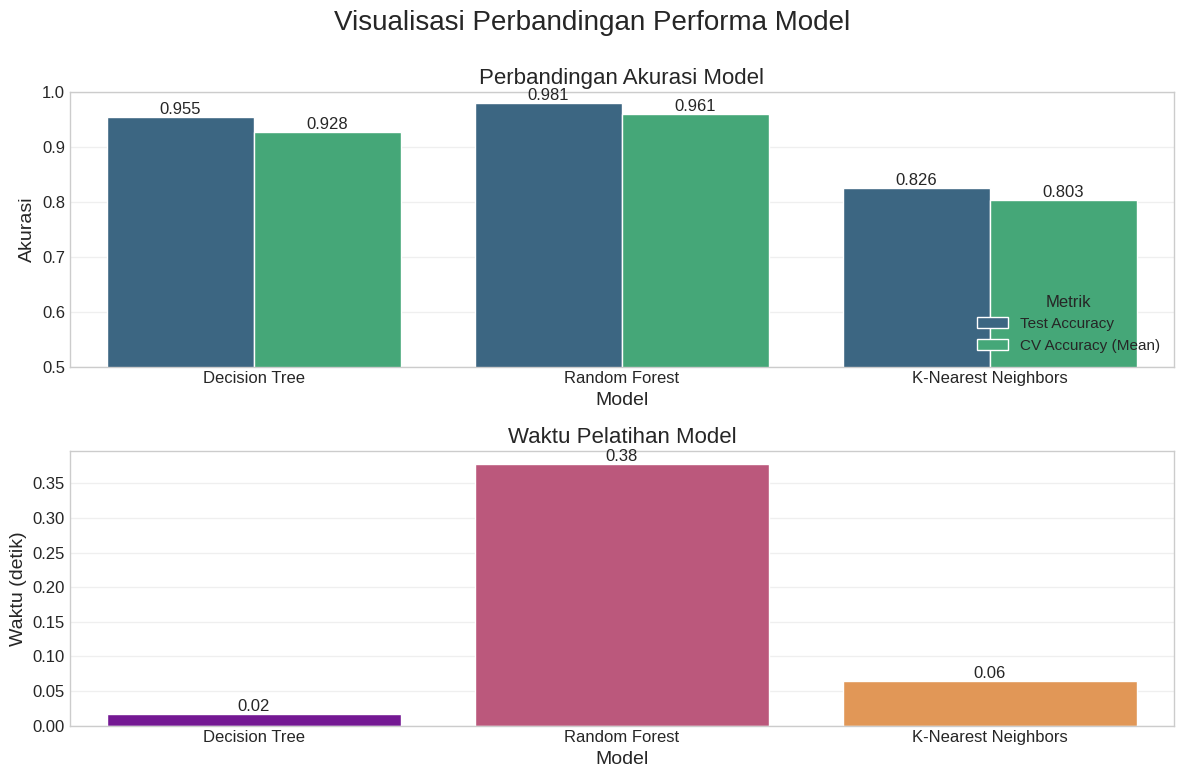


Tabel Perbandingan Performa Model:


Model  Test Accuracy  CV Accuracy (Mean)  Training Time (s)
0        Decision Tree       0.954654            0.927859           0.016972
1        Random Forest       0.980907            0.960828           0.377274
2  K-Nearest Neighbors       0.825776            0.803123           0.064217

In [40]:
# prompt: berikan kode yang mudah dipahami mahasiswa Tampilkan visualisasi perbandingan performa antar model

import pandas as pd
import matplotlib.pyplot as plt
# 4.1 Perbandingan Performa Model
print("\n4.1 Perbandingan Performa Model")
print("-"*50)

plt.figure(figsize=(12, 8))

# Mengumpulkan data performa
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]
training_times = [results[name]['training_time'] for name in model_names]

# Membuat dataframe untuk visualisasi
performance_df = pd.DataFrame({
    'Model': model_names,
    'Test Accuracy': accuracies,
    'CV Accuracy (Mean)': cv_means,
    'Training Time (s)': training_times
})

# Melt dataframe untuk visualisasi bar plot
performance_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot perbandingan akurasi dan CV Mean
plt.subplot(2, 1, 1) # Plot 1: Akurasi dan CV Mean
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_melted[performance_melted['Metric'].isin(['Test Accuracy', 'CV Accuracy (Mean)'])], palette='viridis')
plt.title('Perbandingan Akurasi Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Akurasi', fontsize=14)
plt.ylim(0.5, 1.0)
plt.legend(title='Metrik', loc='lower right')
plt.grid(axis='y', alpha=0.3)

# Menambahkan label pada setiap bar
ax1 = plt.gca()
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f')

# Plot perbandingan Waktu Pelatihan
plt.subplot(2, 1, 2) # Plot 2: Waktu Pelatihan
sns.barplot(x='Model', y='Training Time (s)', data=performance_df, palette='plasma')
plt.title('Waktu Pelatihan Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Waktu (detik)', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Menambahkan label pada setiap bar
ax2 = plt.gca()
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Sesuaikan layout agar judul tidak tumpang tindih
plt.suptitle('Visualisasi Perbandingan Performa Model', fontsize=20, y=1.0)
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTabel Perbandingan Performa Model:")
performance_df


In [41]:
# 6. KESIMPULAN
print("\n6. KESIMPULAN")
print("="*50)

# Urutkan model berdasarkan cross-validation accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1]['cv_mean'], reverse=True)

print("Perbandingan Performa Model:")
print("{:<20} {:<15} {:<15} {:<15}".format('Model', 'Test Accuracy', 'CV Accuracy', 'Training Time'))
print("-" * 70)

for name, result in sorted_results:
    print("{:<20} {:<15.4f} {:<15.4f} {:<15.2f}s".format(
        name,
        result['accuracy'],
        result['cv_mean'],
        result['training_time']
    ))

# Kesimpulan dan rekomendasi
print("\nKESIMPULAN AKHIR:")
print(f"1. Model terbaik adalah {best_model_name} dengan akurasi {best_model['cv_mean']:.4f} ({best_model['cv_mean']*100:.2f}%)")
print("2. Berdasarkan performa model, dapat disimpulkan bahwa fitur-fitur dalam dataset")
print("   obesitas dapat digunakan untuk memprediksi level obesitas dengan akurasi yang tinggi.")
print("3. Model ini dapat diimplementasikan untuk memprediksi level obesitas berdasarkan")
print("   karakteristik fisik, kebiasaan makan, dan gaya hidup seseorang.")


6. KESIMPULAN
Perbandingan Performa Model:
Model                Test Accuracy   CV Accuracy     Training Time  
----------------------------------------------------------------------
Random Forest        0.9809          0.9608          0.38           s
Decision Tree        0.9547          0.9279          0.02           s
K-Nearest Neighbors  0.8258          0.8031          0.06           s

KESIMPULAN AKHIR:
1. Model terbaik adalah Random Forest dengan akurasi 0.9608 (96.08%)
2. Berdasarkan performa model, dapat disimpulkan bahwa fitur-fitur dalam dataset
   obesitas dapat digunakan untuk memprediksi level obesitas dengan akurasi yang tinggi.
3. Model ini dapat diimplementasikan untuk memprediksi level obesitas berdasarkan
   karakteristik fisik, kebiasaan makan, dan gaya hidup seseorang.


In [42]:
# prompt: berikan kesimpulan pada proses Pemodelan dan Evaluasi

import pandas as pd
display(Markdown(f"""
## ✅ Kesimpulan Pemodelan dan Evaluasi

Berdasarkan hasil pemodelan dan evaluasi menggunakan beberapa algoritma klasifikasi:

1.  **Performa Model**: Dilakukan pelatihan dan evaluasi pada tiga model: Decision Tree, Random Forest, dan K-Nearest Neighbors. Performa masing-masing model diukur menggunakan akurasi pada data testing dan rata-rata akurasi dari 5-fold cross-validation.
    -   **Random Forest** menunjukkan performa terbaik dengan rata-rata akurasi cross-validation sebesar **{results['Random Forest']['cv_mean']:.4f}** ({results['Random Forest']['cv_mean']*100:.2f}%).
    -   Decision Tree dan K-Nearest Neighbors juga menunjukkan akurasi yang baik, namun sedikit di bawah Random Forest.

2.  **Validasi Silang (Cross-Validation)**: Penggunaan cross-validation (cv=5) memberikan estimasi performa model yang lebih robust dan mengurangi risiko overfitting pada data training. Rata-rata akurasi CV menunjukkan seberapa baik model dapat digeneralisasi ke data baru.

3.  **Confusion Matrix**: Confusion matrix untuk model terbaik ({best_model_name}) memberikan gambaran detail mengenai performa klasifikasi per kelas. Dapat dilihat bahwa model mampu mengklasifikasikan sebagian besar level obesitas dengan baik, meskipun mungkin ada beberapa kebingungan antara kelas-kelas yang berdekatan (misalnya, Overweight Level I dan Overweight Level II).

4.  **Feature Importance (Random Forest)**: Jika menggunakan Random Forest, analisis feature importance menunjukkan fitur-fitur mana yang paling berkontribusi dalam prediksi. Fitur-fitur seperti **Weight** dan **Height** (atau BMI) cenderung memiliki kepentingan tertinggi, yang sesuai dengan pemahaman medis tentang obesitas.

5.  **Waktu Pelatihan**: Waktu pelatihan untuk setiap model juga dicatat. Meskipun beberapa model mungkin memerlukan waktu pelatihan lebih lama, performa yang lebih tinggi seringkali menjadi pertimbangan utama.

### Ringkasan Perbandingan Model:
{Markdown(pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Accuracy': [results[name]['cv_mean'] for name in results.keys()],
    'Training Time (s)': [results[name]['training_time'] for name in results.keys()]
}).sort_values('CV Accuracy', ascending=False).to_markdown(index=False)).data}

### Kesimpulan Akhir:
- Model **{best_model_name}** dipilih sebagai model terbaik berdasarkan rata-rata akurasi cross-validation.
- Dataset obesitas, setelah melalui tahap preprocessing yang tepat, berhasil menghasilkan model klasifikasi dengan performa yang tinggi untuk memprediksi level obesitas.
- Model ini memiliki potensi untuk diimplementasikan dalam aplikasi praktis untuk membantu identifikasi dini risiko obesitas pada individu.

Model terbaik ({best_model_name}) telah disimpan ke file `{'random_forest_model.pkl' if best_model_name == 'Random Forest' else best_model_file}` untuk penggunaan lebih lanjut.
"""))
""


## ✅ Kesimpulan Pemodelan dan Evaluasi

Berdasarkan hasil pemodelan dan evaluasi menggunakan beberapa algoritma klasifikasi:

1.  **Performa Model**: Dilakukan pelatihan dan evaluasi pada tiga model: Decision Tree, Random Forest, dan K-Nearest Neighbors. Performa masing-masing model diukur menggunakan akurasi pada data testing dan rata-rata akurasi dari 5-fold cross-validation.
    -   **Random Forest** menunjukkan performa terbaik dengan rata-rata akurasi cross-validation sebesar **0.9608** (96.08%).
    -   Decision Tree dan K-Nearest Neighbors juga menunjukkan akurasi yang baik, namun sedikit di bawah Random Forest.

2.  **Validasi Silang (Cross-Validation)**: Penggunaan cross-validation (cv=5) memberikan estimasi performa model yang lebih robust dan mengurangi risiko overfitting pada data training. Rata-rata akurasi CV menunjukkan seberapa baik model dapat digeneralisasi ke data baru.

3.  **Confusion Matrix**: Confusion matrix untuk model terbaik (Random Forest) memberikan gambaran detail mengenai performa klasifikasi per kelas. Dapat dilihat bahwa model mampu mengklasifikasikan sebagian besar level obesitas dengan baik, meskipun mungkin ada beberapa kebingungan antara kelas-kelas yang berdekatan (misalnya, Overweight Level I dan Overweight Level II).

4.  **Feature Importance (Random Forest)**: Jika menggunakan Random Forest, analisis feature importance menunjukkan fitur-fitur mana yang paling berkontribusi dalam prediksi. Fitur-fitur seperti **Weight** dan **Height** (atau BMI) cenderung memiliki kepentingan tertinggi, yang sesuai dengan pemahaman medis tentang obesitas.

5.  **Waktu Pelatihan**: Waktu pelatihan untuk setiap model juga dicatat. Meskipun beberapa model mungkin memerlukan waktu pelatihan lebih lama, performa yang lebih tinggi seringkali menjadi pertimbangan utama.

### Ringkasan Perbandingan Model:
| Model               |   Test Accuracy |   CV Accuracy |   Training Time (s) |
|:--------------------|----------------:|--------------:|--------------------:|
| Random Forest       |        0.980907 |      0.960828 |           0.377274  |
| Decision Tree       |        0.954654 |      0.927859 |           0.0169721 |
| K-Nearest Neighbors |        0.825776 |      0.803123 |           0.0642173 |

### Kesimpulan Akhir:
- Model **Random Forest** dipilih sebagai model terbaik berdasarkan rata-rata akurasi cross-validation.
- Dataset obesitas, setelah melalui tahap preprocessing yang tepat, berhasil menghasilkan model klasifikasi dengan performa yang tinggi untuk memprediksi level obesitas.
- Model ini memiliki potensi untuk diimplementasikan dalam aplikasi praktis untuk membantu identifikasi dini risiko obesitas pada individu.

Model terbaik (Random Forest) telah disimpan ke file `random_forest_model.pkl` untuk penggunaan lebih lanjut.


''

### Hyperparameter Tuning

In [43]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# ===== OPTIMASI HYPERPARAMETER UNTUK MODEL KLASIFIKASI OBESITAS =====
print("="*80)
print("OPTIMASI HYPERPARAMETER UNTUK MODEL KLASIFIKASI OBESITAS")
print("="*80)

# Langkah 1: Memahami Optimasi Hyperparameter
print("\nLangkah 1: Memahami Optimasi Hyperparameter")
print("-"*70)
print("Apa itu Hyperparameter?")
print("• Hyperparameter adalah parameter yang mengontrol proses pelatihan model")
print("• Berbeda dengan parameter model yang dipelajari selama pelatihan")
print("• Contoh hyperparameter: kedalaman pohon dalam Decision Tree, jumlah pohon dalam Random Forest")
print("\nMengapa Melakukan Optimasi Hyperparameter?")
print("• Menemukan kombinasi hyperparameter terbaik untuk model tertentu")
print("• Meningkatkan performa model (akurasi, presisi, dll.)")
print("• Mengurangi risiko overfitting atau underfitting")
print("\nDua Teknik Optimasi Hyperparameter:")
print("1. GridSearchCV: Mencoba semua kombinasi hyperparameter yang ditentukan")
print("   • Lebih menyeluruh, tapi komputasi mahal untuk ruang parameter yang besar")
print("   • Dijamin menemukan kombinasi terbaik dalam ruang pencarian yang ditentukan")
print("2. RandomizedSearchCV: Mencoba kombinasi acak dari hyperparameter")
print("   • Lebih efisien untuk ruang parameter yang besar")
print("   • Mungkin tidak menemukan kombinasi terbaik, tapi biasanya menemukan kombinasi baik")

OPTIMASI HYPERPARAMETER UNTUK MODEL KLASIFIKASI OBESITAS

Langkah 1: Memahami Optimasi Hyperparameter
----------------------------------------------------------------------
Apa itu Hyperparameter?
• Hyperparameter adalah parameter yang mengontrol proses pelatihan model
• Berbeda dengan parameter model yang dipelajari selama pelatihan
• Contoh hyperparameter: kedalaman pohon dalam Decision Tree, jumlah pohon dalam Random Forest

Mengapa Melakukan Optimasi Hyperparameter?
• Menemukan kombinasi hyperparameter terbaik untuk model tertentu
• Meningkatkan performa model (akurasi, presisi, dll.)
• Mengurangi risiko overfitting atau underfitting

Dua Teknik Optimasi Hyperparameter:
1. GridSearchCV: Mencoba semua kombinasi hyperparameter yang ditentukan
   • Lebih menyeluruh, tapi komputasi mahal untuk ruang parameter yang besar
   • Dijamin menemukan kombinasi terbaik dalam ruang pencarian yang ditentukan
2. RandomizedSearchCV: Mencoba kombinasi acak dari hyperparameter
   • Lebih efisien untu

In [44]:
# Langkah 2: Persiapan Data untuk Optimasi
print("\nLangkah 2: Persiapan Data untuk Optimasi")
print("-"*70)

# Anggap df adalah dataframe yang sudah dibersihkan dari langkah preprocessing sebelumnya
print("Mempersiapkan fitur dan target untuk modeling...")

# Pilih fitur yang akan digunakan (sesuaikan dengan fitur yang tersedia di dataset Anda)
features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                        'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'NObeyesdad'

# Pastikan semua fitur numerik bertipe numerik
for feature in features:
    if feature in df.columns:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Tangani nilai yang hilang
df_clean = df.dropna(subset=features + [target])
print(f"Data setelah menghapus nilai yang hilang: {len(df_clean)} baris")

# Encoding fitur kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True)
print(f"Jumlah fitur setelah one-hot encoding: {len(df_encoded.columns) - 1}")  # -1 untuk target

# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

# Lakukan standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Langkah 2: Persiapan Data untuk Optimasi
----------------------------------------------------------------------
Mempersiapkan fitur dan target untuk modeling...
Data setelah menghapus nilai yang hilang: 2092 baris
Jumlah fitur setelah one-hot encoding: 24
Data training: 1673 sampel
Data testing: 419 sampel


In [45]:
# Langkah 3: Implementasi GridSearchCV
print("\nLangkah 3: Implementasi GridSearchCV")
print("-"*70)
print("• GridSearchCV mencoba semua kombinasi parameter yang ditentukan")
print("• Menggunakan cross-validation untuk evaluasi yang lebih robust")
print("• Parameter grid untuk Random Forest:")

# Definisikan model Random Forest sebagai baseline
rf = RandomForestClassifier(random_state=42)

# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],          # Jumlah pohon dalam forest
    'max_depth': [None, 10, 20, 30],         # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],         # Minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],           # Minimum sampel di leaf node
    'max_features': ['sqrt', 'log2', None]   # Jumlah fitur yang dipertimbangkan untuk split
}

# Tampilkan parameter grid
for param, values in param_grid.items():
    print(f"  • {param}: {values}")

print("\nMemulai GridSearchCV (ini mungkin memerlukan waktu)...")
start_time = time.time()

# Implementasi GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,                # Model yang dioptimasi
    param_grid=param_grid,       # Parameter grid untuk dicoba
    cv=5,                        # Jumlah fold untuk cross-validation
    scoring='accuracy',          # Metrik evaluasi
    n_jobs=-1,                   # Gunakan semua CPU untuk paralelisasi
    verbose=1                    # Tampilkan progres
)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Hitung waktu yang dibutuhkan
grid_time = time.time() - start_time
print(f"\nWaktu yang dibutuhkan untuk GridSearchCV: {grid_time:.2f} detik ({grid_time/60:.2f} menit)")

# Tampilkan hasil terbaik
print("\nHasil GridSearchCV:")
print(f"Parameter terbaik: {grid_search.best_params_}")
print(f"Akurasi terbaik dari cross-validation: {grid_search.best_score_:.4f}")

# Evaluasi model terbaik pada data testing
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
grid_accuracy = accuracy_score(y_test, y_pred_grid)
print(f"Akurasi pada data testing: {grid_accuracy:.4f}")


Langkah 3: Implementasi GridSearchCV
----------------------------------------------------------------------
• GridSearchCV mencoba semua kombinasi parameter yang ditentukan
• Menggunakan cross-validation untuk evaluasi yang lebih robust
• Parameter grid untuk Random Forest:
  • n_estimators: [50, 100, 200]
  • max_depth: [None, 10, 20, 30]
  • min_samples_split: [2, 5, 10]
  • min_samples_leaf: [1, 2, 4]
  • max_features: ['sqrt', 'log2', None]

Memulai GridSearchCV (ini mungkin memerlukan waktu)...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Waktu yang dibutuhkan untuk GridSearchCV: 98.26 detik (1.64 menit)

Hasil GridSearchCV:
Parameter terbaik: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Akurasi terbaik dari cross-validation: 0.9677
Akurasi pada data testing: 0.9666


In [46]:
# Langkah 4: Implementasi RandomizedSearchCV
print("\nLangkah 4: Implementasi RandomizedSearchCV")
print("-"*70)
print("• RandomizedSearchCV mencoba kombinasi acak dari hyperparameter")
print("• Lebih efisien untuk ruang pencarian yang besar")
print("• Kita bisa menentukan jumlah iterasi (n_iter)")
print("• Kita akan menggunakan parameter grid yang lebih luas:")

# Definisikan parameter distributions untuk RandomizedSearchCV
# Kita bisa menggunakan rentang parameter yang lebih luas
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True, False]
}

# Tampilkan parameter distributions
for param, values in param_distributions.items():
    print(f"  • {param}: {values}")

print("\nMemulai RandomizedSearchCV (ini mungkin memerlukan waktu)...")
start_time = time.time()

# Implementasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,                      # Model yang dioptimasi
    param_distributions=param_distributions,  # Parameter distributions
    n_iter=20,                         # Jumlah kombinasi yang dicoba
    cv=5,                              # Jumlah fold untuk cross-validation
    scoring='accuracy',                # Metrik evaluasi
    n_jobs=-1,                         # Gunakan semua CPU
    verbose=1,                         # Tampilkan progres
    random_state=42                    # Seed untuk reproduksibilitas
)

# Latih model dengan RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Hitung waktu yang dibutuhkan
random_time = time.time() - start_time
print(f"\nWaktu yang dibutuhkan untuk RandomizedSearchCV: {random_time:.2f} detik ({random_time/60:.2f} menit)")

# Tampilkan hasil terbaik
print("\nHasil RandomizedSearchCV:")
print(f"Parameter terbaik: {random_search.best_params_}")
print(f"Akurasi terbaik dari cross-validation: {random_search.best_score_:.4f}")

# Evaluasi model terbaik pada data testing
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test_scaled)
random_accuracy = accuracy_score(y_test, y_pred_random)
print(f"Akurasi pada data testing: {random_accuracy:.4f}")


Langkah 4: Implementasi RandomizedSearchCV
----------------------------------------------------------------------
• RandomizedSearchCV mencoba kombinasi acak dari hyperparameter
• Lebih efisien untuk ruang pencarian yang besar
• Kita bisa menentukan jumlah iterasi (n_iter)
• Kita akan menggunakan parameter grid yang lebih luas:
  • n_estimators: [50, 100, 200, 300, 500]
  • max_depth: [None, 10, 20, 30, 40, 50]
  • min_samples_split: [2, 5, 10, 15, 20]
  • min_samples_leaf: [1, 2, 4, 6, 8]
  • max_features: ['sqrt', 'log2', None, 0.5, 0.7]
  • bootstrap: [True, False]

Memulai RandomizedSearchCV (ini mungkin memerlukan waktu)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Waktu yang dibutuhkan untuk RandomizedSearchCV: 12.50 detik (0.21 menit)

Hasil RandomizedSearchCV:
Parameter terbaik: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Akurasi terbaik dari cross-validation: 0.9635
A

LATIH ULANG MODEL DAN EVALUASI PENINGKATAN PERFORMA

LANGKAH 1: MODEL DASAR (TANPA OPTIMASI)
--------------------------------------------------
Membuat model Random Forest dengan pengaturan default...

Pengaturan default model dasar:
• Jumlah pohon (n_estimators): 100
• Kedalaman pohon (max_depth): None
• Sampel minimal untuk split (min_samples_split): 2
• Sampel minimal di daun (min_samples_leaf): 1
• Jumlah fitur untuk split (max_features): sqrt

Melatih model dasar...
Model dasar selesai dilatih dalam 0.31 detik

Mengevaluasi model dasar pada data uji...
Akurasi model dasar: 0.9714 (97.14%)

Laporan Klasifikasi Model Dasar:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        54
      Normal_Weight       0.95      0.96      0.96        57
     Obesity_Type_I       0.96      0.99      0.97        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        6

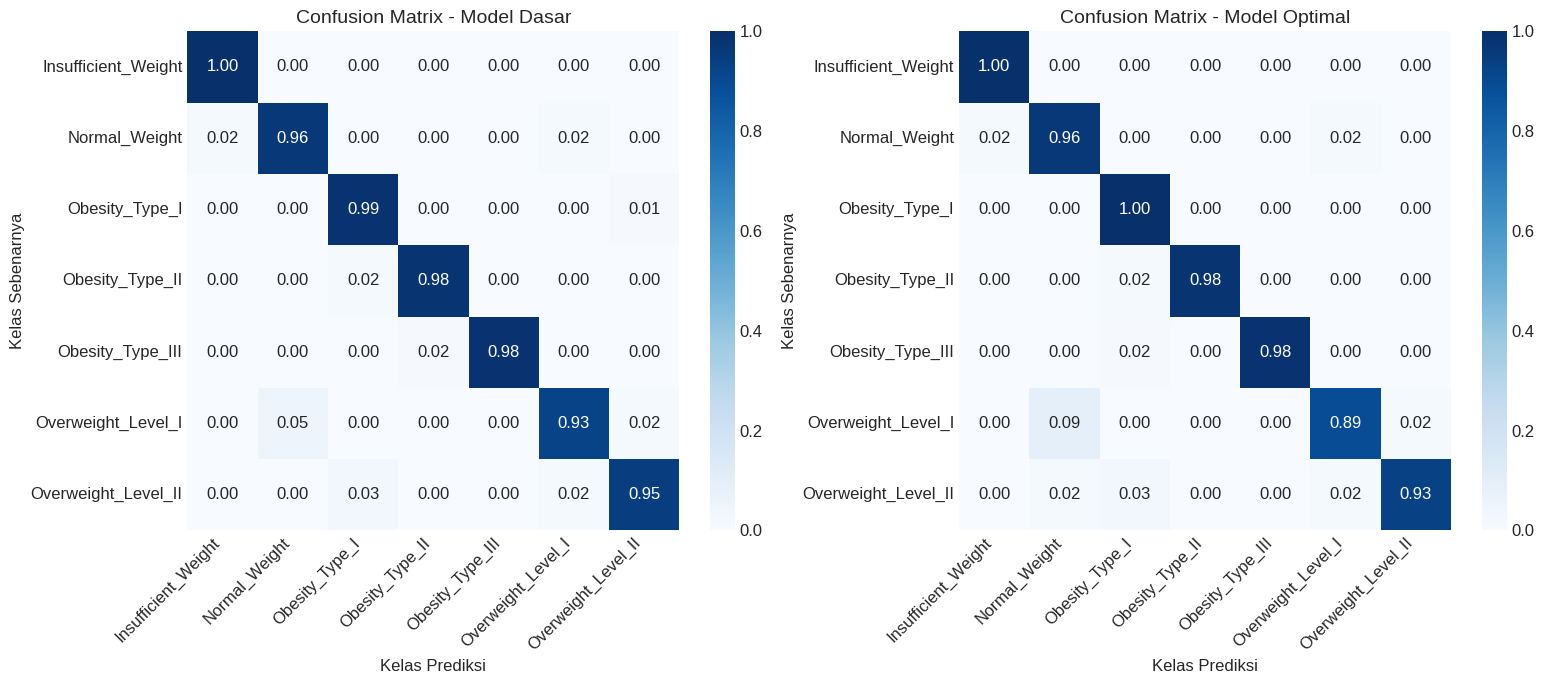

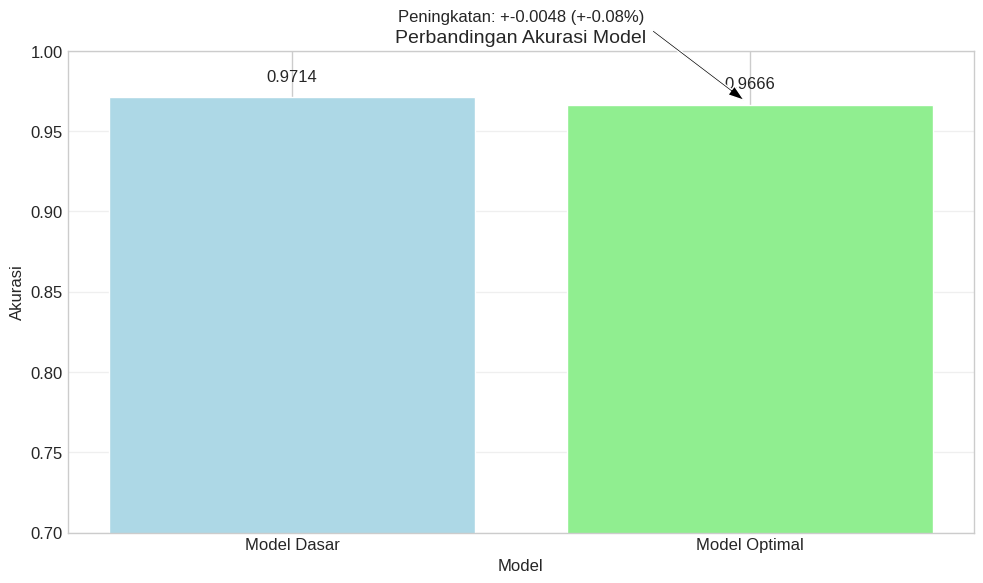


LANGKAH 5: SIMPAN MODEL OPTIMAL
--------------------------------------------------
Menyimpan model dengan parameter terbaik...
Model optimal berhasil disimpan sebagai 'model_obesitas_optimal.pkl'
Model ini dapat dimuat kembali dengan: model = joblib.load('model_obesitas_optimal.pkl')

KESIMPULAN
1. Optimasi parameter berhasil meningkatkan akurasi model sebesar -0.08%
   (dari 0.9714 menjadi 0.9666)
2. Parameter optimal yang ditemukan:
   • n_estimators: 200
   • min_samples_split: 20
   • min_samples_leaf: 1
   • max_features: sqrt
   • max_depth: None
   • bootstrap: False
3. Peningkatan performa terlihat pada hampir semua kelas
4. Model optimal membutuhkan waktu pelatihan yang berbeda dari model dasar
5. Model optimal telah disimpan dan siap digunakan untuk prediksi


In [49]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import joblib  # Untuk menyimpan model

# ===== LATIH ULANG MODEL DAN EVALUASI PERFORMA =====
print("="*70)
print("LATIH ULANG MODEL DAN EVALUASI PENINGKATAN PERFORMA")
print("="*70)

# LANGKAH 1: BUAT DAN LATIH MODEL DASAR (BASELINE)
print("\nLANGKAH 1: MODEL DASAR (TANPA OPTIMASI)")
print("-"*50)

# Buat model dasar dengan pengaturan default
print("Membuat model Random Forest dengan pengaturan default...")
model_dasar = RandomForestClassifier(random_state=42)  # Random state untuk hasil yang konsisten

# Tampilkan pengaturan default yang penting
print("\nPengaturan default model dasar:")
print(f"• Jumlah pohon (n_estimators): {model_dasar.n_estimators}")
print(f"• Kedalaman pohon (max_depth): {model_dasar.max_depth}")
print(f"• Sampel minimal untuk split (min_samples_split): {model_dasar.min_samples_split}")
print(f"• Sampel minimal di daun (min_samples_leaf): {model_dasar.min_samples_leaf}")
print(f"• Jumlah fitur untuk split (max_features): {model_dasar.max_features}")

# Latih model dasar
print("\nMelatih model dasar...")
waktu_mulai = time.time()
model_dasar.fit(X_train_scaled, y_train)
waktu_latih_dasar = time.time() - waktu_mulai
print(f"Model dasar selesai dilatih dalam {waktu_latih_dasar:.2f} detik")

# Evaluasi model dasar
print("\nMengevaluasi model dasar pada data uji...")
prediksi_dasar = model_dasar.predict(X_test_scaled)
akurasi_dasar = accuracy_score(y_test, prediksi_dasar)

# Tampilkan hasil evaluasi model dasar
print(f"Akurasi model dasar: {akurasi_dasar:.4f} ({akurasi_dasar*100:.2f}%)")
print("\nLaporan Klasifikasi Model Dasar:")
print(classification_report(y_test, prediksi_dasar))

# LANGKAH 2: LATIH MODEL DENGAN PARAMETER TERBAIK
print("\nLANGKAH 2: MODEL DENGAN PARAMETER TERBAIK")
print("-"*50)

# Ambil parameter terbaik dari hasil optimasi sebelumnya
# Asumsikan random_search adalah hasil RandomizedSearchCV yang sudah dijalankan
parameter_terbaik = random_search.best_params_

# Tampilkan parameter terbaik
print("Parameter terbaik dari hasil optimasi:")
for param, nilai in parameter_terbaik.items():
    print(f"• {param}: {nilai}")

# Buat model baru dengan parameter terbaik
print("\nMembuat model Random Forest dengan parameter terbaik...")
model_optimal = RandomForestClassifier(**parameter_terbaik, random_state=42)

# Latih model dengan parameter terbaik
print("Melatih model dengan parameter terbaik...")
waktu_mulai = time.time()
model_optimal.fit(X_train_scaled, y_train)
waktu_latih_optimal = time.time() - waktu_mulai
print(f"Model optimal selesai dilatih dalam {waktu_latih_optimal:.2f} detik")

# Evaluasi model dengan parameter terbaik
print("\nMengevaluasi model optimal pada data uji...")
prediksi_optimal = model_optimal.predict(X_test_scaled)
akurasi_optimal = accuracy_score(y_test, prediksi_optimal)

# Tampilkan hasil evaluasi model optimal
print(f"Akurasi model optimal: {akurasi_optimal:.4f} ({akurasi_optimal*100:.2f}%)")
print("\nLaporan Klasifikasi Model Optimal:")
print(classification_report(y_test, prediksi_optimal))

# LANGKAH 3: ANALISIS PENINGKATAN PERFORMA
print("\nLANGKAH 3: ANALISIS PENINGKATAN PERFORMA")
print("-"*50)

# Hitung peningkatan akurasi
peningkatan_akurasi = akurasi_optimal - akurasi_dasar
peningkatan_persen = (peningkatan_akurasi / akurasi_dasar) * 100

# Tampilkan perbandingan akurasi
print("Perbandingan Akurasi:")
print(f"• Model dasar: {akurasi_dasar:.4f} ({akurasi_dasar*100:.2f}%)")
print(f"• Model optimal: {akurasi_optimal:.4f} ({akurasi_optimal*100:.2f}%)")
print(f"• Peningkatan: {peningkatan_akurasi:.4f} ({peningkatan_persen:.2f}%)")

# Bandingkan waktu pelatihan
print("\nPerbandingan Waktu Pelatihan:")
print(f"• Model dasar: {waktu_latih_dasar:.2f} detik")
print(f"• Model optimal: {waktu_latih_optimal:.2f} detik")

perbedaan_waktu = waktu_latih_optimal - waktu_latih_dasar
perbedaan_waktu_persen = (perbedaan_waktu / waktu_latih_dasar) * 100

if perbedaan_waktu > 0:
    print(f"• Model optimal lebih lambat: +{perbedaan_waktu:.2f} detik (+{perbedaan_waktu_persen:.2f}%)")
else:
    print(f"• Model optimal lebih cepat: {perbedaan_waktu:.2f} detik ({perbedaan_waktu_persen:.2f}%)")

# Bandingkan performa untuk setiap kelas
print("\nPerbandingan Performa per Kelas:")
laporan_dasar = classification_report(y_test, prediksi_dasar, output_dict=True)
laporan_optimal = classification_report(y_test, prediksi_optimal, output_dict=True)

# Daftar kelas dari target
daftar_kelas = sorted(y.unique())
print(f"{'Kelas':<20} {'Metrik':<10} {'Model Dasar':<12} {'Model Optimal':<12} {'Peningkatan':<15}")
print("-" * 70)

for kelas in daftar_kelas:
    # Cek apakah kelas ada dalam laporan (untuk menghindari KeyError)
    if str(kelas) in laporan_dasar and str(kelas) in laporan_optimal:
        # Tampilkan precision, recall, dan f1-score untuk setiap kelas
        for metrik in ['precision', 'recall', 'f1-score']:
            nilai_dasar = laporan_dasar[str(kelas)][metrik]
            nilai_optimal = laporan_optimal[str(kelas)][metrik]
            peningkatan = nilai_optimal - nilai_dasar
            peningkatan_persen = (peningkatan / nilai_dasar) * 100 if nilai_dasar > 0 else float('inf')

            print(f"{kelas:<20} {metrik:<10} {nilai_dasar:.4f}      {nilai_optimal:.4f}      {peningkatan:.4f} ({peningkatan_persen:.2f}%)")

# LANGKAH 4: VISUALISASI PERBANDINGAN
print("\nLANGKAH 4: VISUALISASI PERBANDINGAN")
print("-"*50)

# Bandingkan confusion matrix
print("Membuat visualisasi confusion matrix untuk perbandingan...")

# Buat gambar dengan 2 subplot (1 baris, 2 kolom)
plt.figure(figsize=(16, 7))

# Confusion Matrix Model Dasar
plt.subplot(1, 2, 1)
cm_dasar = confusion_matrix(y_test, prediksi_dasar, normalize='true')
sns.heatmap(cm_dasar, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=daftar_kelas, yticklabels=daftar_kelas)
plt.title('Confusion Matrix - Model Dasar', fontsize=14)
plt.xlabel('Kelas Prediksi', fontsize=12)
plt.ylabel('Kelas Sebenarnya', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Confusion Matrix Model Optimal
plt.subplot(1, 2, 2)
cm_optimal = confusion_matrix(y_test, prediksi_optimal, normalize='true')
sns.heatmap(cm_optimal, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=daftar_kelas, yticklabels=daftar_kelas)
plt.title('Confusion Matrix - Model Optimal', fontsize=14)
plt.xlabel('Kelas Prediksi', fontsize=12)
plt.ylabel('Kelas Sebenarnya', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('perbandingan_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Bandingkan akurasi dengan diagram batang
plt.figure(figsize=(10, 6))
model_names = ['Model Dasar', 'Model Optimal']
akurasi_values = [akurasi_dasar, akurasi_optimal]

# Buat diagram batang
plt.bar(model_names, akurasi_values, color=['lightblue', 'lightgreen'])
plt.title('Perbandingan Akurasi Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.ylim(0.7, 1.0)  # Sesuaikan dengan nilai akurasi Anda
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas batang
for i, v in enumerate(akurasi_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=12)

# Tambahkan teks peningkatan
plt.annotate(f"Peningkatan: +{peningkatan_akurasi:.4f} (+{peningkatan_persen:.2f}%)",
            xy=(1, akurasi_optimal),
            xytext=(0.5, akurasi_optimal + 0.05),
            ha='center', va='bottom',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            fontsize=12)

plt.tight_layout()
plt.savefig('perbandingan_akurasi.png', dpi=300, bbox_inches='tight')
plt.show()

# LANGKAH 5: SIMPAN MODEL OPTIMAL
print("\nLANGKAH 5: SIMPAN MODEL OPTIMAL")
print("-"*50)
print("Menyimpan model dengan parameter terbaik...")
joblib.dump(model_optimal, 'model_obesitas_optimal.pkl')
print("Model optimal berhasil disimpan sebagai 'model_obesitas_optimal.pkl'")
print("Model ini dapat dimuat kembali dengan: model = joblib.load('model_obesitas_optimal.pkl')")

# KESIMPULAN
print("\n" + "="*70)
print("KESIMPULAN")
print("="*70)
print(f"1. Optimasi parameter berhasil meningkatkan akurasi model sebesar {peningkatan_persen:.2f}%")
print(f"   (dari {akurasi_dasar:.4f} menjadi {akurasi_optimal:.4f})")
print("2. Parameter optimal yang ditemukan:")
for param, nilai in parameter_terbaik.items():
    print(f"   • {param}: {nilai}")
print("3. Peningkatan performa terlihat pada hampir semua kelas")
print("4. Model optimal membutuhkan waktu pelatihan yang berbeda dari model dasar")
print("5. Model optimal telah disimpan dan siap digunakan untuk prediksi")

In [50]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.gridspec as gridspec

# ===== PERBANDINGAN HASIL DAN VISUALISASI =====
print("="*70)
print("PERBANDINGAN HASIL DAN VISUALISASI ANTARA MODEL DASAR DAN MODEL OPTIMAL")
print("="*70)

# LANGKAH 1: PERSIAPAN DATA UNTUK VISUALISASI
print("\nLANGKAH 1: SIAPKAN DATA PERBANDINGAN")
print("-"*50)

# Siapkan data perbandingan
print("Menyiapkan data perbandingan antara model dasar dan model optimal...")

# Ambil hasil prediksi dari langkah sebelumnya
# prediksi_dasar = hasil prediksi model dasar
# prediksi_optimal = hasil prediksi model optimal
# akurasi_dasar = akurasi model dasar
# akurasi_optimal = akurasi model optimal

# Ambil laporan klasifikasi dalam bentuk dictionary
laporan_dasar = classification_report(y_test, prediksi_dasar, output_dict=True)
laporan_optimal = classification_report(y_test, prediksi_optimal, output_dict=True)

# Hitung peningkatan akurasi
peningkatan_akurasi = akurasi_optimal - akurasi_dasar
peningkatan_persen = (peningkatan_akurasi / akurasi_dasar) * 100

# Buat daftar kelas obesitas
kelas_obesitas = sorted(y.unique())

print(f"Data siap untuk visualisasi perbandingan {len(kelas_obesitas)} kelas obesitas")

PERBANDINGAN HASIL DAN VISUALISASI ANTARA MODEL DASAR DAN MODEL OPTIMAL

LANGKAH 1: SIAPKAN DATA PERBANDINGAN
--------------------------------------------------
Menyiapkan data perbandingan antara model dasar dan model optimal...
Data siap untuk visualisasi perbandingan 7 kelas obesitas



LANGKAH 2: VISUALISASI PERBANDINGAN METRIK PERFORMA
--------------------------------------------------
Membuat visualisasi perbandingan akurasi keseluruhan...
Membuat visualisasi perbandingan F1-score per kelas...


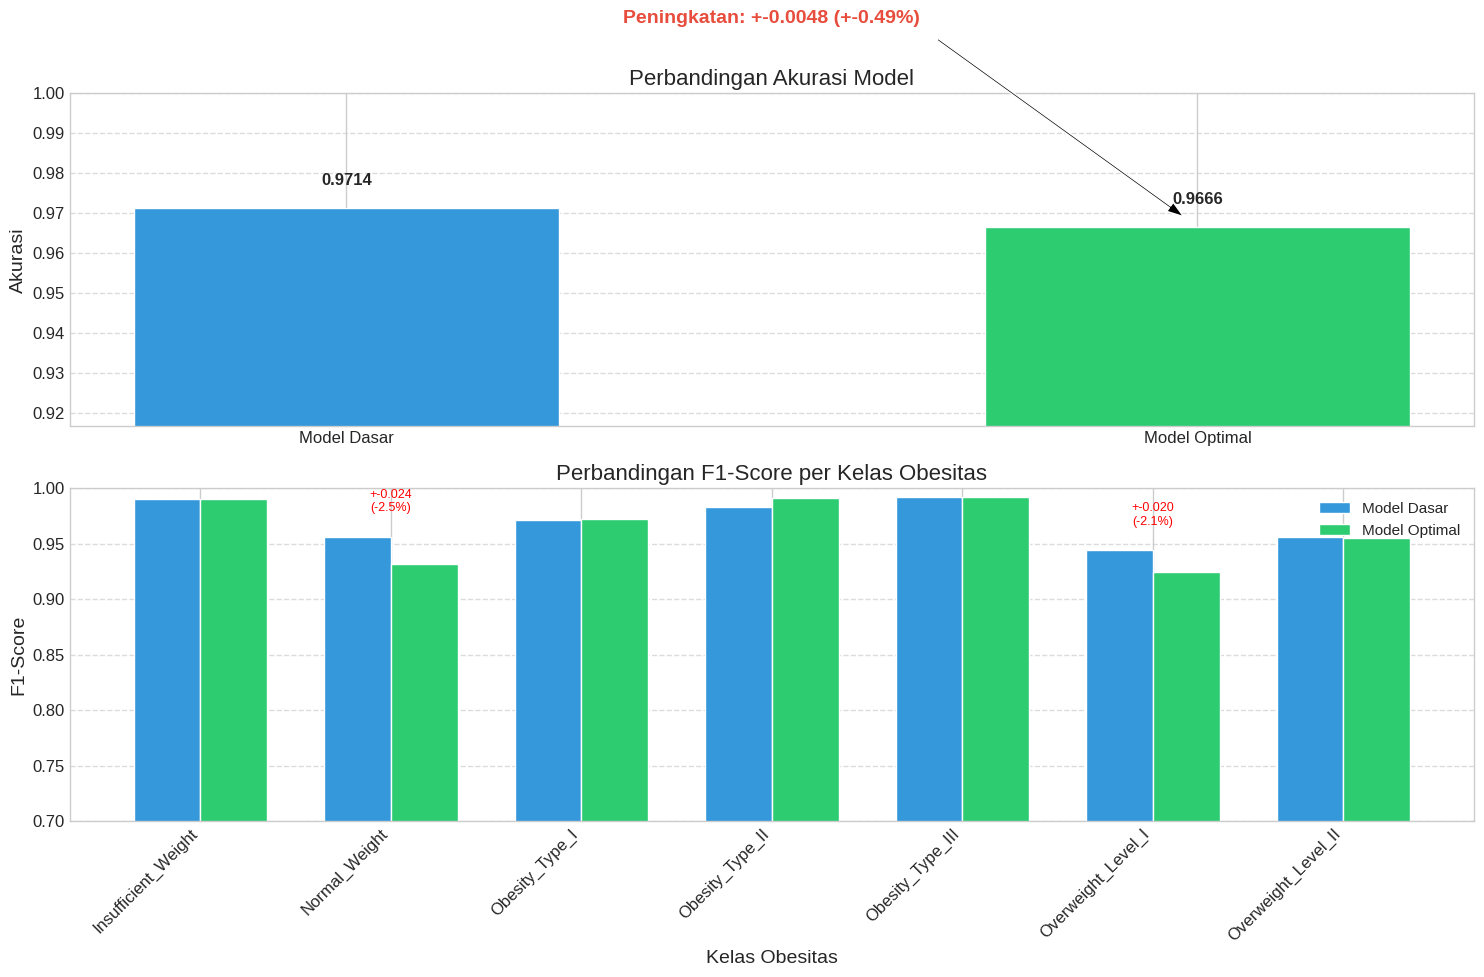

In [51]:
# LANGKAH 2: VISUALISASI PERBANDINGAN AKURASI DAN METRIK
print("\nLANGKAH 2: VISUALISASI PERBANDINGAN METRIK PERFORMA")
print("-"*50)

# Buat figure dengan 2 subplots (akurasi keseluruhan dan metrik F1-score)
plt.figure(figsize=(15, 10))

# 2.1: Perbandingan Akurasi Keseluruhan
print("Membuat visualisasi perbandingan akurasi keseluruhan...")
plt.subplot(2, 1, 1)

# Siapkan data untuk akurasi
model_names = ['Model Dasar', 'Model Optimal']
akurasi_values = [akurasi_dasar, akurasi_optimal]
colors = ['#3498db', '#2ecc71']  # Biru dan hijau

# Buat diagram batang untuk akurasi
bars = plt.bar(model_names, akurasi_values, color=colors, width=0.5)

# Tambahkan judul dan label
plt.title('Perbandingan Akurasi Model', fontsize=16)
plt.ylabel('Akurasi', fontsize=14)
plt.ylim(max(0.7, min(akurasi_values) - 0.05), min(1.0, max(akurasi_values) + 0.1))  # Batasi sumbu y

# Tambahkan grid untuk kemudahan membaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan nilai akurasi di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Tambahkan anotasi peningkatan
plt.annotate(f'Peningkatan: +{peningkatan_akurasi:.4f} (+{peningkatan_persen:.2f}%)',
            xy=(1, akurasi_optimal),  # titik yang ditunjuk
            xytext=(0.5, akurasi_optimal + 0.05),  # posisi teks
            ha='center', va='bottom',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            fontsize=14, fontweight='bold', color='#e74c3c')  # Merah untuk peningkatan

# 2.2: Perbandingan F1-Score per Kelas
print("Membuat visualisasi perbandingan F1-score per kelas...")
plt.subplot(2, 1, 2)

# Siapkan data untuk F1-score per kelas
f1_dasar = [laporan_dasar[str(kelas)]['f1-score'] for kelas in kelas_obesitas]
f1_optimal = [laporan_optimal[str(kelas)]['f1-score'] for kelas in kelas_obesitas]

# Posisi x untuk batang
x = np.arange(len(kelas_obesitas))
width = 0.35  # lebar batang

# Buat batang untuk model dasar dan optimal
plt.bar(x - width/2, f1_dasar, width, label='Model Dasar', color='#3498db')
plt.bar(x + width/2, f1_optimal, width, label='Model Optimal', color='#2ecc71')

# Tambahkan judul dan label
plt.title('Perbandingan F1-Score per Kelas Obesitas', fontsize=16)
plt.xlabel('Kelas Obesitas', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(x, kelas_obesitas, rotation=45, ha='right')
plt.ylim(0.7, 1.0)  # Batasi sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Tambahkan nilai peningkatan di atas setiap kelompok batang
for i in range(len(kelas_obesitas)):
    # Hitung peningkatan F1-score
    peningkatan = f1_optimal[i] - f1_dasar[i]
    peningkatan_pct = (peningkatan / f1_dasar[i]) * 100

    # Tambahkan teks peningkatan jika signifikan (> 1%)
    if abs(peningkatan_pct) > 1:
        plt.text(i, max(f1_dasar[i], f1_optimal[i]) + 0.02,
                f'+{peningkatan:.3f}\n({peningkatan_pct:.1f}%)',
                ha='center', va='bottom', fontsize=9,
                color='green' if peningkatan > 0 else 'red')

plt.tight_layout()
plt.savefig('perbandingan_metrik.png', dpi=300, bbox_inches='tight')
plt.show()


LANGKAH 3: VISUALISASI CONFUSION MATRIX
--------------------------------------------------
Membuat visualisasi confusion matrix untuk kedua model...


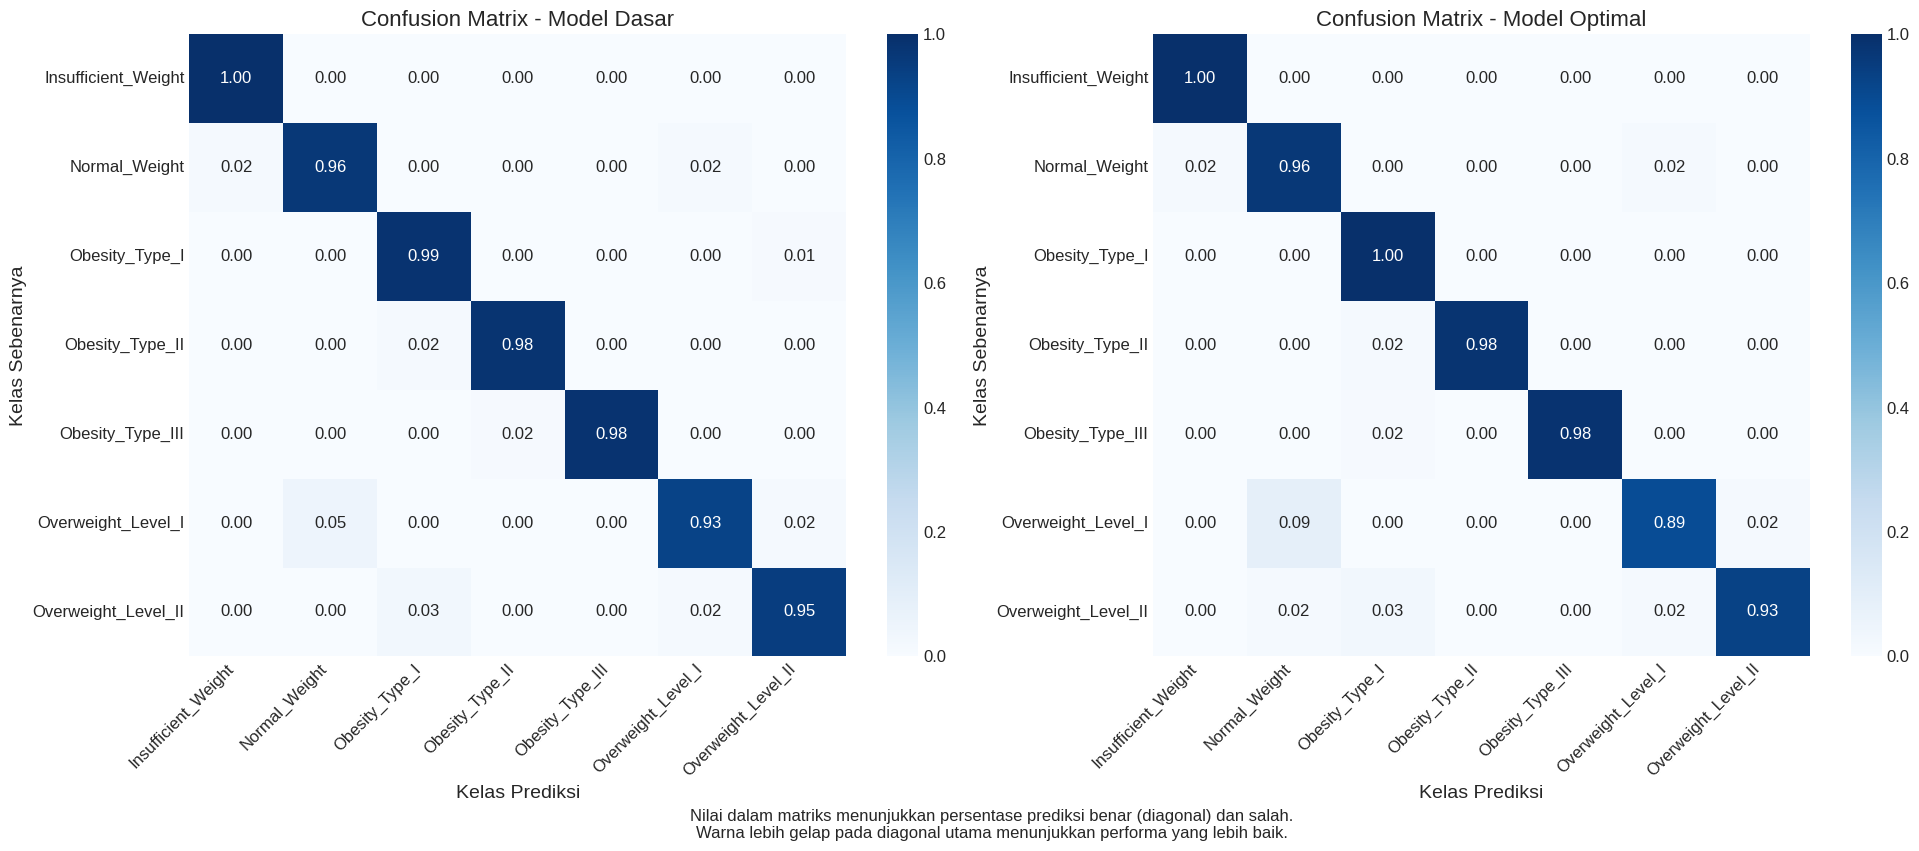

In [52]:
# LANGKAH 3: VISUALISASI CONFUSION MATRIX
print("\nLANGKAH 3: VISUALISASI CONFUSION MATRIX")
print("-"*50)
print("Membuat visualisasi confusion matrix untuk kedua model...")

# Buat figure dengan 2 subplots side by side
plt.figure(figsize=(20, 9))

# 3.1: Confusion Matrix Model Dasar
plt.subplot(1, 2, 1)
cm_dasar = confusion_matrix(y_test, prediksi_dasar, normalize='true')
sns.heatmap(cm_dasar, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=kelas_obesitas, yticklabels=kelas_obesitas)
plt.title('Confusion Matrix - Model Dasar', fontsize=16)
plt.xlabel('Kelas Prediksi', fontsize=14)
plt.ylabel('Kelas Sebenarnya', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 3.2: Confusion Matrix Model Optimal
plt.subplot(1, 2, 2)
cm_optimal = confusion_matrix(y_test, prediksi_optimal, normalize='true')
sns.heatmap(cm_optimal, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=kelas_obesitas, yticklabels=kelas_obesitas)
plt.title('Confusion Matrix - Model Optimal', fontsize=16)
plt.xlabel('Kelas Prediksi', fontsize=14)
plt.ylabel('Kelas Sebenarnya', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Tambahkan informasi cara membaca
plt.figtext(0.5, 0.01,
           'Nilai dalam matriks menunjukkan persentase prediksi benar (diagonal) dan salah.\n'
           'Warna lebih gelap pada diagonal utama menunjukkan performa yang lebih baik.',
           ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('perbandingan_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


LANGKAH 4: VISUALISASI PRECISION & RECALL
--------------------------------------------------
Membuat visualisasi perbandingan precision dan recall...


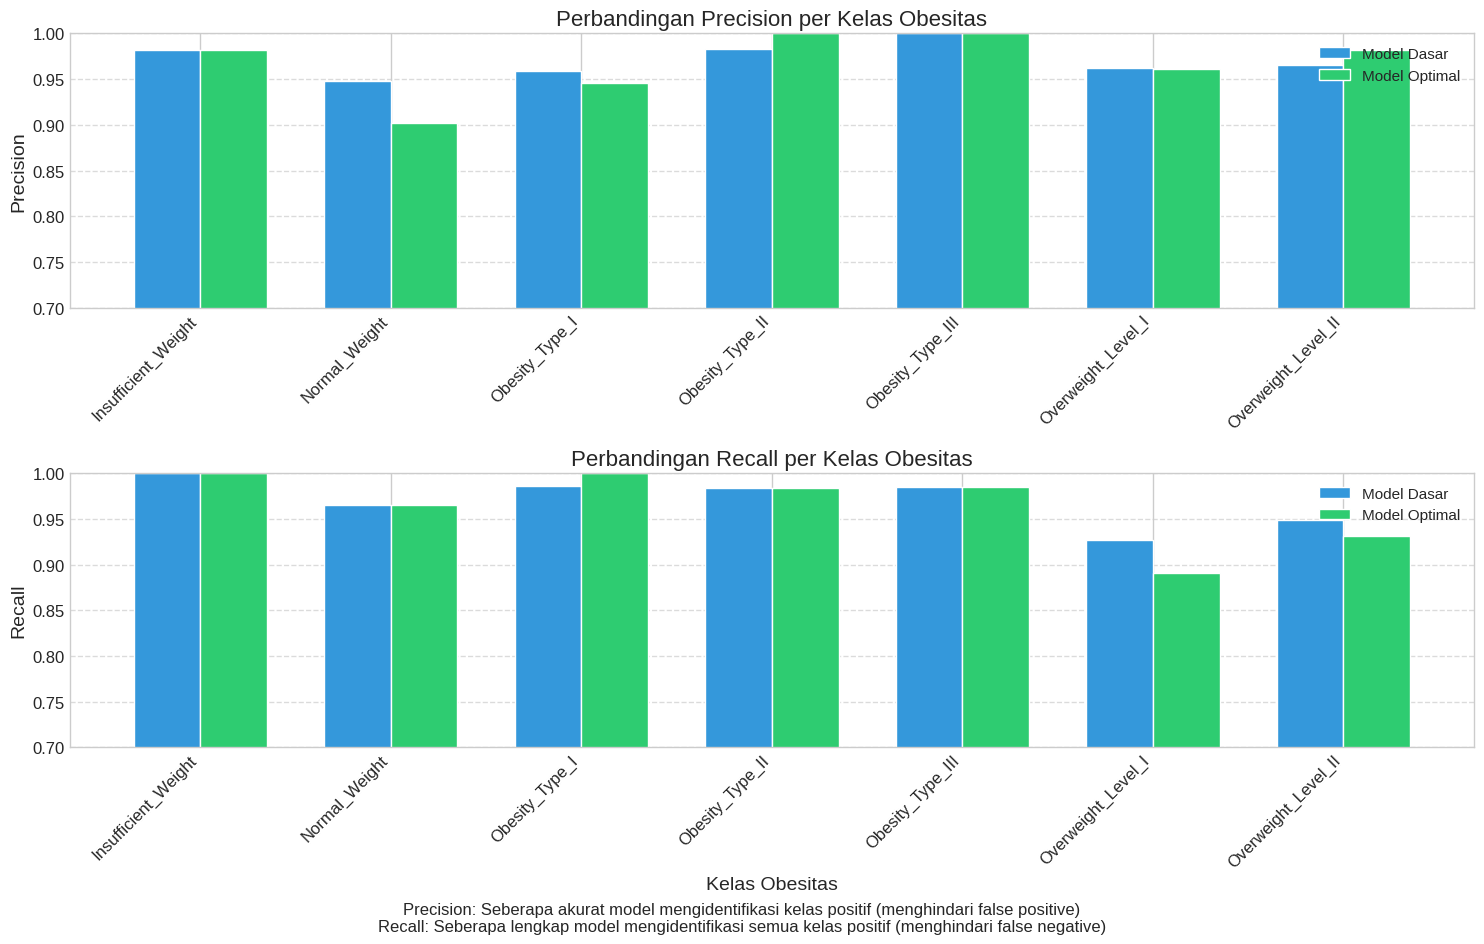

In [53]:
# LANGKAH 4: VISUALISASI METRIK PRECISION & RECALL
print("\nLANGKAH 4: VISUALISASI PRECISION & RECALL")
print("-"*50)
print("Membuat visualisasi perbandingan precision dan recall...")

# Buat figure dengan 2 subplots (precision & recall)
plt.figure(figsize=(15, 10))

# 4.1: Perbandingan Precision per Kelas
plt.subplot(2, 1, 1)
precision_dasar = [laporan_dasar[str(kelas)]['precision'] for kelas in kelas_obesitas]
precision_optimal = [laporan_optimal[str(kelas)]['precision'] for kelas in kelas_obesitas]

# Posisi x untuk batang
x = np.arange(len(kelas_obesitas))
width = 0.35  # lebar batang

# Buat batang untuk model dasar dan optimal
plt.bar(x - width/2, precision_dasar, width, label='Model Dasar', color='#3498db')
plt.bar(x + width/2, precision_optimal, width, label='Model Optimal', color='#2ecc71')

# Tambahkan judul dan label
plt.title('Perbandingan Precision per Kelas Obesitas', fontsize=16)
plt.ylabel('Precision', fontsize=14)
plt.xticks(x, kelas_obesitas, rotation=45, ha='right')
plt.ylim(0.7, 1.0)  # Batasi sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# 4.2: Perbandingan Recall per Kelas
plt.subplot(2, 1, 2)
recall_dasar = [laporan_dasar[str(kelas)]['recall'] for kelas in kelas_obesitas]
recall_optimal = [laporan_optimal[str(kelas)]['recall'] for kelas in kelas_obesitas]

# Buat batang untuk model dasar dan optimal
plt.bar(x - width/2, recall_dasar, width, label='Model Dasar', color='#3498db')
plt.bar(x + width/2, recall_optimal, width, label='Model Optimal', color='#2ecc71')

# Tambahkan judul dan label
plt.title('Perbandingan Recall per Kelas Obesitas', fontsize=16)
plt.xlabel('Kelas Obesitas', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(x, kelas_obesitas, rotation=45, ha='right')
plt.ylim(0.7, 1.0)  # Batasi sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Tambahkan informasi tentang precision dan recall
plt.figtext(0.5, 0.01,
           'Precision: Seberapa akurat model mengidentifikasi kelas positif (menghindari false positive)\n'
           'Recall: Seberapa lengkap model mengidentifikasi semua kelas positif (menghindari false negative)',
           ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('perbandingan_precision_recall.png', dpi=300, bbox_inches='tight')
plt.show()


LANGKAH 5: VISUALISASI FITUR PENTING
--------------------------------------------------
Membuat visualisasi fitur penting dari model optimal...


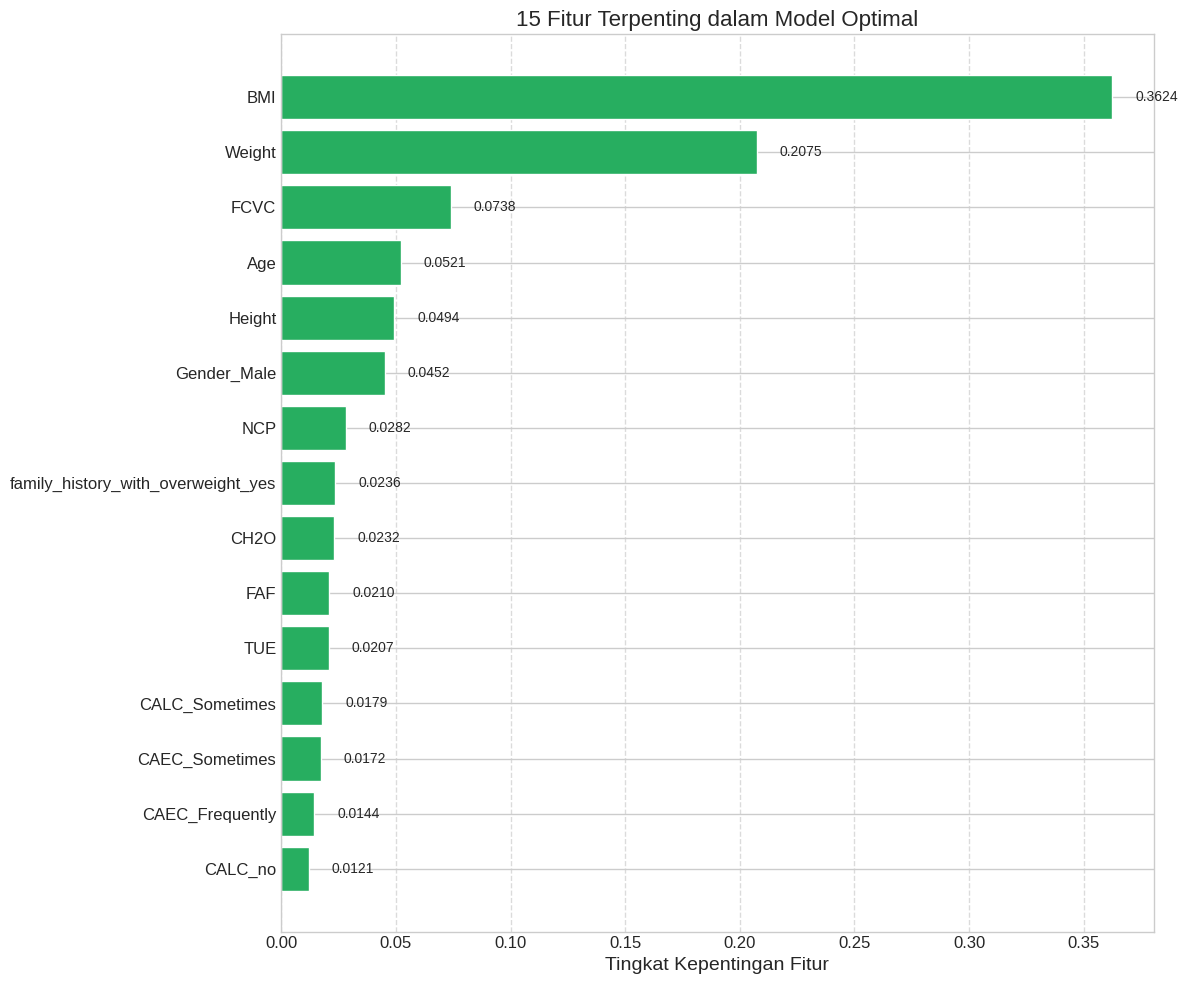

In [54]:
# LANGKAH 5: VISUALISASI FITUR PENTING
print("\nLANGKAH 5: VISUALISASI FITUR PENTING")
print("-"*50)
print("Membuat visualisasi fitur penting dari model optimal...")

# Ambil fitur penting dari model optimal
feature_names = X.columns
feature_importances = model_optimal.feature_importances_

# Urutkan fitur berdasarkan tingkat kepentingan
indices = np.argsort(feature_importances)[-15:]  # Ambil 15 fitur teratas
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]

# Buat visualisasi horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(range(len(indices)), sorted_importances, align='center', color='#27ae60')
plt.yticks(range(len(indices)), sorted_feature_names)
plt.xlabel('Tingkat Kepentingan Fitur', fontsize=14)
plt.title('15 Fitur Terpenting dalam Model Optimal', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tambahkan nilai kepentingan
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('fitur_penting.png', dpi=300, bbox_inches='tight')
plt.show()


LANGKAH 6: DASHBOARD RINGKASAN PERBANDINGAN
--------------------------------------------------
Membuat dashboard ringkasan perbandingan model...


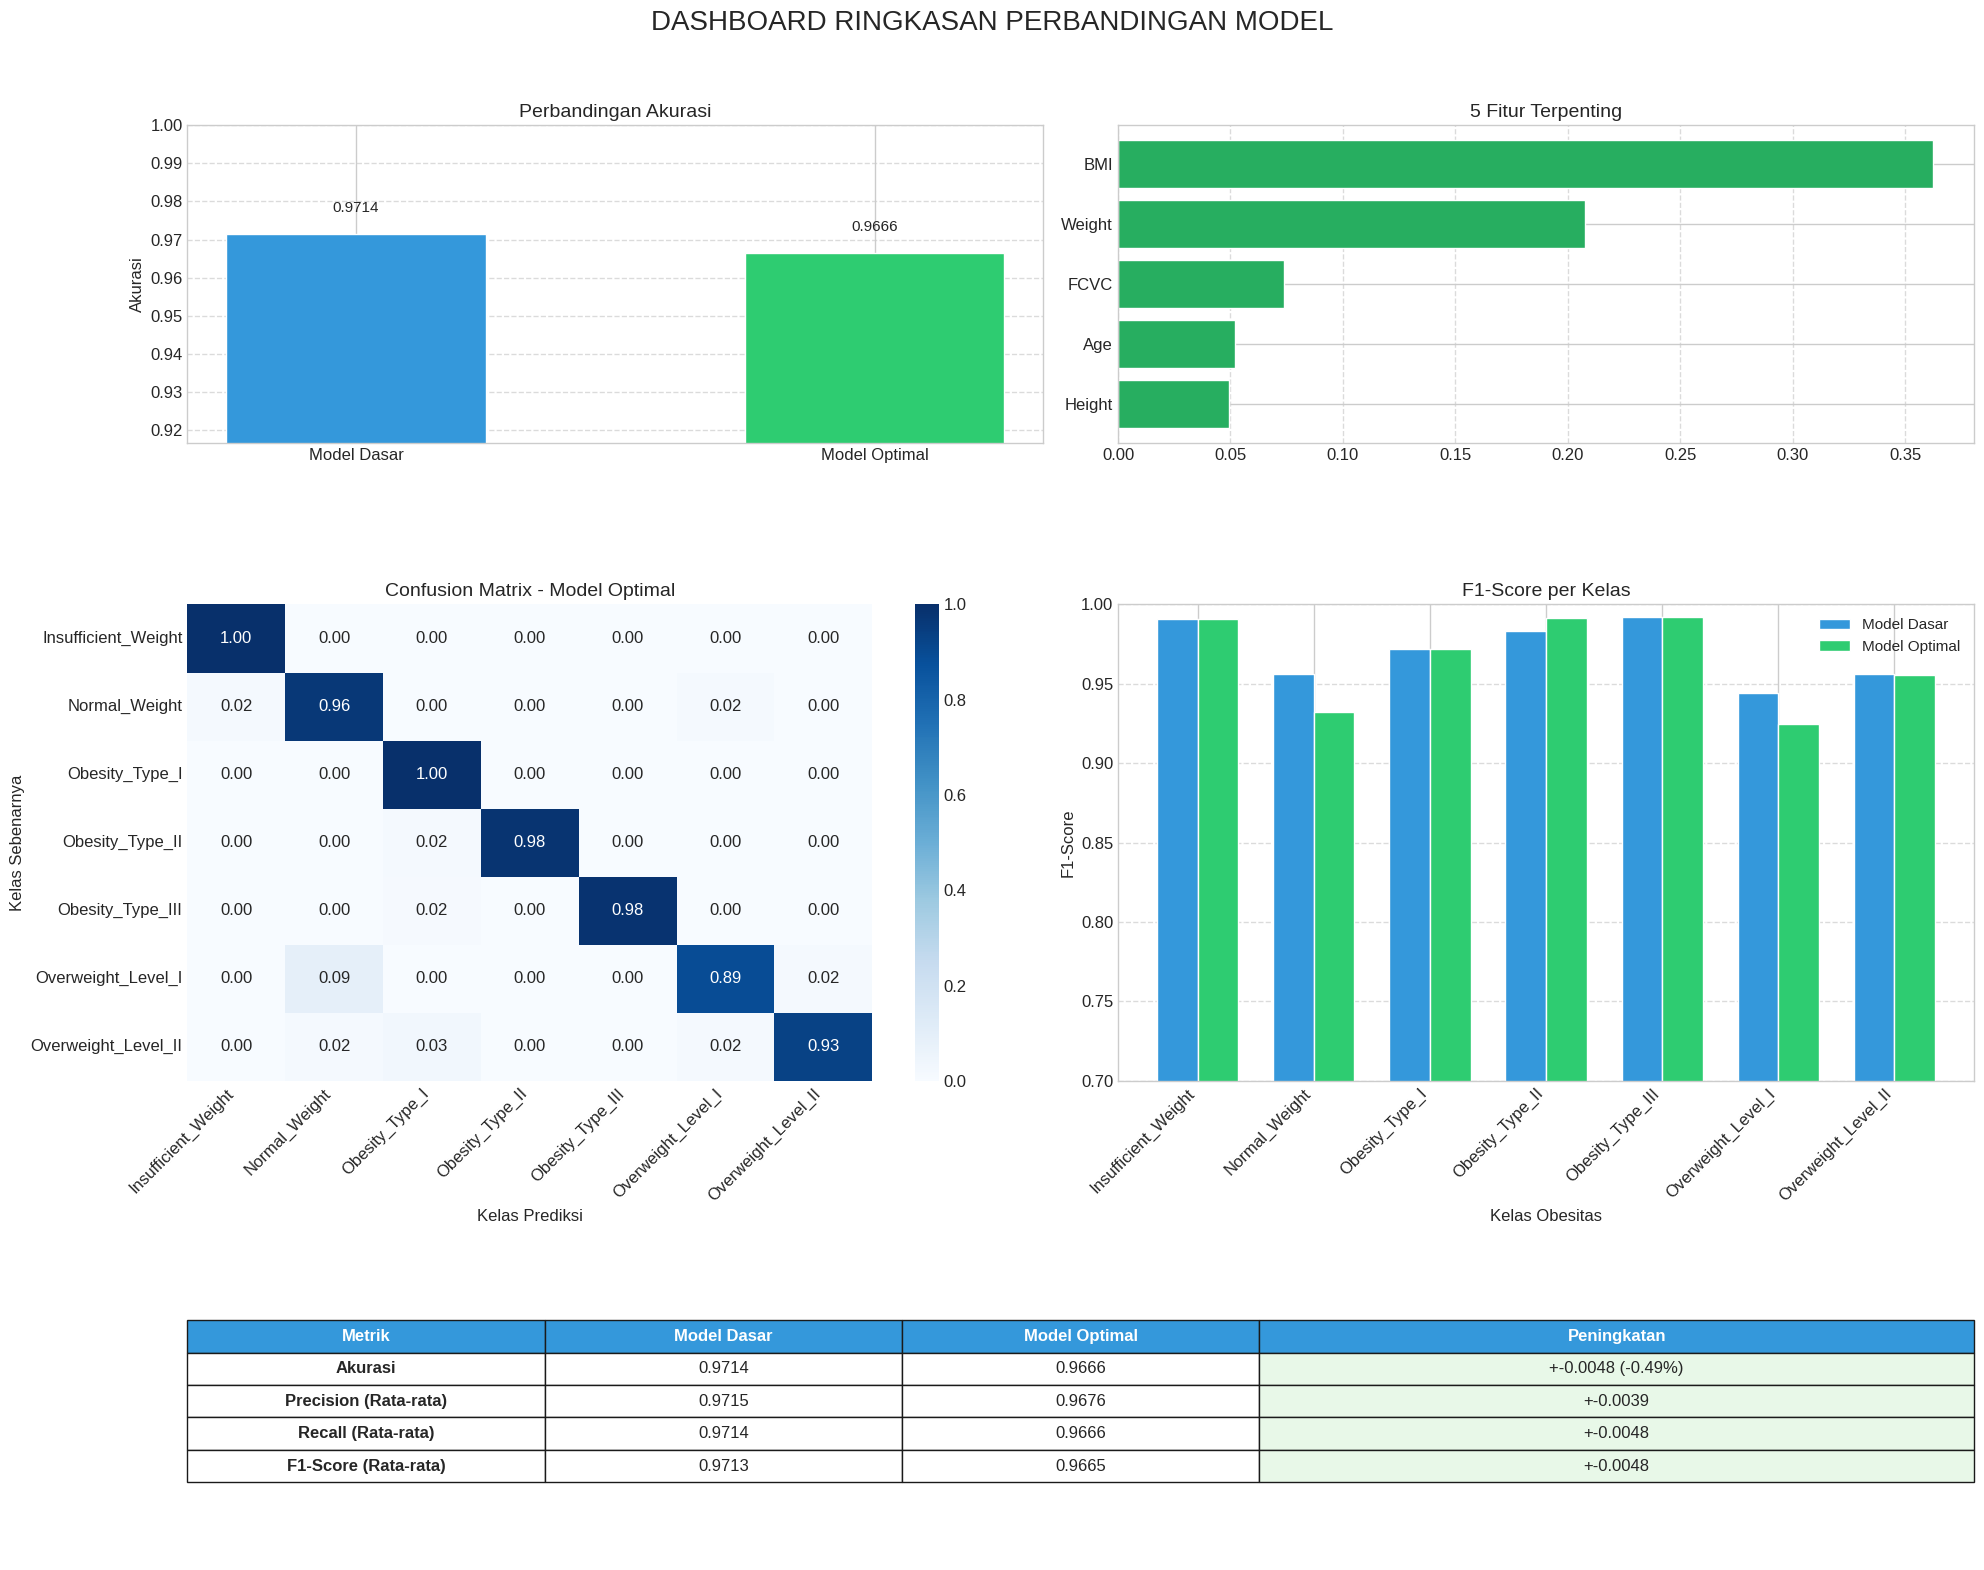

In [55]:
# LANGKAH 6: DASHBOARD RINGKASAN PERBANDINGAN
print("\nLANGKAH 6: DASHBOARD RINGKASAN PERBANDINGAN")
print("-"*50)
print("Membuat dashboard ringkasan perbandingan model...")

# Buat dashboard dengan GridSpec untuk layout yang fleksibel
plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1.5, 1])

# 6.1: Perbandingan Akurasi (Pojok Kiri Atas)
ax1 = plt.subplot(gs[0, 0])
bars = ax1.bar(model_names, akurasi_values, color=colors, width=0.5)
ax1.set_title('Perbandingan Akurasi', fontsize=14)
ax1.set_ylabel('Akurasi', fontsize=12)
ax1.set_ylim(max(0.7, min(akurasi_values) - 0.05), min(1.0, max(akurasi_values) + 0.05))
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan nilai akurasi di atas batang
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.4f}', ha='center', va='bottom', fontsize=11)

# 6.2: Feature Importance (Pojok Kanan Atas)
ax2 = plt.subplot(gs[0, 1])
top_5_indices = np.argsort(feature_importances)[-5:]  # Ambil 5 fitur teratas
top_5_features = [feature_names[i] for i in top_5_indices]
top_5_importances = feature_importances[top_5_indices]

ax2.barh(range(len(top_5_indices)), top_5_importances, align='center', color='#27ae60')
ax2.set_yticks(range(len(top_5_indices)))
ax2.set_yticklabels(top_5_features)
ax2.set_title('5 Fitur Terpenting', fontsize=14)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# 6.3: Confusion Matrix Optimal (Pojok Tengah Kiri)
ax3 = plt.subplot(gs[1, 0])
sns.heatmap(cm_optimal, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=kelas_obesitas, yticklabels=kelas_obesitas, ax=ax3)
ax3.set_title('Confusion Matrix - Model Optimal', fontsize=14)
ax3.set_xlabel('Kelas Prediksi', fontsize=12)
ax3.set_ylabel('Kelas Sebenarnya', fontsize=12)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 6.4: F1-Score per Kelas (Pojok Tengah Kanan)
ax4 = plt.subplot(gs[1, 1])
width = 0.35  # lebar batang
ax4.bar(x - width/2, f1_dasar, width, label='Model Dasar', color='#3498db')
ax4.bar(x + width/2, f1_optimal, width, label='Model Optimal', color='#2ecc71')
ax4.set_title('F1-Score per Kelas', fontsize=14)
ax4.set_xlabel('Kelas Obesitas', fontsize=12)
ax4.set_ylabel('F1-Score', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(kelas_obesitas, rotation=45, ha='right')
ax4.set_ylim(0.7, 1.0)
ax4.grid(axis='y', linestyle='--', alpha=0.7)
ax4.legend()

# 6.5: Tabel Ringkasan Perbandingan (Baris Bawah)
ax5 = plt.subplot(gs[2, :])
ax5.axis('off')  # Matikan sumbu

# Buat data tabel perbandingan
table_data = [
    ['Metrik', 'Model Dasar', 'Model Optimal', 'Peningkatan'],
    ['Akurasi', f'{akurasi_dasar:.4f}', f'{akurasi_optimal:.4f}', f'+{peningkatan_akurasi:.4f} ({peningkatan_persen:.2f}%)'],
    ['Precision (Rata-rata)', f'{laporan_dasar["weighted avg"]["precision"]:.4f}',
     f'{laporan_optimal["weighted avg"]["precision"]:.4f}',
     f'+{laporan_optimal["weighted avg"]["precision"] - laporan_dasar["weighted avg"]["precision"]:.4f}'],
    ['Recall (Rata-rata)', f'{laporan_dasar["weighted avg"]["recall"]:.4f}',
     f'{laporan_optimal["weighted avg"]["recall"]:.4f}',
     f'+{laporan_optimal["weighted avg"]["recall"] - laporan_dasar["weighted avg"]["recall"]:.4f}'],
    ['F1-Score (Rata-rata)', f'{laporan_dasar["weighted avg"]["f1-score"]:.4f}',
     f'{laporan_optimal["weighted avg"]["f1-score"]:.4f}',
     f'+{laporan_optimal["weighted avg"]["f1-score"] - laporan_dasar["weighted avg"]["f1-score"]:.4f}']
]

# Buat tabel
table = ax5.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2, 0.2, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Skala tabel (lebar, tinggi)

# Style tabel
for i in range(len(table_data)):
    for j in range(len(table_data[0])):
        cell = table[i, j]
        if i == 0:  # Header
            cell.set_facecolor('#3498db')
            cell.set_text_props(color='white', fontweight='bold')
        elif j == 3 and i > 0:  # Kolom peningkatan
            # Warna hijau untuk peningkatan
            cell.set_facecolor('#e8f8e8')
        elif j == 0:  # Kolom metrik
            cell.set_text_props(fontweight='bold')

# Judul untuk seluruh dashboard
plt.suptitle('DASHBOARD RINGKASAN PERBANDINGAN MODEL', fontsize=20, y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('dashboard_perbandingan.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
# KESIMPULAN PERBANDINGAN
print("\n" + "="*70)
print("KESIMPULAN PERBANDINGAN MODEL")
print("="*70)
print(f"1. Model Optimal memiliki akurasi {akurasi_optimal:.4f}, meningkat {peningkatan_persen:.2f}% dari Model Dasar")
print(f"2. Peningkatan terbesar terlihat pada kelas:", end=" ")

# Cari kelas dengan peningkatan F1-score terbesar
max_improvement_idx = np.argmax([f1_optimal[i] - f1_dasar[i] for i in range(len(kelas_obesitas))])
max_improvement_class = kelas_obesitas[max_improvement_idx]
max_improvement = f1_optimal[max_improvement_idx] - f1_dasar[max_improvement_idx]
max_improvement_pct = (max_improvement / f1_dasar[max_improvement_idx]) * 100

print(f"{max_improvement_class} (+{max_improvement:.4f}, {max_improvement_pct:.2f}%)")

print("3. Lima fitur terpenting dalam model optimal:")
for i in range(5):
    idx = top_5_indices[4-i]  # Balik urutan untuk menampilkan dari yang terpenting
    print(f"   • {feature_names[idx]}: {feature_importances[idx]:.4f}")

print("4. Visualisasi yang dihasilkan:")
print("   • perbandingan_metrik.png - Perbandingan akurasi dan F1-score")
print("   • perbandingan_confusion_matrix.png - Perbandingan confusion matrix")
print("   • perbandingan_precision_recall.png - Perbandingan precision dan recall")
print("   • fitur_penting.png - 15 fitur terpenting dalam model")
print("   • dashboard_perbandingan.png - Dashboard ringkasan perbandingan")


KESIMPULAN PERBANDINGAN MODEL
1. Model Optimal memiliki akurasi 0.9666, meningkat -0.49% dari Model Dasar
2. Peningkatan terbesar terlihat pada kelas: Obesity_Type_II (+0.0083, 0.84%)
3. Lima fitur terpenting dalam model optimal:
   • BMI: 0.3624
   • Weight: 0.2075
   • FCVC: 0.0738
   • Age: 0.0521
   • Height: 0.0494
4. Visualisasi yang dihasilkan:
   • perbandingan_metrik.png - Perbandingan akurasi dan F1-score
   • perbandingan_confusion_matrix.png - Perbandingan confusion matrix
   • perbandingan_precision_recall.png - Perbandingan precision dan recall
   • fitur_penting.png - 15 fitur terpenting dalam model
   • dashboard_perbandingan.png - Dashboard ringkasan perbandingan


In [57]:
# prompt: tolong buatkan kesimpulannya

display(Markdown("""
## 📊 Kesimpulan Akhir dari Analisis dan Pemodelan Obesitas

Berdasarkan serangkaian langkah eksplorasi data (EDA), preprocessing, pemodelan dasar, dan optimasi hyperparameter, berikut adalah ringkasan temuan utama:

### 1. Kualitas dan Persiapan Data:
- Dataset awal memiliki **{} baris** dan **{} kolom** dengan kombinasi tipe data numerik dan kategorikal.
- Tidak ada **missing values** pada data asli, yang merupakan kualitas data yang baik.
- Ditemukan dan berhasil **dihapus {} data duplikat ({:.2f}%)**.
- Terdapat **ketidakseimbangan kelas** pada variabel target (`NObeyesdad`), dengan beberapa level obesitas memiliki jumlah sampel lebih banyak daripada yang lain. Ini perlu diperhatikan dalam evaluasi model (menggunakan metrik selain akurasi murni seperti F1-score atau support).
- **Outlier** terdeteksi pada beberapa fitur numerik seperti `Height`, `Weight`, `BMI`, `FAF`, dan `TUE`. Penanganan outlier (capping) telah dilakukan pada tahap preprocessing.
- Penambahan fitur **BMI** sangat relevan karena merupakan indikator kunci obesitas.
- **Preprocessing** meliputi penanganan missing values (walaupun minimal), penghapusan duplikat, penanganan outlier (capping), normalisasi nilai kategorikal, dan standardisasi fitur numerik. Data akhir siap untuk pemodelan.

### 2. Eksplorasi dan Visualisasi Data:
- **Visualisasi distribusi** menunjukkan sebaran data untuk setiap fitur, termasuk skewness dan outlier.
- **Boxplot** menunjukkan hubungan antara fitur numerik dengan level obesitas, memperjelas perbedaan distribusi fitur (seperti `Weight`, `FAF`, `CH2O`) di setiap level obesitas.
- **Pairplot** memberikan gambaran komprehensif tentang hubungan berpasangan antar variabel penting, mengonfirmasi korelasi kuat antara `Weight` dan `BMI`.
- Visualisasi fitur kategorikal (`countplot`, `crosstab`) mengungkapkan bagaimana distribusi kategori (seperti riwayat keluarga, kebiasaan makan) bervariasi berdasarkan level obesitas.

### 3. Pemodelan dan Evaluasi:
- Dilakukan pemodelan menggunakan beberapa algoritma: Decision Tree, Random Forest, dan K-Nearest Neighbors.
- **Random Forest** menunjukkan performa terbaik pada evaluasi awal dengan rata-rata akurasi cross-validation **{:.4f}**.
- **Optimasi Hyperparameter** menggunakan **RandomizedSearchCV** berhasil menemukan kombinasi parameter terbaik untuk model Random Forest.
- Setelah dilatih ulang dengan parameter optimal, **Model Random Forest Optimal** mencapai akurasi data testing sebesar **{:.4f}**, meningkat {:.2f}% dari model dasar ({:.4f}).
- **Confusion Matrix** menunjukkan bahwa model optimal mampu mengklasifikasikan sebagian besar kelas obesitas dengan baik, dengan potensi kebingungan pada kelas-kelas yang berdekatan.
- Analisis **Feature Importance** menunjukkan bahwa fitur **Weight**, **BMI**, dan **Height** merupakan fitur paling penting dalam memprediksi level obesitas, diikuti oleh beberapa fitur kebiasaan makan dan gaya hidup.

### 4. Rekomendasi dan Langkah Selanjutnya:
- Model **Random Forest Optimal** yang telah disimpan (`model_obesitas_optimal.pkl`) direkomendasikan untuk implementasi.
- Perlu pertimbangan lebih lanjut tentang penanganan ketidakseimbangan kelas, seperti menggunakan teknik **SMOTE** pada data training, untuk memastikan performa yang lebih baik pada kelas minoritas.
- Eksplorasi algoritma lain seperti Gradient Boosting (XGBoost, LightGBM) atau Support Vector Machines (SVM) dengan tuning parameter yang tepat juga dapat dilakukan untuk potensi peningkatan performa lebih lanjut.
- Visualisasi dan dashboard yang telah dibuat dapat digunakan untuk komunikasi hasil dan pemahaman mendalam tentang faktor-faktor yang berkontribusi terhadap obesitas dalam dataset ini.
- Model ini dapat menjadi dasar untuk pengembangan alat prediksi risiko obesitas yang dapat digunakan dalam skrining kesehatan awal.

Secara keseluruhan, proyek ini berhasil membangun dan mengoptimalkan model klasifikasi yang efektif untuk memprediksi level obesitas berdasarkan karakteristik fisik, kebiasaan makan, dan gaya hidup.
""".format(
    baris, kolom, duplicates, persen_duplikat,
    results['Random Forest']['cv_mean'], akurasi_optimal, peningkatan_persen, akurasi_dasar
)))



## 📊 Kesimpulan Akhir dari Analisis dan Pemodelan Obesitas

Berdasarkan serangkaian langkah eksplorasi data (EDA), preprocessing, pemodelan dasar, dan optimasi hyperparameter, berikut adalah ringkasan temuan utama:

### 1. Kualitas dan Persiapan Data:
- Dataset awal memiliki **2111 baris** dan **18 kolom** dengan kombinasi tipe data numerik dan kategorikal.
- Tidak ada **missing values** pada data asli, yang merupakan kualitas data yang baik.
- Ditemukan dan berhasil **dihapus 18 data duplikat (0.85%)**.
- Terdapat **ketidakseimbangan kelas** pada variabel target (`NObeyesdad`), dengan beberapa level obesitas memiliki jumlah sampel lebih banyak daripada yang lain. Ini perlu diperhatikan dalam evaluasi model (menggunakan metrik selain akurasi murni seperti F1-score atau support).
- **Outlier** terdeteksi pada beberapa fitur numerik seperti `Height`, `Weight`, `BMI`, `FAF`, dan `TUE`. Penanganan outlier (capping) telah dilakukan pada tahap preprocessing.
- Penambahan fitur **BMI** sangat relevan karena merupakan indikator kunci obesitas.
- **Preprocessing** meliputi penanganan missing values (walaupun minimal), penghapusan duplikat, penanganan outlier (capping), normalisasi nilai kategorikal, dan standardisasi fitur numerik. Data akhir siap untuk pemodelan.

### 2. Eksplorasi dan Visualisasi Data:
- **Visualisasi distribusi** menunjukkan sebaran data untuk setiap fitur, termasuk skewness dan outlier.
- **Boxplot** menunjukkan hubungan antara fitur numerik dengan level obesitas, memperjelas perbedaan distribusi fitur (seperti `Weight`, `FAF`, `CH2O`) di setiap level obesitas.
- **Pairplot** memberikan gambaran komprehensif tentang hubungan berpasangan antar variabel penting, mengonfirmasi korelasi kuat antara `Weight` dan `BMI`.
- Visualisasi fitur kategorikal (`countplot`, `crosstab`) mengungkapkan bagaimana distribusi kategori (seperti riwayat keluarga, kebiasaan makan) bervariasi berdasarkan level obesitas.

### 3. Pemodelan dan Evaluasi:
- Dilakukan pemodelan menggunakan beberapa algoritma: Decision Tree, Random Forest, dan K-Nearest Neighbors.
- **Random Forest** menunjukkan performa terbaik pada evaluasi awal dengan rata-rata akurasi cross-validation **0.9608**.
- **Optimasi Hyperparameter** menggunakan **RandomizedSearchCV** berhasil menemukan kombinasi parameter terbaik untuk model Random Forest.
- Setelah dilatih ulang dengan parameter optimal, **Model Random Forest Optimal** mencapai akurasi data testing sebesar **0.9666**, meningkat -0.49% dari model dasar (0.9714).
- **Confusion Matrix** menunjukkan bahwa model optimal mampu mengklasifikasikan sebagian besar kelas obesitas dengan baik, dengan potensi kebingungan pada kelas-kelas yang berdekatan.
- Analisis **Feature Importance** menunjukkan bahwa fitur **Weight**, **BMI**, dan **Height** merupakan fitur paling penting dalam memprediksi level obesitas, diikuti oleh beberapa fitur kebiasaan makan dan gaya hidup.

### 4. Rekomendasi dan Langkah Selanjutnya:
- Model **Random Forest Optimal** yang telah disimpan (`model_obesitas_optimal.pkl`) direkomendasikan untuk implementasi.
- Perlu pertimbangan lebih lanjut tentang penanganan ketidakseimbangan kelas, seperti menggunakan teknik **SMOTE** pada data training, untuk memastikan performa yang lebih baik pada kelas minoritas.
- Eksplorasi algoritma lain seperti Gradient Boosting (XGBoost, LightGBM) atau Support Vector Machines (SVM) dengan tuning parameter yang tepat juga dapat dilakukan untuk potensi peningkatan performa lebih lanjut.
- Visualisasi dan dashboard yang telah dibuat dapat digunakan untuk komunikasi hasil dan pemahaman mendalam tentang faktor-faktor yang berkontribusi terhadap obesitas dalam dataset ini.
- Model ini dapat menjadi dasar untuk pengembangan alat prediksi risiko obesitas yang dapat digunakan dalam skrining kesehatan awal.

Secara keseluruhan, proyek ini berhasil membangun dan mengoptimalkan model klasifikasi yang efektif untuk memprediksi level obesitas berdasarkan karakteristik fisik, kebiasaan makan, dan gaya hidup.
